In [7]:
import numpy as np
import pandas as pd
import datetime
import glob
from pathlib import Path
from scipy import stats
import seaborn as sns
%matplotlib inline

In [8]:
pd.set_option('display.max_columns', None)

# 0 Import final_prep

In [9]:
#Read in csv
login = pd.read_csv('login.csv', index_col='login')
#Convert Unix epoch to datetime
login['Reg_Datetime'] = pd.to_datetime(login['reg_date'],unit='s')
login.drop(columns='reg_date', inplace=True)

In [10]:
country_mapping = {
    'CA': 'Canada',
    'AU': 'Australia',
    'CI': "Cote D'ivoire",
    'PK': 'Pakistan',
    'AF': 'Afghanistan',
    'KE': 'Kenya',
    'MQ': 'Martinique',
    'GB': 'United Kingdom',
    'SK': 'Slovakia',
    'CZ': 'Czech Republic',
    'DE': 'Germany',
    'FR': 'France',
    'HR': 'Croatia',
    'PL': 'Poland',
    'ZA': 'South Africa',
    'CH': 'Switzerland',
    'NG': 'Nigeria',
    'SE': 'Sweden',
    'IE': 'Ireland',
    'ES': 'Spain',
    'MX': 'Mexico',
    'IN': 'India',
    'LT': 'Lithuania',
    'GH': 'Ghana',
    'BD': 'Bangladesh',
    'SI': 'Slovenia',
    'HK': 'Hong Kong',
    'NO': 'Norway',
    'NL': 'Netherlands',
    "Cote D'ivoire": "Cote D'ivoire",
    'DO': 'Dominican Republic',
    'PT': 'Portugal',
    'PH': 'Philippines',
    'MY': 'Malaysia',
    'SG': 'Singapore',
    'AT': 'Austria',
    'IT': 'Italy',
    'DK': 'Denmark',
    'TR': 'Turkey',
    'BR': 'Brazil',
    'MA': 'Morocco',
    'TH': 'Thailand',
    'NZ': 'New Zealand',
    'JM': 'Jamaica',
    'KW': 'Kuwait',
    'VN': 'Vietnam',
    'QA': 'Qatar',
    'PE': 'Peru',
    'AL': 'Albania',
    'BB': 'Barbados',
    'RO': 'Romania',
    'BN': 'Brunei',
    'BH': 'Bahrain',
    'U.A.E.': 'United Arab Emirates',
    'RU': 'Russia',
    'CL': 'Chile',
    'MV': 'Maldives',
    'MT': 'Malta',
    'PG': 'Papua New Guinea',
    'UZ': 'Uzbekistan',
    'BG': 'Bulgaria',
    'CO': 'Colombia',
    'LR': 'Liberia',
    'AG': 'Antigua and Barbuda',
    'ZM': 'Zambia',
    'MU': 'Mauritius',
    'AI': 'Anguilla',
    'SA': 'Saudi Arabia',
    'TZ': 'Tanzania',
    'EE': 'Estonia',
    'KR': 'South Korea',
    'KH': 'Cambodia',
    'KY': 'Cayman Islands',
    'JO': 'Jordan',
    'BT': 'Bhutan',
    'MD': 'Moldova',
    'HT': 'Haiti',
    'VC': 'Saint Vincent and The Grenadine',
    'DM': 'Dominica',
    'ME': 'Montenegro',
    'MK': 'North Macedonia',
    'MZ': 'Mozambique',
    'HU': 'Hungary',
    'MN': 'Mongolia',
    'IS': 'Iceland',
    'AR': 'Argentina',
    'EC': 'Ecuador',
    'GU': 'Guam',
    'AW': 'Aruba',
    'PF': 'French Polynesia',
    'LS': 'Lesotho',
    'LU': 'Luxembourg',
    'KN': 'Saint Kitts and Nevis',
    'SX': 'Netherlands',
    'Sint Maarten (Dutch part)' : 'Netherlands',
    'VI': 'Virgin Islands (U.S.)',
    'PY': 'Paraguay',
    'FJ': 'Fiji',
    'GD': 'Grenada',
    'GY': 'Guyana',
    'MF': 'France',
    'TW': 'Taiwan',
    'MW': 'Malawi',
    'GF': 'French Guiana',
    'BJ': 'Benin',
    'GP': 'Guadeloupe',
    'TC': 'Turks and Caicos Islands',
    'BZ': 'Belize',
    'SV': 'El Salvador',
    'BO': 'Bolivia',
    'SN': 'Senegal',
    'GN': 'Guinea',
    'CR': 'Costa Rica',
    'ML': 'Mali',
    'BM': 'Bermuda',
    'BQ': 'Bonaire, Sint Eustatius and Saba',
    'AD': 'Andorra',
    'OM': 'Oman',
    'PM': 'Saint Pierre and Miquelon',
    'RE': 'Reunion',
    'LC': 'Saint Lucia',
    'NC': 'New Caledonia',
    'Kosovo': 'Kosovo',
    'Japan': 'Japan',
    'China': 'China',
    'Venezuela': 'Venezuela',
    'Trinidad and Tobago': 'Trinidad and Tobago',
    'United+Kingdom': 'United Kingdom',
    'Hong+Kong': 'Hong Kong',
    'South+Africa': 'South Africa',
    'Puerto Rico': 'Puerto Rico',
    'Sao Tome and Principe': 'Sao Tome and Principe',
    'French Polynesi': 'French Polynesia',
    'United Arab Emi': 'United Arab Emirates',
    'Hong Kong S.A.R.': 'Hong Kong',
    'Runion--trunc': 'Reunion',
    'Virgin Islands': 'Virgin Islands (U.S.)',
    'Iran': 'Iran',
    'Bosnia and Herz': 'Bosnia and Herzegovina',
    'Saint Vincent a': 'Saint Vincent and The Grenadine',
    'Papua New Guine': 'Papua New Guinea',
    'Myanmar': 'Myanmar',
    'Zimbabwe': 'Zimbabwe',
    'Sierra Leone': 'Sierra Leone',
    'Syria': 'Syria',
    'Trinidad and To': 'Trinidad and Tobago',
    'Palestine': 'Palestine',
    'Burundi': 'Burundi',
    'Laos': 'Laos',
    'Dominican Repub': 'Dominican Republic',
    'United States M': 'United States',
    'Antigua and Bar': 'Antigua and Barbuda',
    'Palau': 'Palau',
    'Djibouti': 'Djibouti',
    'Curaçao': 'Curacao',
    'Swaziland': 'Eswatini',
    'Palestinian Authority': 'Palestine',
    'Mauritania': 'Mauritania',
    'Monaco': 'Monaco',
    'Åland Islands': 'Aland Islands',
    'Gibraltar': 'Gibraltar',
    'Armenia': 'Armenia',
    'Seychelles': 'Seychelles',
    'Paraguay': 'Paraguay',
    'Equatorial Guin': 'Equatorial Guinea',
    'Kyrgyzstan': 'Kyrgyzstan',
    'Faroe Islands': 'Faroe Islands',
    'Antarctica': 'Antarctica',
    'United States': 'United States',
    'Wallis and Futu': 'Wallis and Futuna',
    'Eritrea': 'Eritrea',
    'Turks and Caico': 'Turks and Caicos Islands',
    'land Islands--trunc': 'Aland Islands',  # Truncated, assuming Åland Islands
    'Congo (Republic': 'Republic of the Congo',
    'Chad': 'Chad',
    'Samoa': 'Samoa',
    'Sao Tome and Pr': 'Sao Tome and Principe',
    'Tonga': 'Tonga',
    'Tahiti': 'French Polynesia',  # Assuming Tahiti is part of French Polynesia
    'Åland Islands': 'Aland Islands',
    'Nauru': 'Nauru',
    'Taiwan': 'Taiwan',
    'Solomon Islands': 'Solomon Islands',
    'Comoros': 'Comoros',
    'NigeriaHouse no 3 Pre': 'Nigeria',  # Unclear data, assuming Nigeria
    'Tajikistan': 'Tajikistan',
    'Nicaragua': 'Nicaragua',
    'Curaçao': 'Curacao',
    'Kiribati': 'Kiribati',
    'Saint Martin (F': 'Saint Martin',
    'Bonaire, Sint E': 'Bonaire, Sint Eustatius and Saba',
    'Saint Kitts and': 'Saint Kitts and Nevis',  # Incomplete entry, assuming Nevis
    'South Georgia a': 'South Georgia and The South Sandwich Islands',  # Incomplete entry, assuming South Sandwich Islands
    'British Indian': 'British Indian Ocean Territory',
    'Guernsey': 'Guernsey',
    'Liechtenstein': 'Liechtenstein',
    'Greenland': 'Greenland',
    'French Southern': 'France',
    'YT' : 'France',
    'Korea': 'South Korea',  # Assuming South Korea
    'BS': 'The Bahamas',
    'ID': 'Indonesia',
    'RÃ©union': 'Réunion',  # Assuming Réunion
    'AE': 'United Arab Emirates',
    'CN' : 'China',
    'BW' : 'Botswana',
    'CANADA' : 'Canada',
    'CM' : 'Cameroon',
    'Congo (Republic)' : 'Republic of the Congo',
    'CuraÃ§ao' : 'Curacao',  #Assuming Curacao
    'DZ' : 'Algeria',
    'FI' : 'Finland',
    'GR' : 'Greece',
    'KG' : 'Kyrgyzstan',
    'KZ' : 'Kazakhstan',
    'Korea, South' : 'South Korea',
    'LK' : 'Sri Lanka',
    'LV' : 'Latvia',
    'SZ' : 'Eswatini',
    'Saint Helena, Ascension and Tri' : 'Saint Helena, Ascension and Tristan da Cunha',
    'TN' : 'Tunisia',
    'TT' : 'Trinidad and Tobago',
    'Taiwan, China' : 'Taiwan',
    'UG' : 'Uganda',
    'UK' : 'United Kingdom',
    'land Islands' : 'Aland Islands',   #Assuming Åland Islands
    'Ã…land Islands' : 'Aland Islands',  #Assuming Åland Islands
    'Aland Islands' : 'Aland Islands'
}
#Country mapping
login['country'] = login['country'].replace(country_mapping)

In [17]:
# Symbol: Read in csv
symbol = pd.read_csv('symbol.csv', index_col='symbol')

# Reason: Read in csv
reason = pd.read_csv('reason.csv', index_col='code')
#Group insignificant reasons under 'Other'
imp_reason = ['Client', 'Expert', 'Mobile']
reason['reason'] = reason['reason'].apply(lambda x: x if x in imp_reason else 'Other')

In [18]:
# Daily Chart: Read in csv
daily_charts = glob.glob("daily_chart/*.csv")
all_charts = pd.DataFrame()
for chart in daily_charts:
    name = Path(chart).stem
    csv = pd.read_csv(chart, index_col='date', parse_dates=True)
    all_charts[name] = csv['close']
#Create chart for conversion to USD
usd_columns = [col for col in all_charts.columns if col.startswith('USD')]
all_charts_USD = all_charts.copy()
all_charts_USD[usd_columns] = 1 / all_charts_USD[usd_columns]
all_charts_USD.columns = [col.replace('USD', '') for col in all_charts_USD.columns]
all_charts_USD['USD'] = float(1)

In [19]:
# Trades: Read in csv
trades = pd.read_csv('trades.csv', index_col='ticket')
#Convert open and close from Unix Epoch to datetime
trades['Open_Datetime'] = pd.to_datetime(trades['open_time'],unit='s')
trades['Close_Datetime'] = pd.to_datetime(trades['close_time'],unit='s')
trades['Trade_Duration'] = trades['Close_Datetime'] - trades['Open_Datetime']
trades.drop(columns=['open_time', 'close_time'], inplace=True)
#Convert reason
trades['Reason'] = reason.loc[trades['reason'], 'reason'].values
trades.drop(columns='reason', inplace=True)
#Add symbol types
trades = trades.join(symbol['type'], on='symbol')

In [20]:
#Add account currency and trade date (open)
trades_USD = trades.join(login['account_currency'], on='login')
trades_USD['Trade_Date'] = pd.to_datetime(pd.to_datetime(trades_USD['Open_Datetime']).dt.date)
#Add relevant conversion rate
trades_USD = pd.merge(trades_USD, all_charts_USD.stack().rename('usd_rate'), how='left', left_on=['Trade_Date', 'account_currency'], right_index=True)
#Convert non-USD columns to USD
trades_conversions = ['commission', 'swaps', 'profit']
for column in trades_conversions:
    trades_USD[column] = trades_USD [column] * trades_USD['usd_rate']
trades_USD.drop(columns=['account_currency', 'Trade_Date', 'usd_rate'], inplace=True)

In [22]:
# Daily Report: Read in csv
report = pd.read_csv('daily_report.csv')
#Convert record time to datetime
report['record_time'] = pd.to_datetime(report['record_time'])
#Add account currency
report_USD = report.join(login['account_currency'], on='login')
#Add relevant conversion rate
all_charts_USD_backfill = pd.merge(report_USD['record_time'], all_charts_USD.reset_index(), how='left', left_on='record_time', right_on='date').fillna(method='bfill').drop(columns='date').rename(columns={'record_time':'date'}).set_index('date')
all_charts_USD_backfill = all_charts_USD_backfill.groupby(level=0).first().stack()
report_USD = pd.merge(report_USD, all_charts_USD_backfill.rename('usd_rate'), how='left', left_on=['record_time', 'account_currency'], right_index=True)
#Convert non-USD columns to USD
report_conversions = ['net_deposit', 'balance', 'equity', 'credit', 'profit_closed', 'profit_floating', 'margin']
for column in report_conversions:
    report_USD[column] = report_USD [column] * report_USD['usd_rate']
report_USD.drop(columns=['account_currency', 'usd_rate'], inplace=True)

In [23]:
report_USD

login record_time  net_deposit       balance        equity  \
0            457547  2023-01-01          0.0      0.000000      0.000000   
1            474589  2023-01-01          0.0      0.409938      0.409938   
2            504321  2023-01-01          0.0      1.486026      1.486026   
3            504322  2023-01-01          0.0      0.510000      0.510000   
4            504326  2023-01-01          0.0      0.010000      0.010000   
...             ...         ...          ...           ...           ...   
8664156  1000055123  2024-02-29          0.0  37521.000000  36507.560000   
8664157  1000055441  2024-02-29          0.0      0.000000      0.000000   
8664158  1000055515  2024-02-29          0.0      0.000000      0.000000   
8664159  1000059485  2024-02-29          0.0      0.000000      0.000000   
8664160  1000059496  2024-02-29          0.0      0.000000      0.000000   

         credit  profit_closed  profit_floating  margin  
0           0.0           0.00             0.00    0.00  
1           0.0           0.00             0.00    0.00  
2           0.0           0.00             0.00    0.00  
3           0.0           0.00             0.00    0.00  
4           0.0           0.00             0.00    0.00  
...         ...            ...              ...     ...  
8664156     0.0        -122.18         -1013.44  818.92  
8664157     0.0           0.00             0.00    0.00  
8664158     0.0           0.00             0.00    0.00  
8664159     0.0           0.00             0.00    0.00  
8664160     0.0           0.00             0.00    0.00  

[8664161 rows x 9 columns]

## Merged Datasets (> 2023-01-01)

In [24]:
login_2023 = login[login['Reg_Datetime'] >= '2023-01-01']
login_2023.sort_values('Reg_Datetime')

country account_currency        Reg_Datetime
login                                                   
88944135     France              EUR 2023-01-01 00:04:13
88944138  Singapore              USD 2023-01-01 04:15:15
88944152    Nigeria              USD 2023-01-01 14:52:14
88944153    Germany              EUR 2023-01-01 14:56:28
88944161     France              EUR 2023-01-01 18:42:26
...             ...              ...                 ...
524987     Malaysia              USD 2024-03-01 07:39:18
524988     Malaysia              USD 2024-03-01 07:40:03
524989     Malaysia              USD 2024-03-01 07:40:51
524990     Malaysia              USD 2024-03-01 07:41:20
7070457   Australia              AUD 2024-03-05 07:31:59

[27374 rows x 3 columns]

In [25]:
login_trades = pd.merge(login_2023, trades_USD.reset_index(), how='inner', on='login').set_index(['login'])
login_trades

country account_currency        Reg_Datetime    ticket  \
login                                                                    
524974      Switzerland              USD 2023-05-17 03:13:02  68288434   
524974      Switzerland              USD 2023-05-17 03:13:02  60331067   
524974      Switzerland              USD 2023-05-17 03:13:02  68303022   
524974      Switzerland              USD 2023-05-17 03:13:02  68455282   
524974      Switzerland              USD 2023-05-17 03:13:02  68358126   
...                 ...              ...                 ...       ...   
1000055123       Canada              USD 2023-11-07 08:04:15  66572516   
1000055123       Canada              USD 2023-11-07 08:04:15  66578119   
1000055123       Canada              USD 2023-11-07 08:04:15  66579582   
1000055123       Canada              USD 2023-11-07 08:04:15  68815803   
1000055123       Canada              USD 2023-11-07 08:04:15  68818037   

            symbol  cmd  volume  open_price  close_price       tp       sl  \
login                                                                        
524974      XAUUSD    1    0.07  2025.48000   2025.41000  2015.59  2025.31   
524974      XAUUSD    0    0.03  1976.19000   1976.66000  1986.11  1976.70   
524974      XAUUSD    1    0.07  2036.84000   2036.47000  1996.87  2036.42   
524974      XAUUSD    0    0.07  2054.51000   2054.89000  2064.35  2054.99   
524974      XAUUSD    0    0.07  2036.24000   2036.32000  2046.10  2036.32   
...            ...  ...     ...         ...          ...      ...      ...   
1000055123  EURUSD    0    0.04     1.08538      1.08551     0.00     0.00   
1000055123  GBPCAD    0    0.10     1.70418      1.70528     0.00     0.00   
1000055123  EURUSD    1    0.14     1.08667      1.08579     0.00     0.00   
1000055123  EURUSD    1    0.81     1.07751      1.07736     0.00     0.00   
1000055123  EURUSD    1    0.81     1.07760      1.07690     0.00     0.00   

            commission  swaps  profit  volume_usd       Open_Datetime  \
login                                                                   
524974            0.00    0.0    0.49    28356.23 2024-01-29 08:00:00   
524974            0.00    0.0    1.41    11858.55 2023-06-01 22:00:00   
524974            0.00    0.0    2.59    28513.17 2024-01-29 16:00:00   
524974            0.00    0.0    2.66    28765.80 2024-02-01 20:00:00   
524974            0.00    0.0    0.56    28507.92 2024-01-30 22:00:00   
...                ...    ...     ...         ...                 ...   
1000055123       -0.28    0.0    0.52     8683.56 2023-11-17 06:26:00   
1000055123       -0.70    0.0    8.01    46756.31 2023-11-17 11:30:00   
1000055123       -0.98    0.0   12.32    30414.44 2023-11-17 12:23:00   
1000055123       -5.67    0.0   12.15   174544.47 2024-02-12 18:33:38   
1000055123       -5.67    0.0   56.70   174514.50 2024-02-12 19:20:19   

                Close_Datetime  Trade_Duration  Reason   type  
login                                                          
524974     2024-01-29 08:05:37 0 days 00:05:37  Expert  Metal  
524974     2023-06-01 22:05:38 0 days 00:05:38  Expert  Metal  
524974     2024-01-29 16:02:05 0 days 00:02:05  Expert  Metal  
524974     2024-02-01 20:01:07 0 days 00:01:07  Expert  Metal  
524974     2024-01-30 22:34:54 0 days 00:34:54  Expert  Metal  
...                        ...             ...     ...    ...  
1000055123 2023-11-17 07:59:02 0 days 01:33:02  Expert  Forex  
1000055123 2023-11-17 11:44:42 0 days 00:14:42  Expert  Forex  
1000055123 2023-11-17 14:21:59 0 days 01:58:59  Expert  Forex  
1000055123 2024-02-12 18:55:27 0 days 00:21:49  Expert  Forex  
1000055123 2024-02-12 21:55:32 0 days 02:35:13  Expert  Forex  

[3132556 rows x 20 columns]

In [26]:
login_report = pd.merge(login_2023, report_USD, how='inner', on='login').set_index(['login'])
login_report = login_trades['ticket'].groupby('login').count().to_frame().join(login_report).drop(columns='ticket')
login_report

country account_currency        Reg_Datetime record_time  \
login                                                                      
524974      Switzerland              USD 2023-05-17 03:13:02  2023-05-17   
524974      Switzerland              USD 2023-05-17 03:13:02  2023-05-18   
524974      Switzerland              USD 2023-05-17 03:13:02  2023-05-19   
524974      Switzerland              USD 2023-05-17 03:13:02  2023-05-20   
524974      Switzerland              USD 2023-05-17 03:13:02  2023-05-21   
...                 ...              ...                 ...         ...   
1000055123       Canada              USD 2023-11-07 08:04:15  2024-02-24   
1000055123       Canada              USD 2023-11-07 08:04:15  2024-02-25   
1000055123       Canada              USD 2023-11-07 08:04:15  2024-02-26   
1000055123       Canada              USD 2023-11-07 08:04:15  2024-02-27   
1000055123       Canada              USD 2023-11-07 08:04:15  2024-02-29   

            net_deposit   balance    equity  credit  profit_closed  \
login                                                                
524974            200.0    200.00    200.00     0.0           0.00   
524974              0.0    200.00    200.00     0.0           0.00   
524974              0.0    203.21    203.21     0.0           3.21   
524974              0.0    203.21    203.21     0.0           0.00   
524974              0.0    203.21    203.21     0.0           0.00   
...                 ...       ...       ...     ...            ...   
1000055123          0.0  37528.77  37150.43     0.0           0.00   
1000055123          0.0  37528.77  37324.17     0.0           0.00   
1000055123          0.0  37643.18  37643.18     0.0         114.41   
1000055123          0.0  37643.18  37643.18     0.0           0.00   
1000055123          0.0  37521.00  36507.56     0.0        -122.18   

            profit_floating  margin  
login                                
524974                 0.00    0.00  
524974                 0.00    0.00  
524974                 0.00    0.00  
524974                 0.00    0.00  
524974                 0.00    0.00  
...                     ...     ...  
1000055123          -378.34  316.63  
1000055123          -204.60  316.63  
1000055123             0.00    0.00  
1000055123             0.00    0.00  
1000055123         -1013.44  818.92  

[1375725 rows x 11 columns]

# 1. Importing the Dataset and remove outlier

In [28]:
# Read the CSV file into a DataFrame
dataset = pd.read_csv("output_dataset.csv")
# dataset.drop(['longevity_bin'], axis = 1, inplace =  True)
dataset

login       country account_currency  Trading_Frequency  \
0         524978       Austria              EUR           9.802817   
1         524979        France              USD          20.504673   
2         760487     Singapore              SGD           5.307692   
3         804664      Malaysia              USD           9.444444   
4         804687     Australia              AUD           1.301075   
...          ...           ...              ...                ...   
5720    88944953        Canada              CAD           0.141732   
5721    88944971      Malaysia              USD           4.420000   
5722    88945034     Singapore              USD          10.413043   
5723    88945038     Singapore              SGD           5.162055   
5724  1000054838  Saudi Arabia              USD          48.529412   

      Total_Trades  Buy_Percentage  Average_Volume  Average_Volume_USD  \
0             1392       47.485632        1.230632        4.044965e+08   
1             2194       49.635369        0.013943        6.724644e+03   
2               69       15.942029        0.012609        2.783882e+03   
3               85       63.529412        0.018706        5.490400e+03   
4              484       51.239669        0.019773        5.271755e+05   
...            ...             ...             ...                 ...   
5720            54       37.037037        0.041667        1.621176e+07   
5721           442       46.153846        1.389367        1.249156e+09   
5722           479       40.083507        0.043278        1.522641e+07   
5723          1306       58.805513        0.078913        1.824879e+04   
5724          4125       56.533333        0.105981        4.312099e+04   

      Average_DPM  Unique_Symbols_Traded  Peak_Trading_Times  \
0       -3.415139               9.333333                  17   
1     -264.410462               3.500000                  17   
2    -3403.656636               1.000000                  17   
3       17.604088               6.000000                   3   
4      -45.416080               2.769231                   3   
...           ...                    ...                 ...   
5720   -24.464597               3.333333                   8   
5721  -298.590702               7.000000                  23   
5722   -70.501778              11.333333                  15   
5723   140.220508               4.111111                  17   
5724   -48.437138               1.666667                  15   

      Ratio_Profitable_Trades  Profit_Loss_Variability  \
0                    0.762931               316.119097   
1                    0.718323                11.676818   
2                    0.463768                12.396847   
3                    0.517647                 6.861240   
4                    0.311983                 3.559165   
...                       ...                      ...   
5720                 0.796296                 8.643649   
5721                 0.658371               428.451471   
5722                 0.626305                15.980216   
5723                 0.882083                63.497096   
5724                 0.684606                48.027839   

      Average_Trade_Duration  TP/SL Hit Ratio  Reward_Risk_Ratio  \
0               36404.811782         3.375000           0.086763   
1               57056.876937         0.087081          -0.549598   
2               46984.231884         0.000000           0.000000   
3                8397.694118         0.000000           0.000000   
4               22939.518595         0.002283          55.989328   
...                      ...              ...                ...   
5720             6284.925926         0.000000           0.000000   
5721            73300.337104         6.823529           0.195671   
5722             6259.916493         2.760870           0.623201   
5723            77044.003063        53.785714           0.225533   
5724             3697.880242         0.043292          -1.329755   

In [29]:
# Retrieving the outlier
dataset_outlier = dataset[dataset['login'] == 88944670]
# Removing the outlier
dataset = dataset[dataset['login'] != 88944670]

In [30]:
dataset.describe()

login  Trading_Frequency  Total_Trades  Buy_Percentage  \
count  5.724000e+03        5724.000000   5724.000000     5724.000000   
mean   4.245265e+06          24.681286    242.527778       44.594933   
std    1.650926e+07         711.010189   1023.465821       28.084744   
min    5.249780e+05           0.010178      1.000000        0.000000   
25%    8.148128e+05           1.000000      8.000000       26.392551   
50%    8.215825e+05           2.488056     33.000000       46.643943   
75%    7.056822e+06           7.000000    142.250000       60.000000   
max    1.000055e+09       46509.000000  46509.000000      100.000000   

       Average_Volume  Average_Volume_USD    Average_DPM  \
count     5724.000000        5.724000e+03    5724.000000   
mean         0.383507        2.283956e+08    -145.618864   
std          1.606836        1.838842e+09    3692.576053   
min          0.005000        1.040000e+00 -109247.458671   
25%          0.028333        2.612728e+04    -467.488782   
50%          0.078333        3.660047e+05     -71.920440   
75%          0.269745        2.196861e+07      44.644378   
max         39.285714        6.827463e+10  112017.955519   

       Unique_Symbols_Traded  Peak_Trading_Times  Ratio_Profitable_Trades  \
count            5724.000000         5724.000000              5724.000000   
mean                3.727936           13.521838                 0.472558   
std                 4.109975            4.690011                 0.283233   
min                 1.000000            0.000000                 0.000000   
25%                 1.000000           10.000000                 0.285714   
50%                 2.000000           15.000000                 0.500000   
75%                 4.750000           17.000000                 0.666667   
max                31.500000           23.000000                 1.000000   

       Profit_Loss_Variability  Average_Trade_Duration  TP/SL Hit Ratio  \
count              5724.000000            5.724000e+03      5724.000000   
mean                150.156950            6.626593e+04         1.763360   
std                1529.537767            2.094791e+05        27.807085   
min                   0.000000            0.000000e+00         0.000000   
25%                   5.781460            4.440794e+03         0.000000   
50%                  23.971609            1.569773e+04         0.000000   
75%                  83.208158            5.836709e+04         0.090909   
max               87148.616792            6.793694e+06      1245.000000   

       Reward_Risk_Ratio  Average_Commission  Average_Swaps  Average_Profit  \
count        5724.000000         5724.000000    5724.000000     5724.000000   
mean            1.713727           -0.410951       0.184866      -11.225060   
std           223.541269            3.629838      31.933647      712.989776   
min         -8311.305640         -108.598893   -1173.062580   -38585.491238   
25%             0.000000            0.000000      -0.060267      -16.594074   
50%             0.000000            0.000000       0.000000       -1.782089   
75%             0.197230            0.000000       0.000487        0.220208   
max          9557.708333            0.000000    1045.468282    15005.000000   

       average_net_deposit   has_credit  net_deposit_frequency_ratio  \
count          5724.000000  5724.000000                  5724.000000   
mean              5.737288     0.257862                     0.030149   
std              66.245346     0.437496                     0.057910   
min            -821.821667     0.000000                     0.000000   
25%               0.015114     0.000000                     0.010870   
50%               1.183563     0.000000                     0.020257   
75%               4.360502     1.000000                     0.032967   
max            2902.991884     1.000000                     1.500000   

        longevity  longevity_bin  
count  5724.00000    5724.000000  
mean     45.18833      

## Merge the dataset to login_report and login_trade
-> The daily report and trade data of the customer that login after 2023 and actual make a trade

In [31]:
dataset_trades_USD_active = pd.merge(dataset, trades_USD, how='inner', on='login').set_index(['login'])
dataset_trades_USD_active

country account_currency  Trading_Frequency  Total_Trades  \
login                                                                        
524978           Austria              EUR           9.802817          1392   
524978           Austria              EUR           9.802817          1392   
524978           Austria              EUR           9.802817          1392   
524978           Austria              EUR           9.802817          1392   
524978           Austria              EUR           9.802817          1392   
...                  ...              ...                ...           ...   
1000054838  Saudi Arabia              USD          48.529412          4125   
1000054838  Saudi Arabia              USD          48.529412          4125   
1000054838  Saudi Arabia              USD          48.529412          4125   
1000054838  Saudi Arabia              USD          48.529412          4125   
1000054838  Saudi Arabia              USD          48.529412          4125   

            Buy_Percentage  Average_Volume  Average_Volume_USD  Average_DPM  \
login                                                                         
524978           47.485632        1.230632        4.044965e+08    -3.415139   
524978           47.485632        1.230632        4.044965e+08    -3.415139   
524978           47.485632        1.230632        4.044965e+08    -3.415139   
524978           47.485632        1.230632        4.044965e+08    -3.415139   
524978           47.485632        1.230632        4.044965e+08    -3.415139   
...                    ...             ...                 ...          ...   
1000054838       56.533333        0.105981        4.312099e+04   -48.437138   
1000054838       56.533333        0.105981        4.312099e+04   -48.437138   
1000054838       56.533333        0.105981        4.312099e+04   -48.437138   
1000054838       56.533333        0.105981        4.312099e+04   -48.437138   
1000054838       56.533333        0.105981        4.312099e+04   -48.437138   

            Unique_Symbols_Traded  Peak_Trading_Times  \
login                                                   
524978                   9.333333                  17   
524978                   9.333333                  17   
524978                   9.333333                  17   
524978                   9.333333                  17   
524978                   9.333333                  17   
...                           ...                 ...   
1000054838               1.666667                  15   
1000054838               1.666667                  15   
1000054838               1.666667                  15   
1000054838               1.666667                  15   
1000054838               1.666667                  15   

            Ratio_Profitable_Trades  Profit_Loss_Variability  \
login                                                          
524978                     0.762931               316.119097   
524978                     0.762931               316.119097   
524978                     0.762931               316.119097   
524978                     0.762931               316.119097   
524978                     0.762931               316.119097   
...                             ...                      ...   
1000054838                 0.684606                48.027839   
1000054838                 0.684606                48.027839   
1000054838                 0.684606                48.027839   
1000054838                 0.684606                48.027839   
1000054838                 0.684606                48.027839   

            Average_Trade_Duration  TP/SL Hit Ratio  Reward_Risk_Ratio  \
login                                                                    
524978                36404.811782         3.375000           0.086763   
524978                36404.811782         3.375000           0.086763   
524978                36404.811782         3.375000           0.086763   
524978                36404.8

In [32]:
dataset_report_USD_active = pd.merge(dataset, report_USD, how='inner', on='login').set_index(['login'])
dataset_report_USD_active

country account_currency  Trading_Frequency  Total_Trades  \
login                                                                        
524978           Austria              EUR           9.802817          1392   
524978           Austria              EUR           9.802817          1392   
524978           Austria              EUR           9.802817          1392   
524978           Austria              EUR           9.802817          1392   
524978           Austria              EUR           9.802817          1392   
...                  ...              ...                ...           ...   
1000054838  Saudi Arabia              USD          48.529412          4125   
1000054838  Saudi Arabia              USD          48.529412          4125   
1000054838  Saudi Arabia              USD          48.529412          4125   
1000054838  Saudi Arabia              USD          48.529412          4125   
1000054838  Saudi Arabia              USD          48.529412          4125   

            Buy_Percentage  Average_Volume  Average_Volume_USD  Average_DPM  \
login                                                                         
524978           47.485632        1.230632        4.044965e+08    -3.415139   
524978           47.485632        1.230632        4.044965e+08    -3.415139   
524978           47.485632        1.230632        4.044965e+08    -3.415139   
524978           47.485632        1.230632        4.044965e+08    -3.415139   
524978           47.485632        1.230632        4.044965e+08    -3.415139   
...                    ...             ...                 ...          ...   
1000054838       56.533333        0.105981        4.312099e+04   -48.437138   
1000054838       56.533333        0.105981        4.312099e+04   -48.437138   
1000054838       56.533333        0.105981        4.312099e+04   -48.437138   
1000054838       56.533333        0.105981        4.312099e+04   -48.437138   
1000054838       56.533333        0.105981        4.312099e+04   -48.437138   

            Unique_Symbols_Traded  Peak_Trading_Times  \
login                                                   
524978                   9.333333                  17   
524978                   9.333333                  17   
524978                   9.333333                  17   
524978                   9.333333                  17   
524978                   9.333333                  17   
...                           ...                 ...   
1000054838               1.666667                  15   
1000054838               1.666667                  15   
1000054838               1.666667                  15   
1000054838               1.666667                  15   
1000054838               1.666667                  15   

            Ratio_Profitable_Trades  Profit_Loss_Variability  \
login                                                          
524978                     0.762931               316.119097   
524978                     0.762931               316.119097   
524978                     0.762931               316.119097   
524978                     0.762931               316.119097   
524978                     0.762931               316.119097   
...                             ...                      ...   
1000054838                 0.684606                48.027839   
1000054838                 0.684606                48.027839   
1000054838                 0.684606                48.027839   
1000054838                 0.684606                48.027839   
1000054838                 0.684606                48.027839   

            Average_Trade_Duration  TP/SL Hit Ratio  Reward_Risk_Ratio  \
login                                                                    
524978                36404.811782         3.375000           0.086763   
524978                36404.811782         3.375000           0.086763   
524978                36404.811782         3.375000           0.086763   
524978                36404.8

# 2. Primiary Analysis on dataset

## 2.0 Final_Prep_Testing

### 2.01 Trading Strategies

In [34]:
def login_activity_analysis(lt_df):
    #Calculate time between:
    # - first trade open and last trade close
    # - registration date and first trade open
    earliest_trades_opened = lt_df['Open_Datetime'].groupby(level=0).min()
    latest_trades_closed = lt_df['Close_Datetime'].groupby(level=0).max()
    login_activity_df = earliest_trades_opened.to_frame().join(latest_trades_closed, how='inner')
    login_activity_df = login_activity_df.join(login['Reg_Datetime'], how='inner')
    login_activity_df['Longevity'] = login_activity_df['Close_Datetime'] - login_activity_df['Open_Datetime']
    login_activity_df['Reg_First_Gap'] = login_activity_df['Open_Datetime'] - login_activity_df['Reg_Datetime']
    #Bin longevity for classification
    bins = [-1, 30, 90, 180, 270, 360, float('inf')]
    login_activity_df['Longevity_Bin'] = pd.cut(login_activity_df['Longevity'].dt.days, bins=bins, labels=False)
    #Add total and average trades per day over trading period
    login_activity_df['Total_Trades'] = lt_df.groupby('login').count()['ticket']
    login_activity_df['Avg_Daily_Trades'] = login_activity_df['Total_Trades'] / login_activity_df['Longevity'].dt.days
    login_activity_df.drop(inplace=True, columns=['Open_Datetime', 'Close_Datetime', 'Reg_Datetime'])
    return login_activity_df
login_activity = login_activity_analysis(login_trades)
login_activity

Longevity    Reg_First_Gap  Longevity_Bin  Total_Trades  \
login                                                                        
524974     286 days 16:01:47  2 days 02:47:11              4           143   
524978     142 days 22:58:19 34 days 15:57:56              2          1392   
524979     107 days 15:38:33  9 days 10:46:45              2          2194   
524984      92 days 06:35:16 13 days 00:20:48              2           244   
760487      13 days 04:20:34  1 days 08:02:32              0            69   
...                      ...              ...            ...           ...   
88945036   267 days 08:12:40 37 days 06:42:43              3          3555   
88945038   253 days 08:21:26 12 days 17:19:41              3          1306   
1000054825 143 days 10:29:03  7 days 20:43:22              2           829   
1000054838  85 days 15:11:57 27 days 04:13:03              1          4125   
1000055123 108 days 19:39:02  5 days 17:35:40              2           972   

            Avg_Daily_Trades  
login                         
524974              0.500000  
524978              9.802817  
524979             20.504673  
524984              2.652174  
760487              5.307692  
...                      ...  
88945036           13.314607  
88945038            5.162055  
1000054825          5.797203  
1000054838         48.529412  
1000055123          9.000000  

[8178 rows x 5 columns]

### 2.02 Types of assets traded

In [35]:
def trade_types_analysis(lt_df):
    #Add sum of each asset types traded and total trades.
    trade_types_df = lt_df.groupby(['login', 'type']).count()['ticket'].unstack(fill_value=0)
    trade_types_df = trade_types_df.join(lt_df['ticket'].groupby('login').count()).rename(columns={'ticket' : 'Total'})
    #Add percentage of all trades made per asset.
    asset_types = ['Commodity', 'Crypto', 'Forex', 'Index', 'Metal', 'Oil']
    for type in asset_types:
        trade_types_df[type + '_%'] = trade_types_df[type] / trade_types_df['Total']
    #Add types traded.
    trade_types_df['Types_Traded'] = lt_df.groupby(['login', 'type']).count().groupby(['login']).count()['ticket']
    return trade_types_df[['Commodity_%', 'Crypto_%', 'Forex_%', 'Index_%', 'Metal_%', 'Oil_%', 'Types_Traded']]
trade_types = trade_types_analysis(login_trades)
trade_types

Commodity_%  Crypto_%   Forex_%   Index_%   Metal_%  Oil_%  \
login                                                                    
524974              0.0       0.0  0.000000  0.000000  1.000000    0.0   
524978              0.0       0.0  0.750718  0.000718  0.248563    0.0   
524979              0.0       0.0  0.000000  0.801732  0.198268    0.0   
524984              0.0       0.0  0.139344  0.000000  0.860656    0.0   
760487              0.0       0.0  0.000000  1.000000  0.000000    0.0   
...                 ...       ...       ...       ...       ...    ...   
88945036            0.0       0.0  1.000000  0.000000  0.000000    0.0   
88945038            0.0       0.0  1.000000  0.000000  0.000000    0.0   
1000054825          0.0       0.0  0.161641  0.755127  0.083233    0.0   
1000054838          0.0       0.0  0.000000  0.007515  0.992485    0.0   
1000055123          0.0       0.0  0.952675  0.000000  0.047325    0.0   

            Types_Traded  
login                     
524974                 1  
524978                 3  
524979                 2  
524984                 2  
760487                 1  
...                  ...  
88945036               1  
88945038               1  
1000054825             3  
1000054838             2  
1000055123             2  

[8178 rows x 7 columns]

### 2.03 Volume traded

In [36]:
# def trade_type_volume_analysis(lt_df):
#     trade_volume = lt_df[['cmd', 'volume_usd', 'Reason', 'type']].copy()
#     #Separate amounts into bought and sold (based on notional values)
#     trade_volume['Buy_Volume'] = trade_volume['volume_usd'].where(trade_volume['cmd'] == 0)
#     trade_volume['Sell_Volume'] = trade_volume['volume_usd'].where(trade_volume['cmd'] == 1)
#     #Add sums for all volumes (Total, Bought, and Sold)
#     total_trade_volume = trade_volume.groupby('login').sum(numeric_only=True).drop(columns=['cmd'])
#     total_trade_volume['type'] = 'Total'
#     total_trade_volume = total_trade_volume.reset_index().set_index(['login', 'type']).unstack()
#     trade_volume = trade_volume.groupby(['login', 'type']).sum(numeric_only=True).drop(columns=['cmd']).unstack().join(total_trade_volume).stack().unstack(1, fill_value=0)
#     #Calculate % of trades compared to total volumes
#     volumes = ['volume_usd', 'Buy_Volume', 'Sell_Volume']
#     asset_types = ['Commodity', 'Crypto', 'Forex', 'Index', 'Metal', 'Oil']
#     trade_volume_perc = trade_volume.copy()
#     for vol in volumes:
#         for type in asset_types:
#             trade_volume_perc[(vol, type)] = trade_volume[(vol, type)]/trade_volume[(vol, 'Total')]
#         trade_volume_perc[(vol, 'Total')] = trade_volume[(vol, 'Total')] / trade_volume[('volume_usd', 'Total')]
#     #Combine totals and %
#     trade_volume_combined = trade_volume_perc.join(trade_volume, lsuffix='_%')
#     trade_volume_combined#.droplevel(0, axis=1)
#     #Remove column level (by combining level names)
#     trade_volume_perc_1_level = trade_volume_combined.index.to_frame()
#     all_types = ['Commodity', 'Crypto', 'Forex', 'Index', 'Metal', 'Oil', 'Total']
#     for vol in volumes:
#         for type in all_types:
#             trade_volume_perc_1_level[type + '_' + vol] = trade_volume_perc[(vol, type)]
#     trade_volume_perc_1_level.drop(columns=['login'], inplace=True)
#     return trade_volume_perc_1_level
# trade_type_volume = trade_type_volume_analysis(login_trades)
# trade_type_volume

### 2.04 Trading methods

In [37]:
def trade_method_analysis(lt_df):
    #Add sum of each trading method used and total trades.
    trade_methods_df = lt_df.groupby(['login', 'Reason']).count()['ticket'].unstack(fill_value=0)
    trade_methods_df = trade_methods_df.join(lt_df['ticket'].groupby('login').count()).rename(columns={'ticket' : 'Total'})
    #Add percentage of all trades made per method.
    reason_types = ['Client', 'Expert', 'Mobile', 'Other']
    for type in reason_types:
        trade_methods_df[type + '_%'] = trade_methods_df[type] / trade_methods_df['Total']
    #Add methods used to make trades.
    trade_methods_df['Methods_Used'] = lt_df.groupby(['login', 'Reason']).count().groupby(['login']).count()['ticket']
    return trade_methods_df.drop(columns=reason_types).drop(columns='Total')
trade_methods = trade_method_analysis(login_trades)
trade_methods

Client_%  Expert_%  Mobile_%  Other_%  Methods_Used
login                                                          
524974      0.000000  1.000000  0.000000      0.0             1
524978      0.000000  1.000000  0.000000      0.0             1
524979      0.000000  0.000000  1.000000      0.0             1
524984      0.000000  1.000000  0.000000      0.0             1
760487      0.188406  0.811594  0.000000      0.0             2
...              ...       ...       ...      ...           ...
88945036    0.000000  0.999719  0.000281      0.0             2
88945038    0.000000  1.000000  0.000000      0.0             1
1000054825  0.028951  0.000000  0.971049      0.0             2
1000054838  0.000000  0.957091  0.042909      0.0             2
1000055123  0.001029  0.998971  0.000000      0.0             2

[8178 rows x 5 columns]

### 2.05 Account activity

In [38]:
def account_change_prep(lr_df, lt_df):
    account_change = lt_df['Open_Datetime'].groupby('login').min().to_frame().join(lr_df.reset_index().set_index(['login', 'record_time']).sort_index(axis=0, level=['login', 'record_time']).drop(columns=['country', 'account_currency', 'Reg_Datetime'])).drop(columns='Open_Datetime')
    #Add change in values over time
    account_columns = ['net_deposit', 'balance', 'equity', 'credit', 'profit_closed', 'profit_floating', 'margin']
    for column in account_columns:
        account_change[column + '_change'] = account_change.groupby('login')[column].diff().fillna(value=0)
    #Break changes into positive and negative
    account_change_columns = ['net_deposit_change', 'balance_change', 'equity_change', 'credit_change', 'profit_closed_change', 'profit_floating_change', 'margin_change']
    for column in account_change_columns:
        account_change[column + '+'] = account_change[column].where(account_change[column] >= 0).fillna(value=0)
        account_change[column + '-'] = account_change[column].where(account_change[column] <= 0).fillna(value=0)
    return account_change
account_change = account_change_prep(login_report, login_trades)
account_change


net_deposit   balance    equity  credit  \
login      record_time                                            
524974     2023-05-17         200.0    200.00    200.00     0.0   
           2023-05-18           0.0    200.00    200.00     0.0   
           2023-05-19           0.0    203.21    203.21     0.0   
           2023-05-20           0.0    203.21    203.21     0.0   
           2023-05-21           0.0    203.21    203.21     0.0   
...                             ...       ...       ...     ...   
1000055123 2024-02-24           0.0  37528.77  37150.43     0.0   
           2024-02-25           0.0  37528.77  37324.17     0.0   
           2024-02-26           0.0  37643.18  37643.18     0.0   
           2024-02-27           0.0  37643.18  37643.18     0.0   
           2024-02-29           0.0  37521.00  36507.56     0.0   

                        profit_closed  profit_floating  margin  \
login      record_time                                           
524974     2023-05-17            0.00             0.00    0.00   
           2023-05-18            0.00             0.00    0.00   
           2023-05-19            3.21             0.00    0.00   
           2023-05-20            0.00             0.00    0.00   
           2023-05-21            0.00             0.00    0.00   
...                               ...              ...     ...   
1000055123 2024-02-24            0.00          -378.34  316.63   
           2024-02-25            0.00          -204.60  316.63   
           2024-02-26          114.41             0.00    0.00   
           2024-02-27            0.00             0.00    0.00   
           2024-02-29         -122.18         -1013.44  818.92   

                        net_deposit_change  balance_change  equity_change  \
login      record_time                                                      
524974     2023-05-17                  0.0            0.00           0.00   
           2023-05-18               -200.0            0.00           0.00   
           2023-05-19                  0.0            3.21           3.21   
           2023-05-20                  0.0            0.00           0.00   
           2023-05-21                  0.0            0.00           0.00   
...                                    ...             ...            ...   
1000055123 2024-02-24                  0.0            0.00          -9.38   
           2024-02-25                  0.0            0.00         173.74   
           2024-02-26                  0.0          114.41         319.01   
           2024-02-27                  0.0            0.00           0.00   
           2024-02-29                  0.0         -122.18       -1135.62   

                        credit_change  profit_closed_change  \
login      record_time                                        
524974     2023-05-17             0.0                  0.00   
           2023-05-18             0.0                  0.00   
           2023-05-19             0.0                  3.21   
           2023-05-20             0.0                 -3.21   
           2023-05-21             0.0                  0.00   
...                               ...                   ...   
1000055123 2024-02-24             0.0               -142.61   
           2024-02-25             0.0                  0.00   
           2024-02-26             0.0                114.41   
           2024-02-27             0.0               -114.41   
           2024-02-29             0.0               -122.18   

                        profit_floating_change  margin_change  \
login      record_time                                          
524974     2023-05-17                     0.00           0.00   
           2023-05-18                     0.00           0.00   
           2023-05-19                     0.00           0.00   
           2023-05-20                     0.00           0.00   
           2023-05-21                     0.00           0.00   
...             

In [39]:
#Define get capital letter (for ease of viewing)
def gcl(input_string):
    return ''.join(letter for letter in input_string if letter.isupper())

def account_activity_analysis(lr_df, lt_df):
    account_activity_df = account_change_prep(lr_df, lt_df).groupby('login').count().rename(columns={'balance' : 'Reports'})['Reports'].to_frame()
    #Add average values
    average_account_columns = ['net_deposit', 'balance', 'equity', 'credit', 'profit_closed', 'profit_floating', 'margin', 'net_deposit_change', 'balance_change', 'equity_change', 'credit_change', 'profit_closed_change', 'profit_floating_change', 'margin_change']
    for column in average_account_columns:
        account_activity_df['Avg_' + gcl(column.title())] = account_change[column].groupby('login').mean()
    #Add summed values
    sum_account_columns = ['net_deposit_change', 'balance_change', 'equity_change', 'credit_change', 'profit_closed_change', 'profit_floating_change', 'margin_change']
    sum_modifiers = ['', '+', '-']
    for column in sum_account_columns:
        for mod in sum_modifiers:
            account_activity_df[gcl(column.title()) + mod] = account_change[column + mod].groupby('login').sum()
    #Add encoding for whether a client was given any credit
    account_activity_df['Given_Credit'] = np.sign(account_change['credit'].groupby('login').max())
    account_activity_df.drop(inplace=True, columns='Reports')
    return account_activity_df
account_activity = account_activity_analysis(login_report, login_trades)
account_activity

Avg_ND         Avg_B         Avg_E      Avg_C      Avg_PC  \
login                                                                       
524974        0.704225    350.811056    350.400563   0.000000    1.107570   
524978     -194.736577  52906.832009  51551.422923   0.000000  161.156849   
524979        6.950570    513.283650    205.501445   0.000000   -6.950456   
524984        8.547009   5348.266667   5328.896068   0.000000   13.516325   
760487        1.851886     76.290657     75.157028   0.000000   -1.695075   
...                ...           ...           ...        ...         ...   
88945036      0.000000  12560.640767  11500.094667  38.456833   53.280500   
88945038      0.000000  10003.533092   9823.330382   0.000000   -4.205078   
1000054825    0.000000   3588.775083   2866.147961   0.000000  -27.132732   
1000054838    0.000000   1982.232667   1961.159667   0.000000  -59.324933   
1000055123    0.000000  36671.151727  36257.755091   0.000000  -22.536364   

                 Avg_PF        Avg_M   Avg_NDC      Avg_BC      Avg_EC  \
login                                                                    
524974        -0.410493     1.378556 -0.704225    1.107570    1.107570   
524978     -1355.409087   878.947941  0.000000    0.000000    0.000000   
524979      -307.782205    49.642015  0.000000    0.000114    0.000114   
524984       -19.370598    17.167094  0.000000   22.063333   22.063333   
760487        -1.133628     0.790717  0.000000    0.172539    0.172539   
...                 ...          ...       ...         ...         ...   
88945036   -1099.002933  1032.775867  0.000000   50.896700   31.918467   
88945038    -180.202710    86.827214  0.000000   39.086914   39.086914   
1000054825  -722.627122   107.137130  0.000000   22.333672   22.333672   
1000054838   -21.073000     5.207267  0.000000    0.004933    0.004933   
1000055123  -413.396636   116.599909  0.000000  341.100000  331.886909   

            Avg_CC       Avg_PCC       Avg_PFC        Avg_MC    NDC  \
login                                                                 
524974         0.0  7.394366e-03  0.000000e+00  0.000000e+00 -200.0   
524978         0.0 -7.348579e-15 -8.645387e-15 -8.645387e-15    0.0   
524979         0.0  2.161347e-16  0.000000e+00  5.403367e-17    0.0   
524984         0.0 -3.643809e-16  0.000000e+00  2.429206e-16    0.0   
760487         0.0  0.000000e+00  0.000000e+00  0.000000e+00    0.0   
...            ...           ...           ...           ...    ...   
88945036       0.0  1.006133e+00 -1.897823e+01  2.454233e+01    0.0   
88945038       0.0  1.920386e-16 -1.920386e-16  2.880579e-16    0.0   
1000054825     0.0  9.288140e-17  0.000000e+00  0.000000e+00    0.0   
1000054838     0.0  0.000000e+00  0.000000e+00  0.000000e+00    0.0   
1000055123     0.0 -1.110727e+00 -9.213091e+00  7.444727e+00    0.0   

                    NDC+          NDC-            BC            BC+  \
login                                                                 
524974      0.000000e+00 -2.000000e+02    314.550000     314.550000   
524978      1.357990e+06 -1.357990e+06      0.000000  825728.623032   
524979      2.969500e+03 -2.969500e+03      0.030000    3406.680000   
524984      1.100000e+04 -1.100000e+04   2581.410000    9191.990000   
760487      7.722363e+02 -7.722363e+02     71.948809     780.450287   
...                  ...           ...           ...            ...   
88945036    0.000000e+00  0.000000e+00  15269.010000   30258.690000   
88945038    0.000000e+00  0.000000e+00  11569.726652   21870.069564   
1000054825  0.000000e+00  0.000000e+00   3417.051890   13182.266456   
1000054838  0.000000e+00  0.000000e+00      0.740000   24822.010000   
1000055123  0.000000e+00  0.000000e+00  37521.000000   66236.580000   

                      BC-            EC            EC+            EC-   CC  \
login                                                                        
524974           0.000000    314.550000     385

### 2.06 Trading gaps

### 2.07 1st month activity
Explore whether a client's patterns in the first 30 days of longevity (i.e. first 30 days after their first trade) is representative of their lifetime patterns.

In [40]:
# def trading_periods_analysis(lt_df):
#     #Add durations of gaps between trades (based on time between when a trade is opened) (could have used for loop)
#     trading_gaps = lt_df['Open_Datetime'].sort_values(axis=0).groupby('login').diff().fillna(value=pd.Timedelta('0')).to_frame().rename(columns={'Open_Datetime' : 'Trade_Gap'})
#     trading_gaps['1d_Gaps'] = trading_gaps['Trade_Gap'].where(trading_gaps['Trade_Gap'] > pd.Timedelta('1 days'))
#     trading_gaps['3d_Gaps'] = trading_gaps['Trade_Gap'].where(trading_gaps['Trade_Gap'] > pd.Timedelta('3 days'))
#     trading_gaps['1wk_Gaps'] = trading_gaps['Trade_Gap'].where(trading_gaps['Trade_Gap'] > pd.Timedelta('7 days'))
#     trading_gaps['2wk_Gaps'] = trading_gaps['Trade_Gap'].where(trading_gaps['Trade_Gap'] > pd.Timedelta('14 days'))
#     trading_gaps['1m_Gaps'] = trading_gaps['Trade_Gap'].where(trading_gaps['Trade_Gap'] > pd.Timedelta('30 days'))
#     trading_gaps['3m_Gaps'] = trading_gaps['Trade_Gap'].where(trading_gaps['Trade_Gap'] > pd.Timedelta('90 days'))
#     trading_gaps['6m_Gaps'] = trading_gaps['Trade_Gap'].where(trading_gaps['Trade_Gap'] > pd.Timedelta('180 days'))
#     #Add average gaps between trades
#     trading_periods_df = trading_gaps['Trade_Gap'].groupby('login').mean().to_frame()
#     #Count gaps between trades
#     trading_gap_columns = ['1d_Gaps', '3d_Gaps', '1wk_Gaps', '2wk_Gaps', '1m_Gaps', '3m_Gaps', '6m_Gaps']
#     for column in trading_gap_columns:
#         trading_periods_df[column] = trading_gaps[column].groupby('login').count()
#     #Calculate % of total gaps
#     trading_periods_df['Total_Gaps'] = lt_df.groupby('login').count()['ticket'] - 1
#     for column in trading_gap_columns:
#         trading_periods_df[column + '_%'] = trading_periods_df[column] / trading_periods_df['Total_Gaps']
#     return trading_periods_df.drop(columns = trading_gap_columns).drop(columns = 'Total_Gaps')
# trading_periods = trading_periods_analysis(login_trades)
# trading_periods

In [41]:
# pd.concat([trading_periods_f30, trading_periods], keys=['f30', 'all']).reset_index().sort_values(['login', 'level_0'], ascending=False).set_index(['login', 'level_0'])

### 2.08 # Correlation tests

In [109]:
# corr = 'pearson'

# la_corr = login_activity.corr(method=corr)
# tt_corr = trade_types.join(login_activity['Longevity']).corr(method=corr)
# ttv_corr = trade_type_volume.join(login_activity['Longevity']).corr(method=corr)
# tm_corr = trade_methods.join(login_activity['Longevity']).corr(method=corr)
# aa_corr = account_activity.join(login_activity['Longevity']).corr(method=corr)
# tp_corr = trading_periods.join(login_activity['Longevity']).corr(method=corr)

# la_f30_corr = login_activity_f30.corr(method=corr)
# tt_f30_corr = trade_types_f30.join(login_activity['Longevity']).corr(method=corr)
# ttv_f30_corr = trade_type_volume_f30.join(login_activity['Longevity']).corr(method=corr)
# tm_f30_corr = trade_methods_f30.join(login_activity['Longevity']).corr(method=corr)
# aa_f30_corr = account_activity_f30.join(login_activity['Longevity']).corr(method=corr)
# tp_f30_corr = trading_periods_f30.join(login_activity['Longevity']).corr(method=corr)

# sns.set_theme(rc={'figure.figsize':(15,10)})

# sns.heatmap(tp_f30_corr, annot=True, square=True, vmin=-1, vmax=1)

### 2.09 WIP

In [ ]:
def account_change_prep(lr_df):
    account_change = lr_df.reset_index().set_index(['login', 'record_time']).sort_index(axis=0, level=['login', 'record_time']).drop(columns=['country', 'account_currency', 'Reg_Datetime'])
    #Add change in values over time
    account_columns = ['net_deposit', 'balance', 'equity', 'credit', 'profit_closed', 'profit_floating', 'margin']
    for column in account_columns:
        account_change[column + '_change'] = account_change.groupby('login')[column].diff().fillna(value=0)
    #Break changes into positive and negative
    account_change_columns = ['net_deposit_change', 'balance_change', 'equity_change', 'credit_change', 'profit_closed_change', 'profit_floating_change', 'margin_change']
    for column in account_change_columns:
        account_change[column + '+'] = account_change[column].where(account_change[column] >= 0).fillna(value=0)
        account_change[column + '-'] = account_change[column].where(account_change[column] <= 0).fillna(value=0)
    return account_change
account_change = account_change_prep(login_report)
account_change

net_deposit   balance    equity  credit  \
login      record_time                                            
524974     2023-05-17         200.0    200.00    200.00     0.0   
           2023-05-18           0.0    200.00    200.00     0.0   
           2023-05-19           0.0    203.21    203.21     0.0   
           2023-05-20           0.0    203.21    203.21     0.0   
           2023-05-21           0.0    203.21    203.21     0.0   
...                             ...       ...       ...     ...   
1000055123 2024-02-27           0.0  37643.18  37643.18     0.0   
           2024-02-29           0.0  37521.00  36507.56     0.0   
           2024-03-01           NaN       NaN       NaN     NaN   
           2024-03-02           NaN       NaN       NaN     NaN   
           2024-03-03           NaN       NaN       NaN     NaN   

                        profit_closed  profit_floating  margin  \
login      record_time                                           
524974     2023-05-17            0.00             0.00    0.00   
           2023-05-18            0.00             0.00    0.00   
           2023-05-19            3.21             0.00    0.00   
           2023-05-20            0.00             0.00    0.00   
           2023-05-21            0.00             0.00    0.00   
...                               ...              ...     ...   
1000055123 2024-02-27            0.00             0.00    0.00   
           2024-02-29         -122.18         -1013.44  818.92   
           2024-03-01             NaN              NaN     NaN   
           2024-03-02             NaN              NaN     NaN   
           2024-03-03             NaN              NaN     NaN   

                        net_deposit_change  balance_change  equity_change  \
login      record_time                                                      
524974     2023-05-17                  0.0            0.00           0.00   
           2023-05-18               -200.0            0.00           0.00   
           2023-05-19                  0.0            3.21           3.21   
           2023-05-20                  0.0            0.00           0.00   
           2023-05-21                  0.0            0.00           0.00   
...                                    ...             ...            ...   
1000055123 2024-02-27                  0.0            0.00           0.00   
           2024-02-29                  0.0         -122.18       -1135.62   
           2024-03-01                  0.0            0.00           0.00   
           2024-03-02                  0.0            0.00           0.00   
           2024-03-03                  0.0            0.00           0.00   

                        ...  equity_change+  equity_change-  credit_change+  \
login      record_time  ...                                                   
524974     2023-05-17   ...            0.00            0.00             0.0   
           2023-05-18   ...            0.00            0.00             0.0   
           2023-05-19   ...            3.21            0.00             0.0   
           2023-05-20   ...            0.00            0.00             0.0   
           2023-05-21   ...            0.00            0.00             0.0   
...                     ...             ...             ...             ...   
1000055123 2024-02-27   ...            0.00            0.00             0.0   
           2024-02-29   ...            0.00        -1135.62             0.0   
           2024-03-01   ...            0.00            0.00             0.0   
           2024-03-02   ...            0.00            0.00             0.0   
           2024-03-03   ...            0.00            0.00             0.0   

                        credit_change-  profit_closed_change+  \
login      record_time                                          
524974     2023-05-17              0.0                   0.00   
           2023-05-18              0.0                   0.00   
   

In [ ]:
# lr_df_f30_range = login_trades_f30['Open_Datetime'].groupby(level=0).min().to_frame()
# lr_df_f30_range['Cutoff'] = lr_df_f30_range['Open_Datetime'] + pd.Timedelta('30 days')
# lr_df_f30_range = lr_df_f30_range.join(login_report, lsuffix='_First')
# lr_df_f30 = lr_df_f30_range#[lr_df_f30_range['record_time'] < lr_df_f30_range['Cutoff']]
# #lr_df_f30_range = lr_df_f30_range.drop(808213)
# #lr_df_f30 = lr_df_f30_range


# missing = lr_df_f30[lr_df_f30['record_time'].groupby('login').min() > lr_df_f30['Cutoff'].groupby('login').max()].groupby('login').count().index
# lr_df_f30[lr_df_f30.index.isin(missing)].groupby('login').min()
# #lr_df_f30.groupby('login').max()

In [ ]:
dataset

login       country account_currency  Trading_Frequency  \
0         524978       Austria              EUR           9.802817   
1         524979        France              USD          20.504673   
2         760487     Singapore              SGD           5.307692   
3         804664      Malaysia              USD           9.444444   
4         804687     Australia              AUD           1.301075   
...          ...           ...              ...                ...   
5720    88944953        Canada              CAD           0.141732   
5721    88944971      Malaysia              USD           4.420000   
5722    88945034     Singapore              USD          10.413043   
5723    88945038     Singapore              SGD           5.162055   
5724  1000054838  Saudi Arabia              USD          48.529412   

      Buy_Percentage  Average_Volume  Average_Volume_USD  Average_DPM  \
0           0.474856        1.230632        4.044965e+08    -3.415139   
1           0.496354        0.013943        6.724644e+03  -264.410462   
2           0.159420        0.012609        2.783882e+03 -3403.656636   
3           0.635294        0.018706        5.490400e+03    17.604088   
4           0.512397        0.019773        5.271755e+05   -45.416080   
...              ...             ...                 ...          ...   
5720        0.370370        0.041667        1.621176e+07   -24.464597   
5721        0.461538        1.389367        1.249156e+09  -298.590702   
5722        0.400835        0.043278        1.522641e+07   -70.501778   
5723        0.588055        0.078913        1.824879e+04   140.220508   
5724        0.565333        0.105981        4.312099e+04   -48.437138   

      Unique_Symbols_Traded  Peak_Trading_Times  ...  Reward_Risk_Ratio  \
0                        30                  17  ...           0.086763   
1                         4                  17  ...          -0.549598   
2                         1                  17  ...           0.000000   
3                         6                   3  ...           0.000000   
4                        17                   3  ...          55.989328   
...                     ...                 ...  ...                ...   
5720                      8                   8  ...           0.000000   
5721                     14                  23  ...           0.195671   
5722                     25                  15  ...           0.623201   
5723                      8                  17  ...           0.225533   
5724                      2                  15  ...          -1.329755   

      Average_Commission  Average_Swaps  Average_Profit  average_net_deposit  \
0              -6.935588      -1.481077       25.668214           118.543572   
1               0.000000      -0.111285       -0.837867             7.316443   
2               0.000000       0.002172      -10.232797             2.648954   
3               0.000000      -0.023176       -0.524588             0.332571   
4              -0.101129      -0.009749       -0.210692             2.947076   
...                  ...            ...             ...                  ...   
5720            0.000000      -0.005931       -0.134167             0.178571   
5721            0.000000      -5.085113      -51.760588             1.773400   
5722           -0.256347      -0.000271       -1.519937             0.000000   
5723           -0.700736      -0.125105       -0.125379             0.000000   
5724            0.000000      -0.026504       -2.182613             0.000000   

      average_credit  Trading_Method  active  longevity  longevity_bin  
0                0.0          Expert   False        142              2  
1                0.0          Mobile   False        107              2  
2                0.0          Expert   False         13              0  
3                0.0          Mobile   False          9              0  
4                0.0          Mobile   False        372           

## 2.1 Longevity vs trading method

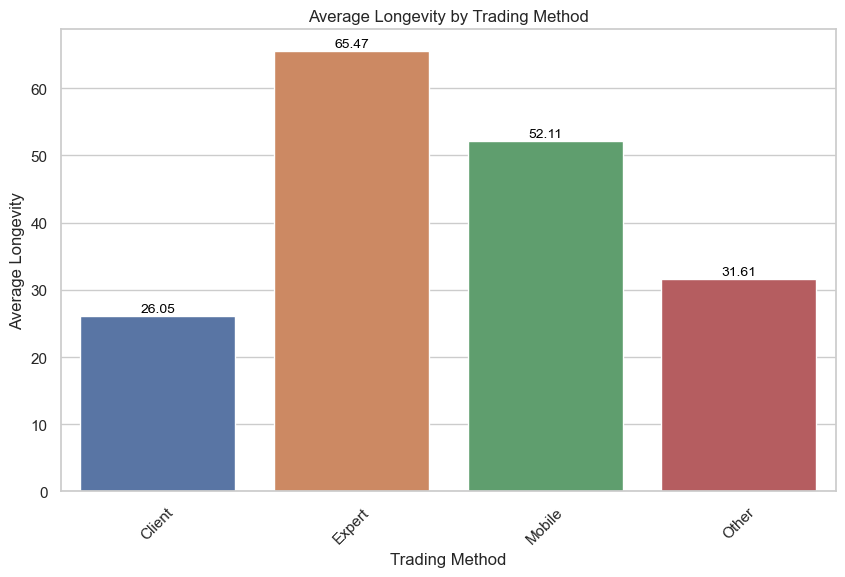

In [95]:
# Calculate average longevity for each trading method
average_longevity_by_method = dataset.groupby('Trading_Method')['longevity'].mean().reset_index()

# Rename columns
average_longevity_by_method = average_longevity_by_method.rename(columns={'Trading_Method': 'Trading Method', 'longevity': 'Average Longevity'})

# Plot average longevity by trading method
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='Trading Method', y='Average Longevity', data=average_longevity_by_method)
plt.title('Average Longevity by Trading Method')
plt.xlabel('Trading Method')
plt.ylabel('Average Longevity')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

# Add labels on each column
for p in ax.patches:
    ax.annotate('{:.2f}'.format(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.show()


In [99]:
trading_method_dataset = dataset[['Trading_Method','longevity']]
trading_method_dataset

Trading_Method  longevity
0            Expert        142
1            Mobile        107
2            Expert         13
3            Mobile          9
4            Mobile        372
...             ...        ...
5720         Mobile        381
5721         Expert        100
5722         Expert         46
5723         Expert        253
5724         Expert         85

[5724 rows x 2 columns]

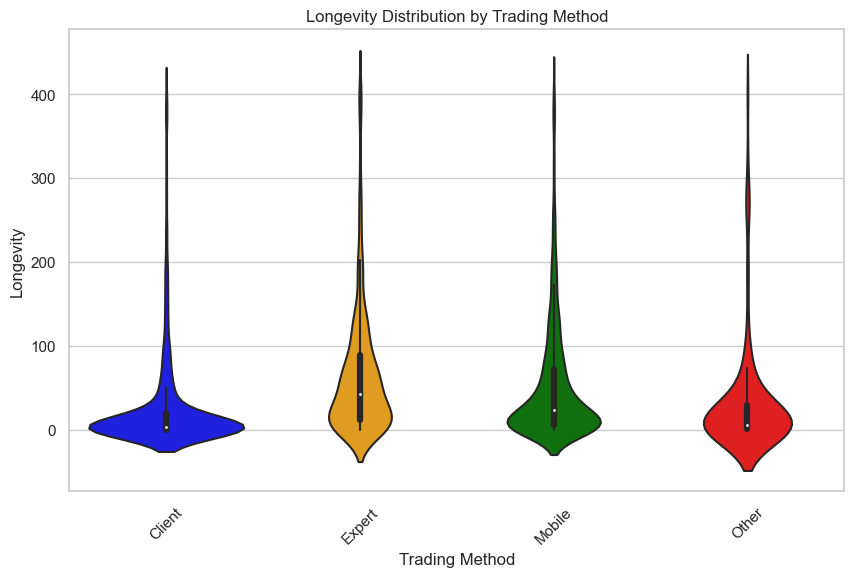

In [108]:
plt.figure(figsize=(10, 6))
sns.violinplot(x='Trading_Method', y='longevity', data=dataset,
               order=['Client', 'Expert', 'Mobile', 'Other'],
               palette={'Client': 'blue', 'Expert': 'orange', 'Mobile': 'green', 'Other': 'red'})
plt.title('Longevity Distribution by Trading Method')
plt.xlabel('Trading Method')
plt.ylabel('Longevity')
plt.xticks(rotation=45)
plt.show()


## 2.2 Longevity vs average volume

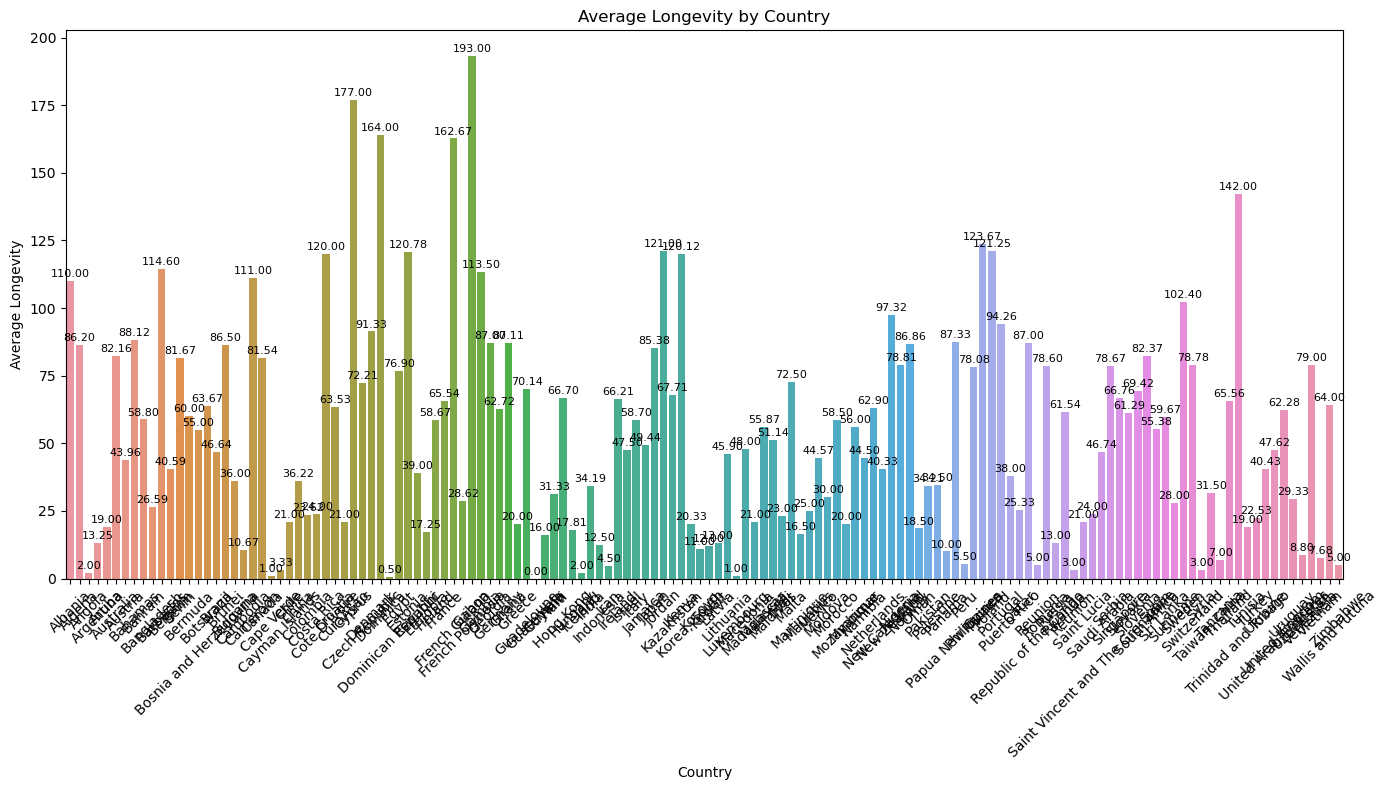

In [ ]:
# Calculate average longevity for each country
average_longevity_by_country = dataset.groupby('country')['longevity'].mean().reset_index()

# Rename columns
average_longevity_by_country = average_longevity_by_country.rename(columns={'country': 'Country', 'longevity': 'Average Longevity'})

# Plot average longevity by country
plt.figure(figsize=(14, 8))
ax = sns.barplot(x='Country', y='Average Longevity', data=average_longevity_by_country)
plt.title('Average Longevity by Country')
plt.xlabel('Country')
plt.ylabel('Average Longevity')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

# Add labels on each column
for p in ax.patches:
    ax.annotate('{:.2f}'.format(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=8, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.tight_layout()
plt.show()


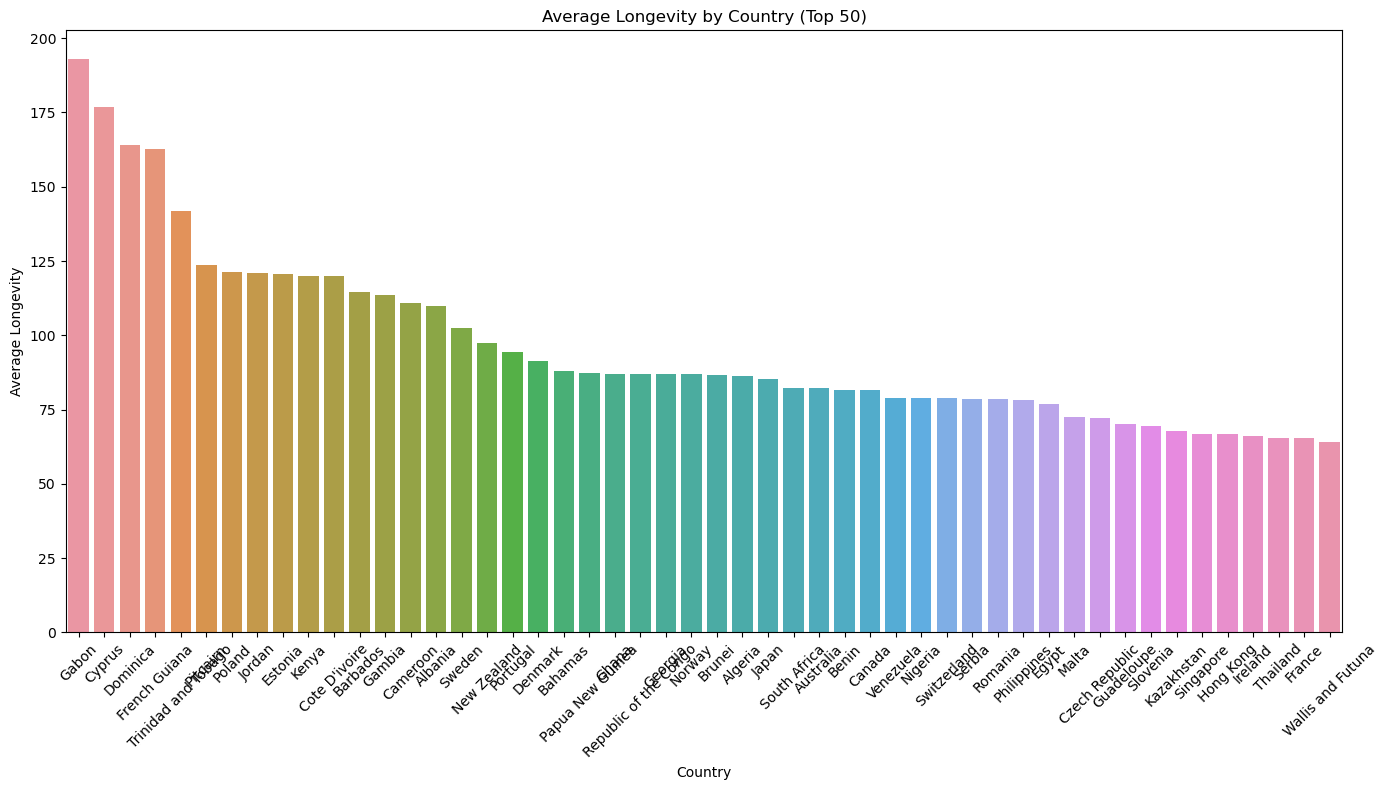

In [ ]:
# Calculate average longevity for each country
average_longevity_by_country = dataset.groupby('country')['longevity'].mean().reset_index()

# Sort by longevity and select top 50 countries
top_50_countries = average_longevity_by_country.sort_values(by='longevity', ascending=False).head(50)

# Plot average longevity by country
plt.figure(figsize=(14, 8))
sns.barplot(x='country', y='longevity', data=top_50_countries)
plt.title('Average Longevity by Country (Top 50)')
plt.xlabel('Country')
plt.ylabel('Average Longevity')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

## 2.3 Longevity vs profit

In [67]:
dataset

login       country account_currency  Trading_Frequency  \
0         524978       Austria              EUR           9.802817   
1         524979        France              USD          20.504673   
2         760487     Singapore              SGD           5.307692   
3         804664      Malaysia              USD           9.444444   
4         804687     Australia              AUD           1.301075   
...          ...           ...              ...                ...   
5720    88944953        Canada              CAD           0.141732   
5721    88944971      Malaysia              USD           4.420000   
5722    88945034     Singapore              USD          10.413043   
5723    88945038     Singapore              SGD           5.162055   
5724  1000054838  Saudi Arabia              USD          48.529412   

      Total_Trades  Buy_Percentage  Average_Volume  Average_Volume_USD  \
0             1392       47.485632        1.230632        4.044965e+08   
1             2194       49.635369        0.013943        6.724644e+03   
2               69       15.942029        0.012609        2.783882e+03   
3               85       63.529412        0.018706        5.490400e+03   
4              484       51.239669        0.019773        5.271755e+05   
...            ...             ...             ...                 ...   
5720            54       37.037037        0.041667        1.621176e+07   
5721           442       46.153846        1.389367        1.249156e+09   
5722           479       40.083507        0.043278        1.522641e+07   
5723          1306       58.805513        0.078913        1.824879e+04   
5724          4125       56.533333        0.105981        4.312099e+04   

      Average_DPM  Unique_Symbols_Traded  Peak_Trading_Times  \
0       -3.415139               9.333333                  17   
1     -264.410462               3.500000                  17   
2    -3403.656636               1.000000                  17   
3       17.604088               6.000000                   3   
4      -45.416080               2.769231                   3   
...           ...                    ...                 ...   
5720   -24.464597               3.333333                   8   
5721  -298.590702               7.000000                  23   
5722   -70.501778              11.333333                  15   
5723   140.220508               4.111111                  17   
5724   -48.437138               1.666667                  15   

      Ratio_Profitable_Trades  Profit_Loss_Variability  \
0                    0.762931               316.119097   
1                    0.718323                11.676818   
2                    0.463768                12.396847   
3                    0.517647                 6.861240   
4                    0.311983                 3.559165   
...                       ...                      ...   
5720                 0.796296                 8.643649   
5721                 0.658371               428.451471   
5722                 0.626305                15.980216   
5723                 0.882083                63.497096   
5724                 0.684606                48.027839   

      Average_Trade_Duration  TP/SL Hit Ratio  Reward_Risk_Ratio  \
0               36404.811782         3.375000           0.086763   
1               57056.876937         0.087081          -0.549598   
2               46984.231884         0.000000           0.000000   
3                8397.694118         0.000000           0.000000   
4               22939.518595         0.002283          55.989328   
...                      ...              ...                ...   
5720             6284.925926         0.000000           0.000000   
5721            73300.337104         6.823529           0.195671   
5722             6259.916493         2.760870           0.623201   
5723            77044.003063        53.785714           0.225533   
5724             3697.880242         0.043292          -1.329755   

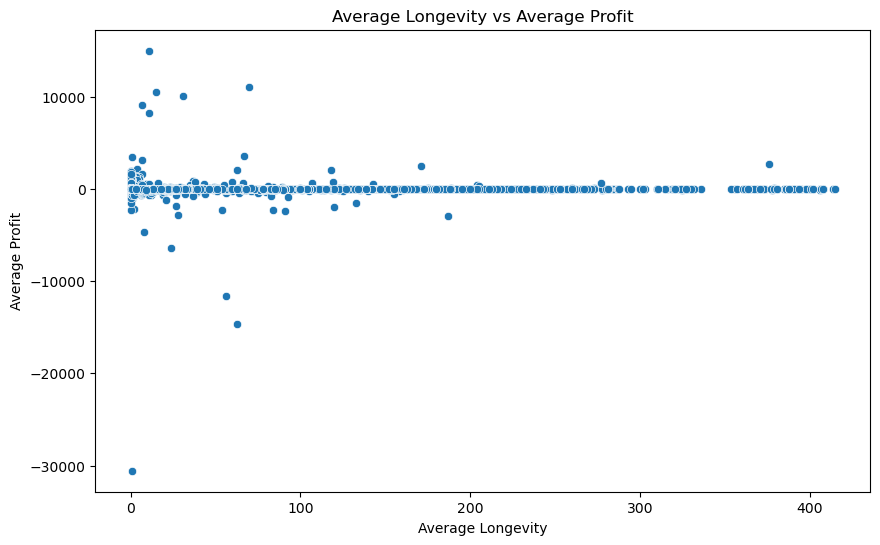

In [ ]:
# Plot average longevity vs average profit
plt.figure(figsize=(10, 6))
sns.scatterplot(x='longevity', y='Average_Profit', data=dataset)
plt.title('Average Longevity vs Average Profit')
plt.xlabel('Average Longevity')
plt.ylabel('Average Profit')
plt.show()

In [70]:
profit_dataset = dataset[['Average_Profit', 'longevity']]
profit_dataset

Average_Profit  longevity
0          25.668214        142
1          -0.837867        107
2         -10.232797         13
3          -0.524588          9
4          -0.210692        372
...              ...        ...
5720       -0.134167        381
5721      -51.760588        100
5722       -1.519937         46
5723       -0.125379        253
5724       -2.182613         85

[5724 rows x 2 columns]

In [73]:
profit_dataset.describe()

Average_Profit   longevity
count     5724.000000  5724.00000
mean       -11.225060    45.18833
std        712.989776    69.93953
min     -38585.491238     0.00000
25%        -16.594074     2.00000
50%         -1.782089    15.00000
75%          0.220208    60.00000
max      15005.000000   415.00000

In [77]:
profit_dataset.idxmax()

Average_Profit     788
longevity         5693
Profit_Bin         788
dtype: int64

/var/folders/s5/yjzt_0752f3_4zc69pnv4j700000gn/T/ipykernel_54210/369020858.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  profit_dataset['Profit_Bin'] = pd.cut(profit_dataset['Average_Profit'], bins=bins, labels=labels)


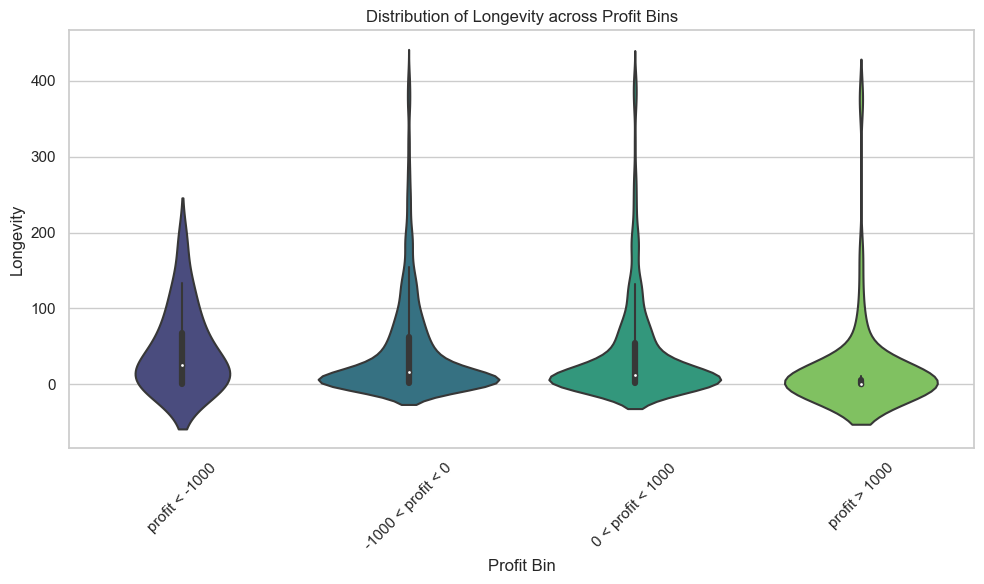

In [72]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define profit bins
bins = [-float('inf'), -1000, 0, 1000, float('inf')]
labels = ['profit < -1000', '-1000 < profit < 0', '0 < profit < 1000', 'profit > 1000']

# Create a new column for profit bins
profit_dataset['Profit_Bin'] = pd.cut(profit_dataset['Average_Profit'], bins=bins, labels=labels)

# Set the order of profit bins for plotting
profit_bin_order = ['profit < -1000', '-1000 < profit < 0', '0 < profit < 1000', 'profit > 1000']

# Plotting
plt.figure(figsize=(10, 6))
sns.violinplot(data=profit_dataset, x='Profit_Bin', y='longevity', order=profit_bin_order, palette='viridis')
plt.title('Distribution of Longevity across Profit Bins')
plt.xlabel('Profit Bin')
plt.ylabel('Longevity')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


/var/folders/s5/yjzt_0752f3_4zc69pnv4j700000gn/T/ipykernel_54210/65717133.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  profit_dataset['Profit_Bin'] = pd.cut(profit_dataset['Average_Profit'], bins=bins, labels=labels)


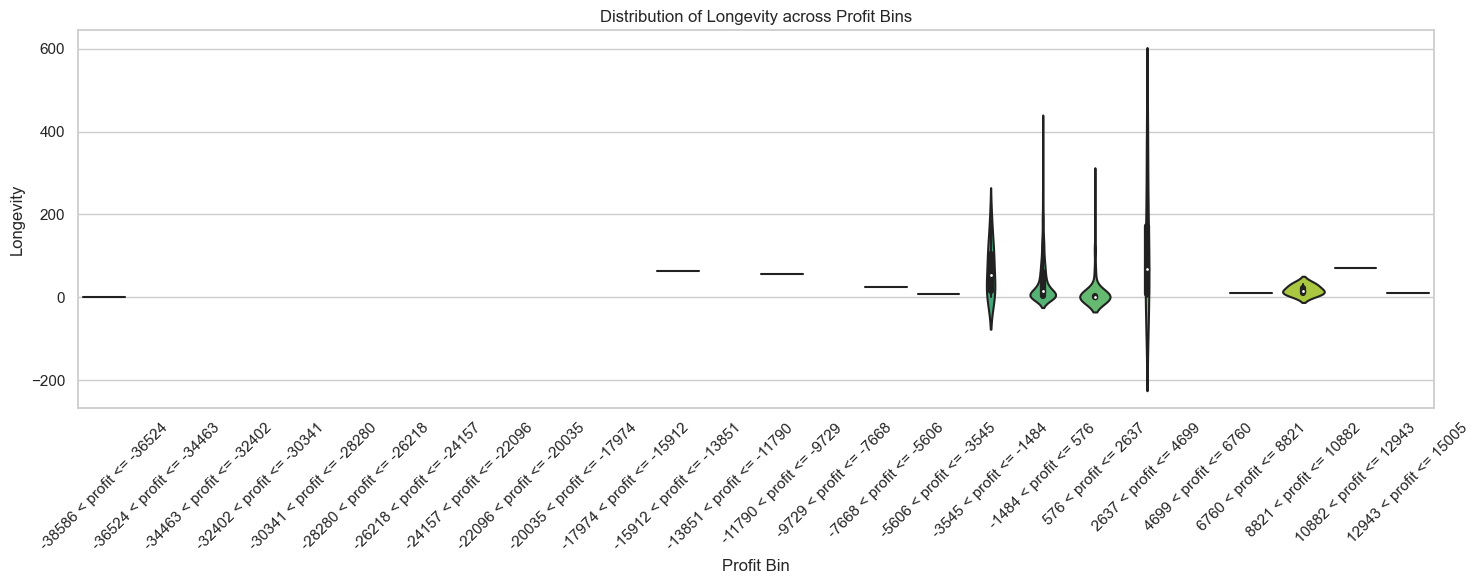

In [74]:
import numpy as np

# Define profit bins
min_profit = -38586
max_profit = 15005
bin_width = 2000
num_bins = int((max_profit - min_profit) / bin_width) + 1
bins = np.linspace(min_profit, max_profit, num=num_bins)

# Define bin labels
labels = [f'{int(bins[i])} < profit <= {int(bins[i+1])}' for i in range(len(bins)-1)]

# Create a new column for profit bins
profit_dataset['Profit_Bin'] = pd.cut(profit_dataset['Average_Profit'], bins=bins, labels=labels)

# Plotting
plt.figure(figsize=(15, 6))
sns.violinplot(data=profit_dataset, x='Profit_Bin', y='longevity', order=labels, palette='viridis')
plt.title('Distribution of Longevity across Profit Bins')
plt.xlabel('Profit Bin')
plt.ylabel('Longevity')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



/var/folders/s5/yjzt_0752f3_4zc69pnv4j700000gn/T/ipykernel_54210/3660204297.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  profit_dataset['Profit_Bin'] = pd.cut(profit_dataset['Average_Profit'], bins=bins, labels=labels)


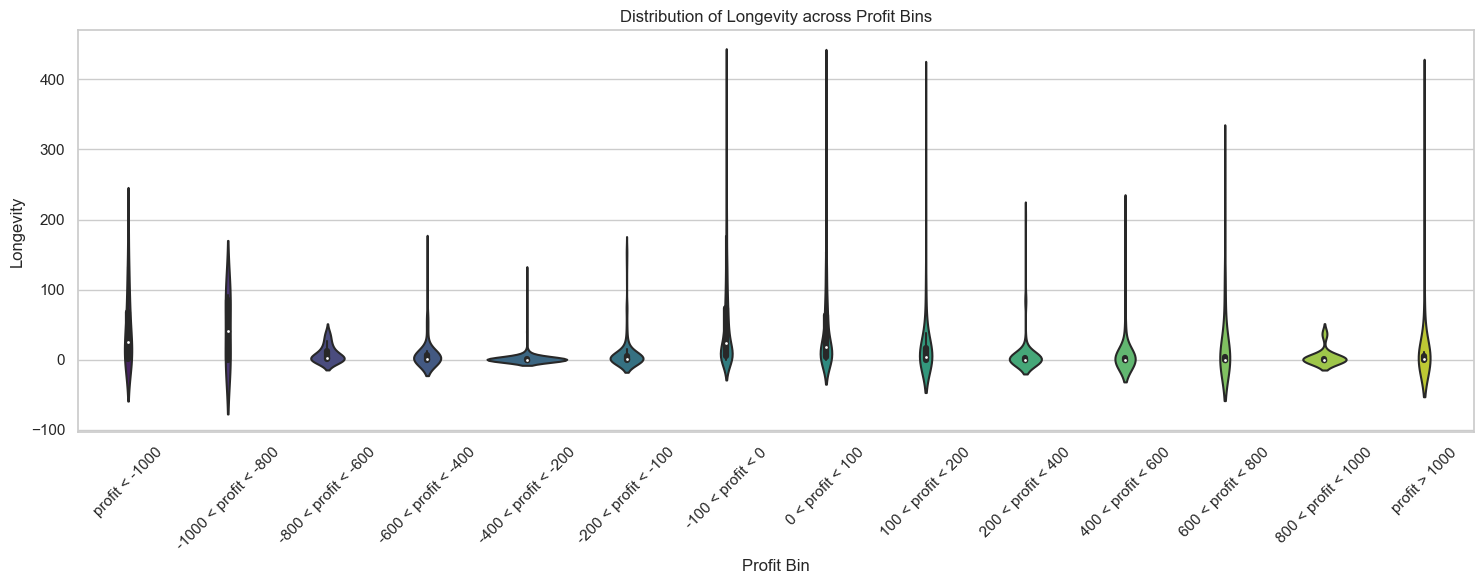

In [78]:
# Define profit bins
bins = [-float('inf'), -1000, -800, -600, -400, -200, -100, 0, 100, 200, 400, 600, 800, 1000, float('inf')]
labels = ['profit < -1000', '-1000 < profit < -800', '-800 < profit < -600', '-600 < profit < -400',
          '-400 < profit < -200', '-200 < profit < -100', '-100 < profit < 0', '0 < profit < 100',
          '100 < profit < 200', '200 < profit < 400', '400 < profit < 600', '600 < profit < 800',
          '800 < profit < 1000', 'profit > 1000']

# Create a new column for profit bins
profit_dataset['Profit_Bin'] = pd.cut(profit_dataset['Average_Profit'], bins=bins, labels=labels)

# Plotting
plt.figure(figsize=(15, 6))
sns.violinplot(data=profit_dataset, x='Profit_Bin', y='longevity', order=labels, palette='viridis')
plt.title('Distribution of Longevity across Profit Bins')
plt.xlabel('Profit Bin')
plt.ylabel('Longevity')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## 2.4 Longevity vs average volume in USD

In [ ]:
# # Plot average longevity vs Average_Column_USD
# plt.figure(figsize=(10, 6))
# sns.scatterplot(x='longevity', y='Average_Volume_USD', data=dataset)
# plt.title('Average Longevity vs Average Column USD')
# plt.xlabel('Average Longevity')
# plt.ylabel('Average Column USD')
# plt.show()

In [79]:
dataset

login       country account_currency  Trading_Frequency  \
0         524978       Austria              EUR           9.802817   
1         524979        France              USD          20.504673   
2         760487     Singapore              SGD           5.307692   
3         804664      Malaysia              USD           9.444444   
4         804687     Australia              AUD           1.301075   
...          ...           ...              ...                ...   
5720    88944953        Canada              CAD           0.141732   
5721    88944971      Malaysia              USD           4.420000   
5722    88945034     Singapore              USD          10.413043   
5723    88945038     Singapore              SGD           5.162055   
5724  1000054838  Saudi Arabia              USD          48.529412   

      Total_Trades  Buy_Percentage  Average_Volume  Average_Volume_USD  \
0             1392       47.485632        1.230632        4.044965e+08   
1             2194       49.635369        0.013943        6.724644e+03   
2               69       15.942029        0.012609        2.783882e+03   
3               85       63.529412        0.018706        5.490400e+03   
4              484       51.239669        0.019773        5.271755e+05   
...            ...             ...             ...                 ...   
5720            54       37.037037        0.041667        1.621176e+07   
5721           442       46.153846        1.389367        1.249156e+09   
5722           479       40.083507        0.043278        1.522641e+07   
5723          1306       58.805513        0.078913        1.824879e+04   
5724          4125       56.533333        0.105981        4.312099e+04   

      Average_DPM  Unique_Symbols_Traded  Peak_Trading_Times  \
0       -3.415139               9.333333                  17   
1     -264.410462               3.500000                  17   
2    -3403.656636               1.000000                  17   
3       17.604088               6.000000                   3   
4      -45.416080               2.769231                   3   
...           ...                    ...                 ...   
5720   -24.464597               3.333333                   8   
5721  -298.590702               7.000000                  23   
5722   -70.501778              11.333333                  15   
5723   140.220508               4.111111                  17   
5724   -48.437138               1.666667                  15   

      Ratio_Profitable_Trades  Profit_Loss_Variability  \
0                    0.762931               316.119097   
1                    0.718323                11.676818   
2                    0.463768                12.396847   
3                    0.517647                 6.861240   
4                    0.311983                 3.559165   
...                       ...                      ...   
5720                 0.796296                 8.643649   
5721                 0.658371               428.451471   
5722                 0.626305                15.980216   
5723                 0.882083                63.497096   
5724                 0.684606                48.027839   

      Average_Trade_Duration  TP/SL Hit Ratio  Reward_Risk_Ratio  \
0               36404.811782         3.375000           0.086763   
1               57056.876937         0.087081          -0.549598   
2               46984.231884         0.000000           0.000000   
3                8397.694118         0.000000           0.000000   
4               22939.518595         0.002283          55.989328   
...                      ...              ...                ...   
5720             6284.925926         0.000000           0.000000   
5721            73300.337104         6.823529           0.195671   
5722             6259.916493         2.760870           0.623201   
5723            77044.003063        53.785714           0.225533   
5724             3697.880242         0.043292          -1.329755   

In [80]:
volume_dataset = dataset[['Average_Volume_USD', 'longevity']]
volume_dataset

Average_Volume_USD  longevity
0           4.044965e+08        142
1           6.724644e+03        107
2           2.783882e+03         13
3           5.490400e+03          9
4           5.271755e+05        372
...                  ...        ...
5720        1.621176e+07        381
5721        1.249156e+09        100
5722        1.522641e+07         46
5723        1.824879e+04        253
5724        4.312099e+04         85

[5724 rows x 2 columns]

## 2.5 Longevity vs average commission

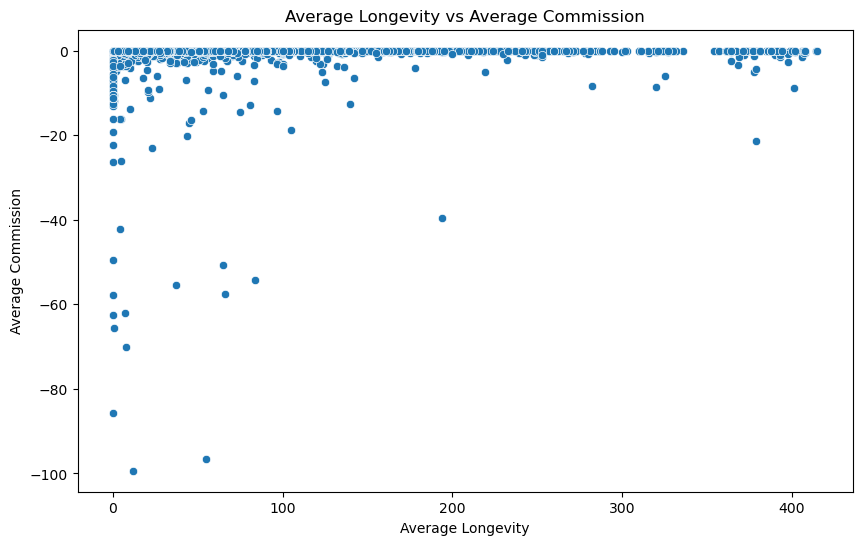

In [ ]:
# Plot average commission vs average longevity
plt.figure(figsize=(10, 6))
sns.scatterplot(x='longevity', y='Average_Commission', data=dataset)
plt.title('Average Longevity vs Average Commission')
plt.xlabel('Average Longevity')
plt.ylabel('Average Commission')
plt.show()


In [83]:
dataset

login       country account_currency  Trading_Frequency  \
0         524978       Austria              EUR           9.802817   
1         524979        France              USD          20.504673   
2         760487     Singapore              SGD           5.307692   
3         804664      Malaysia              USD           9.444444   
4         804687     Australia              AUD           1.301075   
...          ...           ...              ...                ...   
5720    88944953        Canada              CAD           0.141732   
5721    88944971      Malaysia              USD           4.420000   
5722    88945034     Singapore              USD          10.413043   
5723    88945038     Singapore              SGD           5.162055   
5724  1000054838  Saudi Arabia              USD          48.529412   

      Total_Trades  Buy_Percentage  Average_Volume  Average_Volume_USD  \
0             1392       47.485632        1.230632        4.044965e+08   
1             2194       49.635369        0.013943        6.724644e+03   
2               69       15.942029        0.012609        2.783882e+03   
3               85       63.529412        0.018706        5.490400e+03   
4              484       51.239669        0.019773        5.271755e+05   
...            ...             ...             ...                 ...   
5720            54       37.037037        0.041667        1.621176e+07   
5721           442       46.153846        1.389367        1.249156e+09   
5722           479       40.083507        0.043278        1.522641e+07   
5723          1306       58.805513        0.078913        1.824879e+04   
5724          4125       56.533333        0.105981        4.312099e+04   

      Average_DPM  Unique_Symbols_Traded  Peak_Trading_Times  \
0       -3.415139               9.333333                  17   
1     -264.410462               3.500000                  17   
2    -3403.656636               1.000000                  17   
3       17.604088               6.000000                   3   
4      -45.416080               2.769231                   3   
...           ...                    ...                 ...   
5720   -24.464597               3.333333                   8   
5721  -298.590702               7.000000                  23   
5722   -70.501778              11.333333                  15   
5723   140.220508               4.111111                  17   
5724   -48.437138               1.666667                  15   

      Ratio_Profitable_Trades  Profit_Loss_Variability  \
0                    0.762931               316.119097   
1                    0.718323                11.676818   
2                    0.463768                12.396847   
3                    0.517647                 6.861240   
4                    0.311983                 3.559165   
...                       ...                      ...   
5720                 0.796296                 8.643649   
5721                 0.658371               428.451471   
5722                 0.626305                15.980216   
5723                 0.882083                63.497096   
5724                 0.684606                48.027839   

      Average_Trade_Duration  TP/SL Hit Ratio  Reward_Risk_Ratio  \
0               36404.811782         3.375000           0.086763   
1               57056.876937         0.087081          -0.549598   
2               46984.231884         0.000000           0.000000   
3                8397.694118         0.000000           0.000000   
4               22939.518595         0.002283          55.989328   
...                      ...              ...                ...   
5720             6284.925926         0.000000           0.000000   
5721            73300.337104         6.823529           0.195671   
5722             6259.916493         2.760870           0.623201   
5723            77044.003063        53.785714           0.225533   
5724             3697.880242         0.043292          -1.329755   

In [84]:
dataset_commission  =  dataset[['Average_Commission', 'longevity']]
dataset_commission

Average_Commission  longevity
0              -6.935588        142
1               0.000000        107
2               0.000000         13
3               0.000000          9
4              -0.101129        372
...                  ...        ...
5720            0.000000        381
5721            0.000000        100
5722           -0.256347         46
5723           -0.700736        253
5724            0.000000         85

[5724 rows x 2 columns]

/var/folders/s5/yjzt_0752f3_4zc69pnv4j700000gn/T/ipykernel_54210/2933004135.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_commission['Commission_Bin'] = pd.cut(dataset_commission['Average_Commission'], bins=bins, labels=labels)


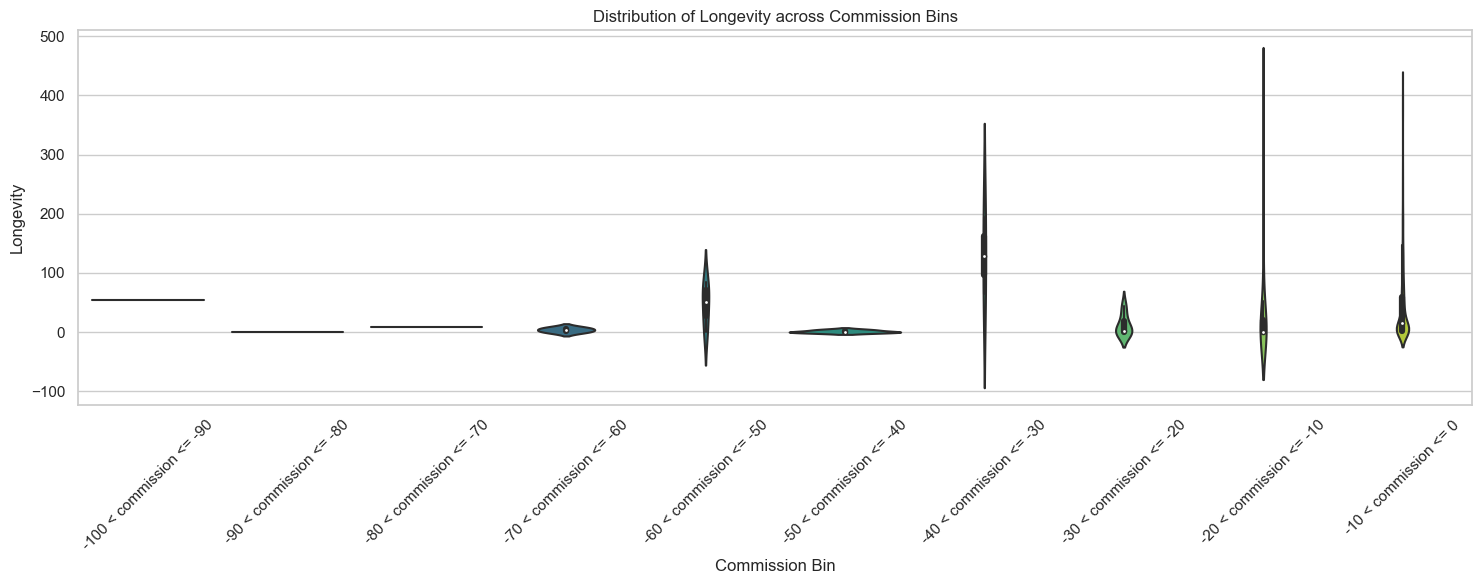

In [85]:
# Define commission bins
bins = np.linspace(-100, 0, num=11)
labels = [f'{int(bins[i])} < commission <= {int(bins[i+1])}' for i in range(len(bins)-1)]

# Create a new column for commission bins
dataset_commission['Commission_Bin'] = pd.cut(dataset_commission['Average_Commission'], bins=bins, labels=labels)

# Plotting
plt.figure(figsize=(15, 6))
sns.violinplot(data=dataset_commission, x='Commission_Bin', y='longevity', order=labels, palette='viridis')
plt.title('Distribution of Longevity across Commission Bins')
plt.xlabel('Commission Bin')
plt.ylabel('Longevity')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

/var/folders/s5/yjzt_0752f3_4zc69pnv4j700000gn/T/ipykernel_54210/3682654741.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_commission['Commission_Bin'] = pd.cut(dataset_commission['Average_Commission'], bins=bins, labels=labels)


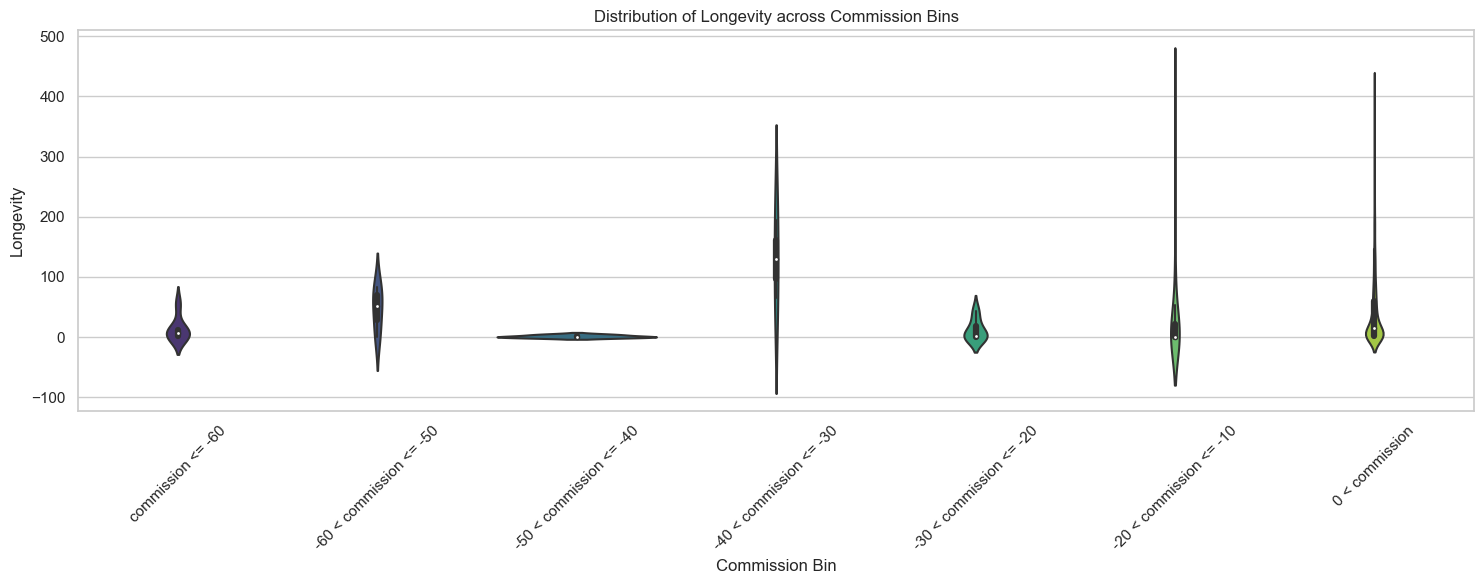

In [90]:
# Define commission bins
bins = [-float('inf'), -60, -50, -40, -30, -20, -10, 0]
labels = ['commission <= -60', '-60 < commission <= -50', '-50 < commission <= -40',
          '-40 < commission <= -30', '-30 < commission <= -20', '-20 < commission <= -10', '0 < commission']

# Create a new column for commission bins
dataset_commission['Commission_Bin'] = pd.cut(dataset_commission['Average_Commission'], bins=bins, labels=labels)

# Plotting
plt.figure(figsize=(15, 6))
sns.violinplot(data=dataset_commission, x='Commission_Bin', y='longevity', order=labels, palette='viridis')
plt.title('Distribution of Longevity across Commission Bins')
plt.xlabel('Commission Bin')
plt.ylabel('Longevity')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


/var/folders/s5/yjzt_0752f3_4zc69pnv4j700000gn/T/ipykernel_54210/1230614578.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_commission['Commission_Bin'] = pd.cut(dataset_commission['Average_Commission'], bins=bins, labels=labels)


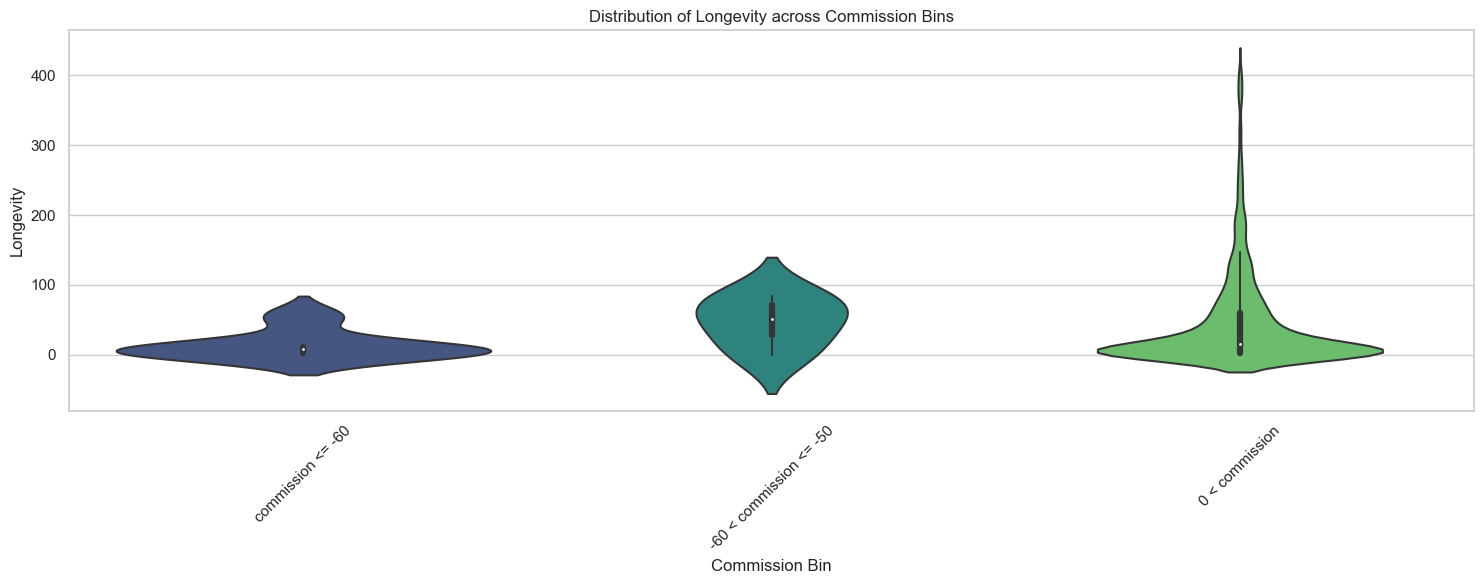

In [87]:
# Define commission bins
bins = [-float('inf'), -60, -50, 0]
labels = ['commission <= -60', '-60 < commission <= -50', '0 < commission']

# Create a new column for commission bins
dataset_commission['Commission_Bin'] = pd.cut(dataset_commission['Average_Commission'], bins=bins, labels=labels)

# Plotting
plt.figure(figsize=(15, 6))
sns.violinplot(data=dataset_commission, x='Commission_Bin', y='longevity', order=labels, palette='viridis')
plt.title('Distribution of Longevity across Commission Bins')
plt.xlabel('Commission Bin')
plt.ylabel('Longevity')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## 2.6 Longevity vs average swap

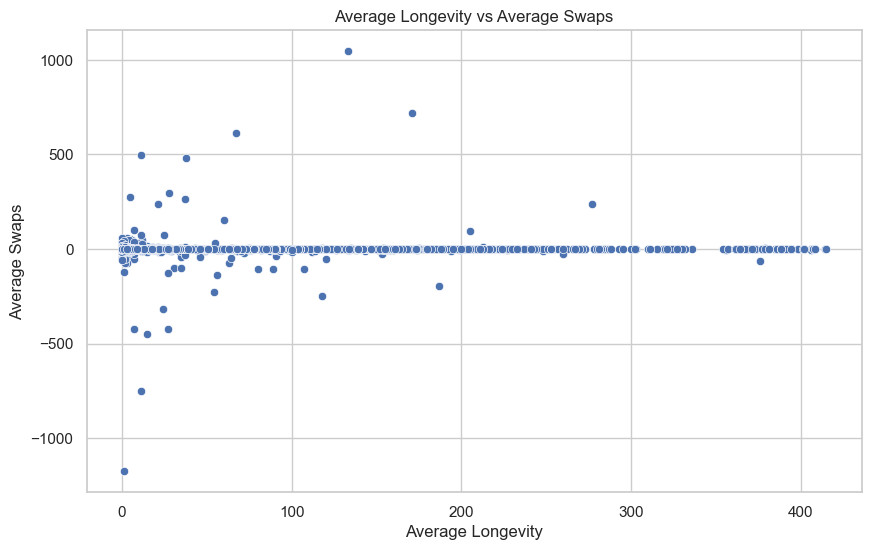

In [91]:
# Plot average swaps vs average longevity
plt.figure(figsize=(10, 6))
sns.scatterplot(x='longevity', y='Average_Swaps', data=dataset)
plt.title('Average Longevity vs Average Swaps')
plt.xlabel('Average Longevity')
plt.ylabel('Average Swaps')
plt.show()

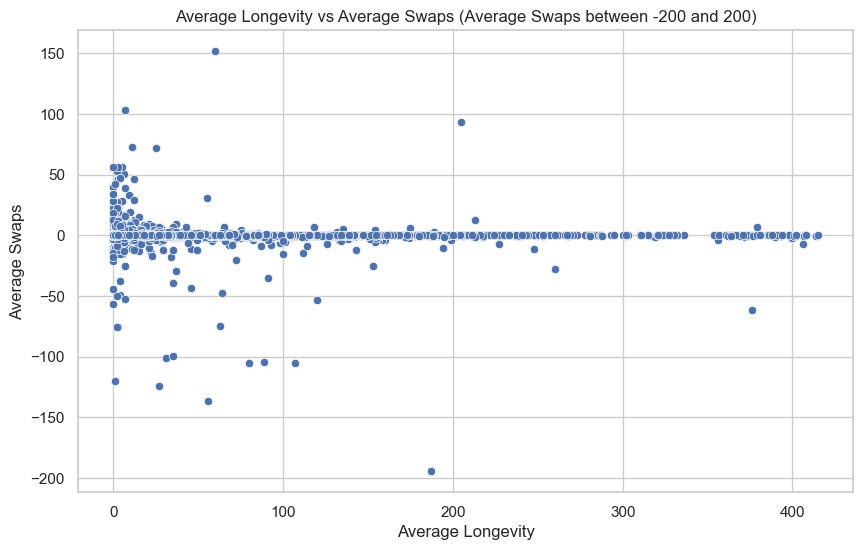

In [217]:
# Filtering data for average swaps between -200 and 200
filtered_data = dataset[(dataset['Average_Swaps'] >= -200) & (dataset['Average_Swaps'] <= 200)]

# Plotting average longevity vs. average swaps
plt.figure(figsize=(10, 6))
sns.scatterplot(x='longevity', y='Average_Swaps', data=filtered_data)
plt.title('Average Longevity vs Average Swaps (Average Swaps between -200 and 200)')
plt.xlabel('Average Longevity')
plt.ylabel('Average Swaps')
plt.grid(True)
plt.show()


In [ ]:
# Filtering data for average swaps between -200 and 200
filtered_data = dataset[(dataset['Average_Swaps'] >= -200) & (dataset['Average_Swaps'] <= 200)]

# Plotting average longevity vs. average swaps
plt.figure(figsize=(10, 6))
sns.scatterplot(x='longevity', y='Average_Swaps', data=filtered_data)
plt.title('Average Longevity vs Average Swaps (Average Swaps between -200 and 200)')
plt.xlabel('Average Longevity')
plt.ylabel('Average Swaps')
plt.grid(True)
plt.show()


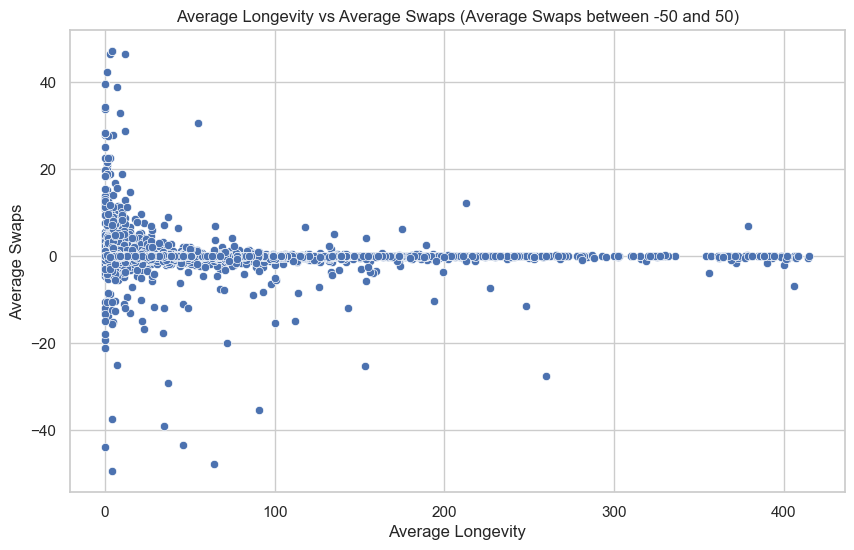

In [218]:
# Filtering data for average swaps between -50 and 50
filtered_data = dataset[(dataset['Average_Swaps'] >= -50) & (dataset['Average_Swaps'] <= 50)]

# Plotting average longevity vs. average swaps
plt.figure(figsize=(10, 6))
sns.scatterplot(x='longevity', y='Average_Swaps', data=filtered_data)
plt.title('Average Longevity vs Average Swaps (Average Swaps between -50 and 50)')
plt.xlabel('Average Longevity')
plt.ylabel('Average Swaps')
plt.grid(True)
plt.show()


/var/folders/s5/yjzt_0752f3_4zc69pnv4j700000gn/T/ipykernel_54210/917122820.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['Swaps_Bin'] = pd.cut(dataset['Average_Swaps'], bins=bins, labels=bin_labels)


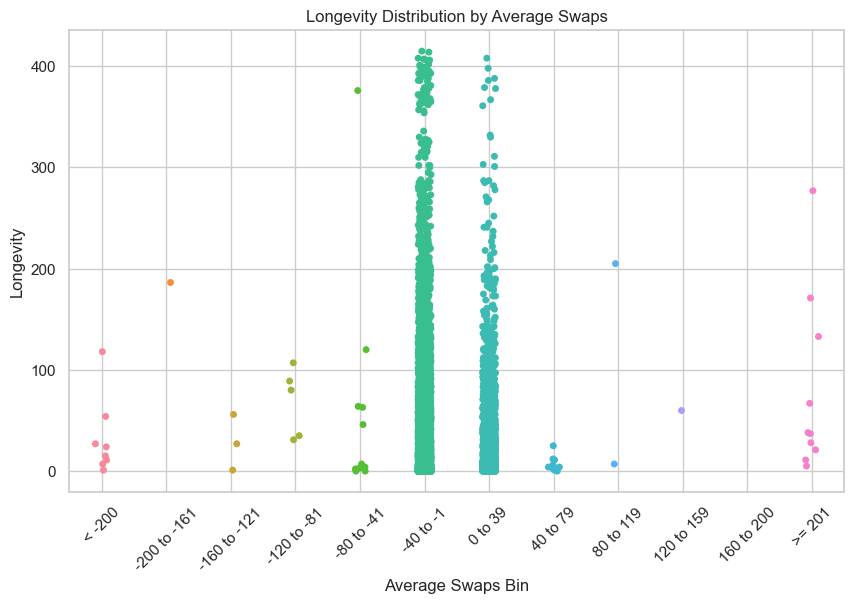

In [222]:
# Define the bin ranges
bins = [-np.inf, -200, -160, -120, -80, -40, 0, 40, 80, 120, 160, 200, np.inf]
bin_labels = ['< -200', '-200 to -161', '-160 to -121', '-120 to -81', '-80 to -41', 
              '-40 to -1', '0 to 39', '40 to 79', '80 to 119', '120 to 159', '160 to 200', '>= 201']

# Bin the average swaps data
dataset['Swaps_Bin'] = pd.cut(dataset['Average_Swaps'], bins=bins, labels=bin_labels)

# Create the strip plot
plt.figure(figsize=(10, 6))
sns.stripplot(x='Swaps_Bin', y='longevity', data=dataset, jitter=True)
plt.title('Longevity Distribution by Average Swaps')
plt.xlabel('Average Swaps Bin')
plt.ylabel('Longevity')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


/var/folders/s5/yjzt_0752f3_4zc69pnv4j700000gn/T/ipykernel_54210/1472263094.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['Swaps_Bin'] = pd.cut(dataset['Average_Swaps'], bins=bins, labels=bin_labels)


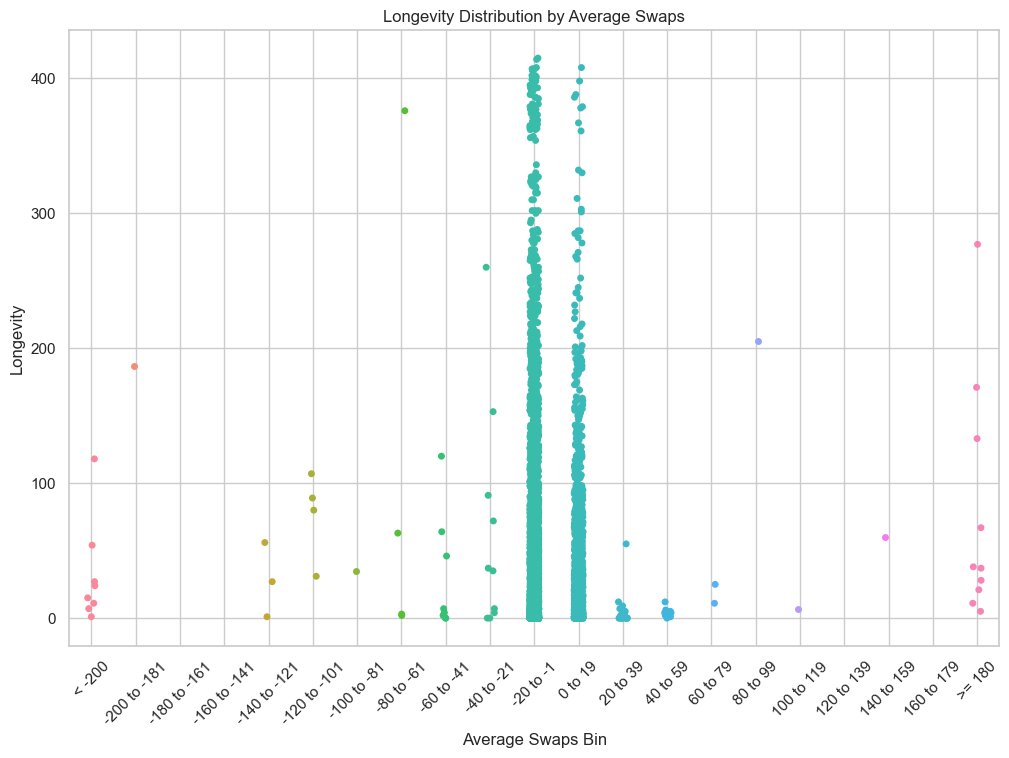

In [224]:
# Define the bin ranges
bins = [-np.inf, -200, -180, -160, -140, -120, -100, -80, -60, -40, -20, 0, 
        20, 40, 60, 80, 100, 120, 140, 160, 180, np.inf]
bin_labels = ['< -200', '-200 to -181', '-180 to -161', '-160 to -141', '-140 to -121',
              '-120 to -101', '-100 to -81', '-80 to -61', '-60 to -41', '-40 to -21', 
              '-20 to -1', '0 to 19', '20 to 39', '40 to 59', '60 to 79', '80 to 99', 
              '100 to 119', '120 to 139', '140 to 159', '160 to 179', '>= 180']

# Bin the average swaps data
dataset['Swaps_Bin'] = pd.cut(dataset['Average_Swaps'], bins=bins, labels=bin_labels)

# Create the strip plot
plt.figure(figsize=(12, 8))
sns.stripplot(x='Swaps_Bin', y='longevity', data=dataset, jitter=True)
plt.title('Longevity Distribution by Average Swaps')
plt.xlabel('Average Swaps Bin')
plt.ylabel('Longevity')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


/var/folders/s5/yjzt_0752f3_4zc69pnv4j700000gn/T/ipykernel_54210/4226374259.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['Swaps_Bin'] = pd.cut(dataset['Average_Swaps'], bins=bins)


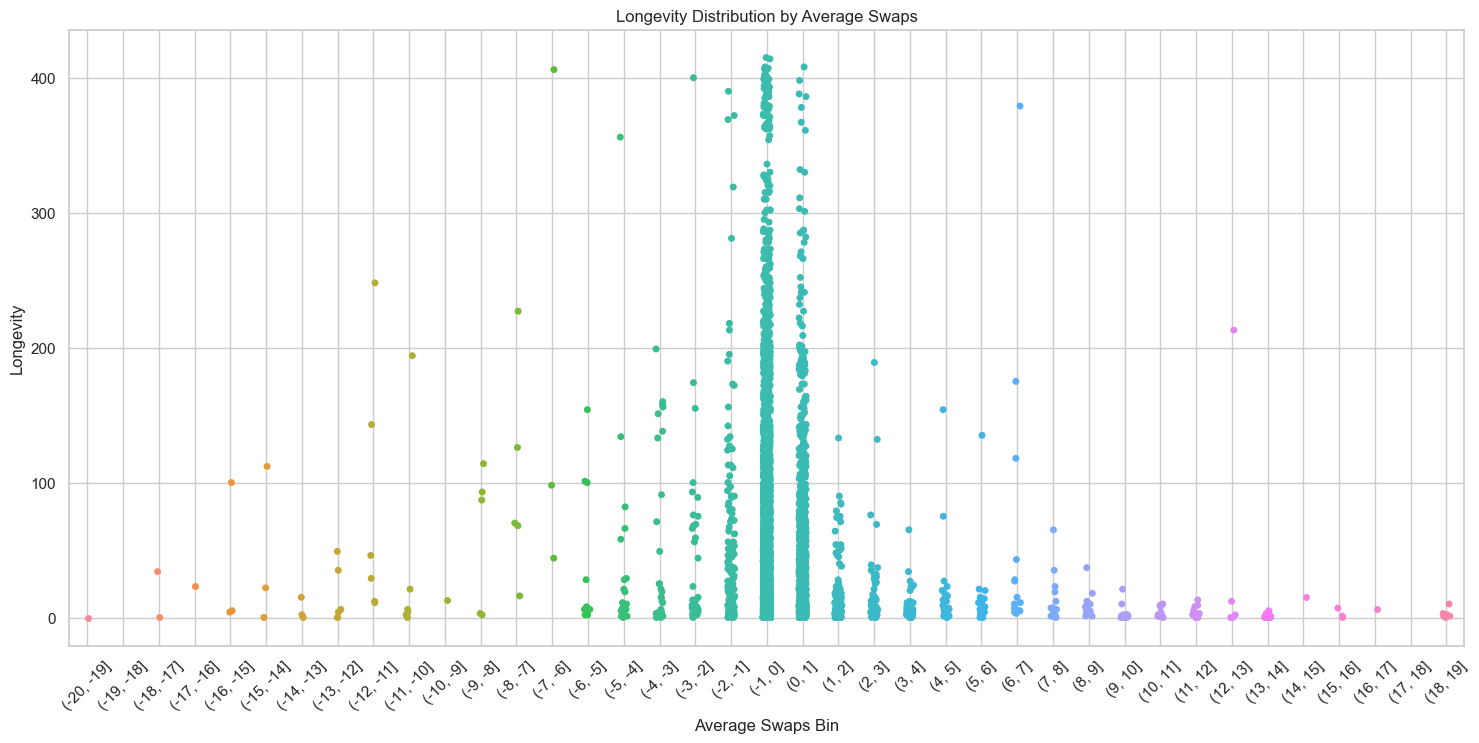

In [231]:
# Define the bin ranges
bins = np.arange(-20, 20, 1)

# Bin the average swaps data
dataset['Swaps_Bin'] = pd.cut(dataset['Average_Swaps'], bins=bins)

# Create the strip plot
plt.figure(figsize=(18, 8))
sns.stripplot(x='Swaps_Bin', y='longevity', data=dataset, jitter=True)
plt.title('Longevity Distribution by Average Swaps')
plt.xlabel('Average Swaps Bin')
plt.ylabel('Longevity')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

## 2.7 Longevity vs average net_deposit

In [43]:
dataset

login       country account_currency  Trading_Frequency  \
0         524978       Austria              EUR           9.802817   
1         524979        France              USD          20.504673   
2         760487     Singapore              SGD           5.307692   
3         804664      Malaysia              USD           9.444444   
4         804687     Australia              AUD           1.301075   
...          ...           ...              ...                ...   
5720    88944953        Canada              CAD           0.141732   
5721    88944971      Malaysia              USD           4.420000   
5722    88945034     Singapore              USD          10.413043   
5723    88945038     Singapore              SGD           5.162055   
5724  1000054838  Saudi Arabia              USD          48.529412   

      Total_Trades  Buy_Percentage  Average_Volume  Average_Volume_USD  \
0             1392       47.485632        1.230632        4.044965e+08   
1             2194       49.635369        0.013943        6.724644e+03   
2               69       15.942029        0.012609        2.783882e+03   
3               85       63.529412        0.018706        5.490400e+03   
4              484       51.239669        0.019773        5.271755e+05   
...            ...             ...             ...                 ...   
5720            54       37.037037        0.041667        1.621176e+07   
5721           442       46.153846        1.389367        1.249156e+09   
5722           479       40.083507        0.043278        1.522641e+07   
5723          1306       58.805513        0.078913        1.824879e+04   
5724          4125       56.533333        0.105981        4.312099e+04   

      Average_DPM  Unique_Symbols_Traded  Peak_Trading_Times  \
0       -3.415139               9.333333                  17   
1     -264.410462               3.500000                  17   
2    -3403.656636               1.000000                  17   
3       17.604088               6.000000                   3   
4      -45.416080               2.769231                   3   
...           ...                    ...                 ...   
5720   -24.464597               3.333333                   8   
5721  -298.590702               7.000000                  23   
5722   -70.501778              11.333333                  15   
5723   140.220508               4.111111                  17   
5724   -48.437138               1.666667                  15   

      Ratio_Profitable_Trades  Profit_Loss_Variability  \
0                    0.762931               316.119097   
1                    0.718323                11.676818   
2                    0.463768                12.396847   
3                    0.517647                 6.861240   
4                    0.311983                 3.559165   
...                       ...                      ...   
5720                 0.796296                 8.643649   
5721                 0.658371               428.451471   
5722                 0.626305                15.980216   
5723                 0.882083                63.497096   
5724                 0.684606                48.027839   

      Average_Trade_Duration  TP/SL Hit Ratio  Reward_Risk_Ratio  \
0               36404.811782         3.375000           0.086763   
1               57056.876937         0.087081          -0.549598   
2               46984.231884         0.000000           0.000000   
3                8397.694118         0.000000           0.000000   
4               22939.518595         0.002283          55.989328   
...                      ...              ...                ...   
5720             6284.925926         0.000000           0.000000   
5721            73300.337104         6.823529           0.195671   
5722             6259.916493         2.760870           0.623201   
5723            77044.003063        53.785714           0.225533   
5724             3697.880242         0.043292          -1.329755   

In [112]:
deposit_dataset = dataset[['average_net_deposit','net_deposit_frequency_ratio','longevity' ]]
deposit_dataset

average_net_deposit  net_deposit_frequency_ratio  longevity
0             -148.587567                     0.056225        142
1                6.950570                     0.047809        107
2                2.490144                     0.004819         13
3                0.167482                     0.007246          9
4                2.798054                     0.022388        372
...                   ...                          ...        ...
5720             0.122249                     0.004914        381
5721             1.870890                     0.002625        100
5722             0.000000                     0.000000         46
5723             0.000000                     0.000000        253
5724             0.000000                     0.000000         85

[5724 rows x 3 columns]

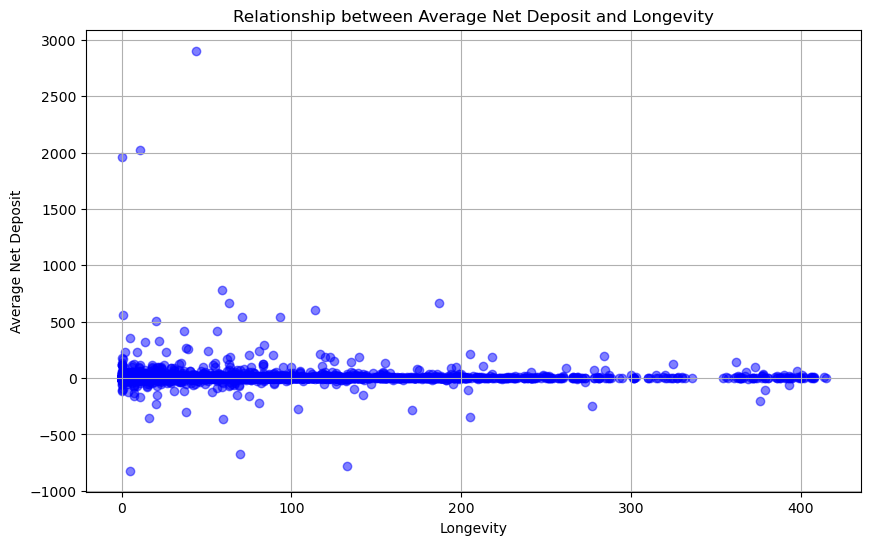

In [44]:
import matplotlib.pyplot as plt

# Extracting data
average_net_deposit = dataset['average_net_deposit']
longevity = dataset['longevity']

# Creating the plot
plt.figure(figsize=(10, 6))
plt.scatter(longevity, average_net_deposit, color='blue', alpha=0.5)
plt.title('Relationship between Average Net Deposit and Longevity')
plt.xlabel('Longevity')
plt.ylabel('Average Net Deposit')
plt.grid(True)
plt.show()


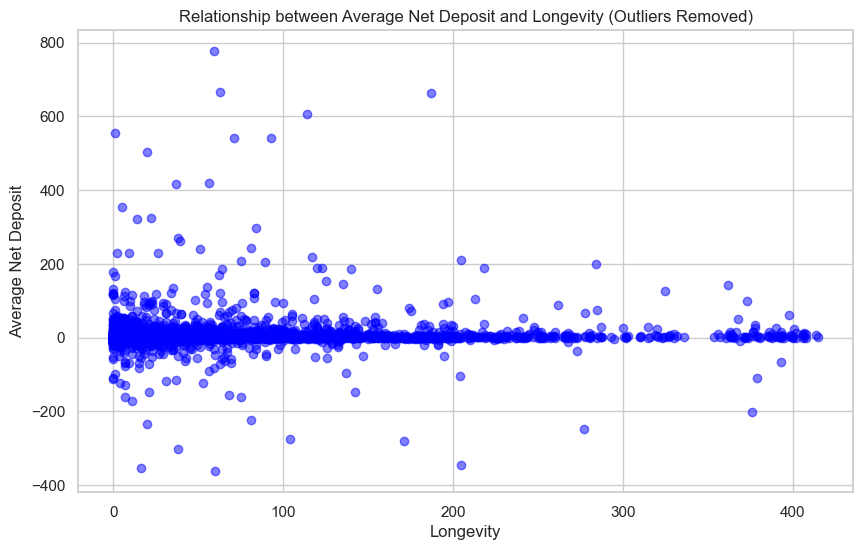

In [118]:
import matplotlib.pyplot as plt

# Filtering outliers
deposit_filtered_data = dataset[(dataset['average_net_deposit'] <= 1000) & (dataset['average_net_deposit'] >= -500) & 
                        (dataset['longevity'] <= 1000) & (dataset['longevity'] >= -500)]

# Extracting filtered data
average_net_deposit = filtered_data['average_net_deposit']
longevity = filtered_data['longevity']

# Creating the plot
plt.figure(figsize=(10, 6))
plt.scatter(longevity, average_net_deposit, color='blue', alpha=0.5)
plt.title('Relationship between Average Net Deposit and Longevity (Outliers Removed)')
plt.xlabel('Longevity')
plt.ylabel('Average Net Deposit')
plt.grid(True)
plt.show()


In [117]:
filtered_data

login       country account_currency  Trading_Frequency  \
0         524978       Austria              EUR           9.802817   
1         524979        France              USD          20.504673   
2         760487     Singapore              SGD           5.307692   
3         804664      Malaysia              USD           9.444444   
4         804687     Australia              AUD           1.301075   
...          ...           ...              ...                ...   
5720    88944953        Canada              CAD           0.141732   
5721    88944971      Malaysia              USD           4.420000   
5722    88945034     Singapore              USD          10.413043   
5723    88945038     Singapore              SGD           5.162055   
5724  1000054838  Saudi Arabia              USD          48.529412   

      Total_Trades  Buy_Percentage  Average_Volume  Average_Volume_USD  \
0             1392       47.485632        1.230632        4.044965e+08   
1             2194       49.635369        0.013943        6.724644e+03   
2               69       15.942029        0.012609        2.783882e+03   
3               85       63.529412        0.018706        5.490400e+03   
4              484       51.239669        0.019773        5.271755e+05   
...            ...             ...             ...                 ...   
5720            54       37.037037        0.041667        1.621176e+07   
5721           442       46.153846        1.389367        1.249156e+09   
5722           479       40.083507        0.043278        1.522641e+07   
5723          1306       58.805513        0.078913        1.824879e+04   
5724          4125       56.533333        0.105981        4.312099e+04   

      Average_DPM  Unique_Symbols_Traded  Peak_Trading_Times  \
0       -3.415139               9.333333                  17   
1     -264.410462               3.500000                  17   
2    -3403.656636               1.000000                  17   
3       17.604088               6.000000                   3   
4      -45.416080               2.769231                   3   
...           ...                    ...                 ...   
5720   -24.464597               3.333333                   8   
5721  -298.590702               7.000000                  23   
5722   -70.501778              11.333333                  15   
5723   140.220508               4.111111                  17   
5724   -48.437138               1.666667                  15   

      Ratio_Profitable_Trades  Profit_Loss_Variability  \
0                    0.762931               316.119097   
1                    0.718323                11.676818   
2                    0.463768                12.396847   
3                    0.517647                 6.861240   
4                    0.311983                 3.559165   
...                       ...                      ...   
5720                 0.796296                 8.643649   
5721                 0.658371               428.451471   
5722                 0.626305                15.980216   
5723                 0.882083                63.497096   
5724                 0.684606                48.027839   

      Average_Trade_Duration  TP/SL Hit Ratio  Reward_Risk_Ratio  \
0               36404.811782         3.375000           0.086763   
1               57056.876937         0.087081          -0.549598   
2               46984.231884         0.000000           0.000000   
3                8397.694118         0.000000           0.000000   
4               22939.518595         0.002283          55.989328   
...                      ...              ...                ...   
5720             6284.925926         0.000000           0.000000   
5721            73300.337104         6.823529           0.195671   
5722             6259.916493         2.760870           0.623201   
5723            77044.003063        53.785714           0.225533   
5724             3697.880242         0.043292          -1.329755   

/var/folders/s5/yjzt_0752f3_4zc69pnv4j700000gn/T/ipykernel_54210/3235720484.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['Net_Deposit_Bin'] = pd.cut(filtered_data['average_net_deposit'], bins=10)


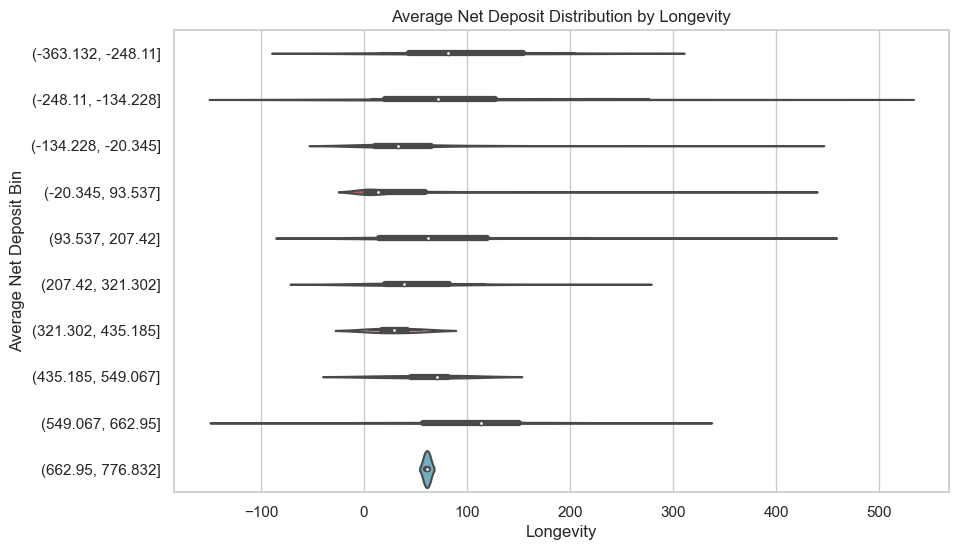

In [119]:

# Split Average Net Deposit into 10 bins
filtered_data['Net_Deposit_Bin'] = pd.cut(filtered_data['average_net_deposit'], bins=10)

# Create a violin plot
plt.figure(figsize=(10, 6))
sns.violinplot(x='longevity', y='Net_Deposit_Bin', data=filtered_data)
plt.title('Average Net Deposit Distribution by Longevity')
plt.xlabel('Longevity')
plt.ylabel('Average Net Deposit Bin')
plt.show()


/var/folders/s5/yjzt_0752f3_4zc69pnv4j700000gn/T/ipykernel_54210/2491470074.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['AvgNetDeposit_Bin'] = pd.cut(dataset['average_net_deposit'], bins=bin_edges, labels=bin_labels)


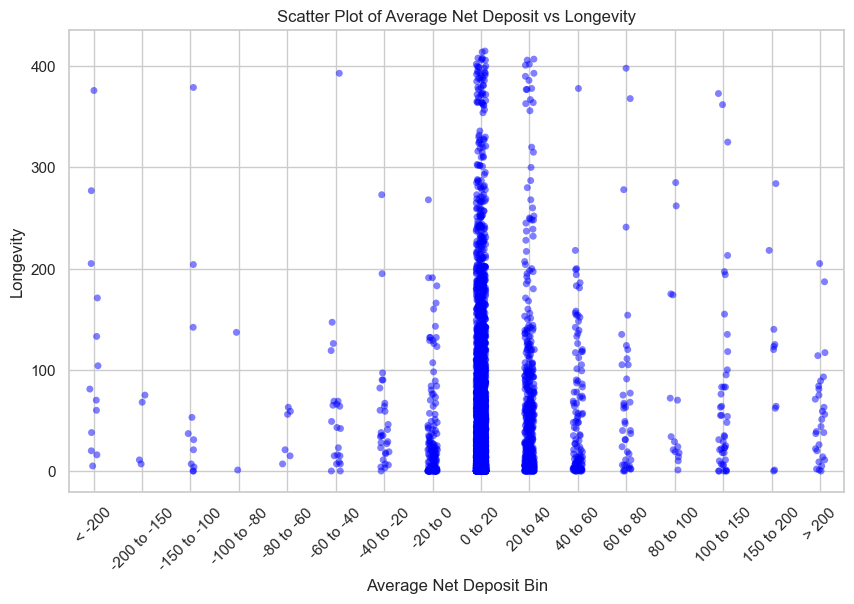

In [211]:

# Define the bin edges for average net deposit
bin_edges = [-float('inf'), -200, -150, -100] + list(range(-90, 101, 20)) + [150, 200, float('inf')]

# Bin the average net deposit data
bin_labels = ['< -200', '-200 to -150', '-150 to -100', '-100 to -80', '-80 to -60', '-60 to -40', '-40 to -20', '-20 to 0',
              '0 to 20', '20 to 40', '40 to 60', '60 to 80', '80 to 100', '100 to 150', '150 to 200', '> 200']
dataset['AvgNetDeposit_Bin'] = pd.cut(dataset['average_net_deposit'], bins=bin_edges, labels=bin_labels)

# Create the scatter plot with jitter
plt.figure(figsize=(10, 6))
sns.stripplot(x='AvgNetDeposit_Bin', y='longevity', data=dataset, jitter=True, color='blue', alpha=0.5)
plt.title('Scatter Plot of Average Net Deposit vs Longevity')
plt.xlabel('Average Net Deposit Bin')
plt.ylabel('Longevity')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


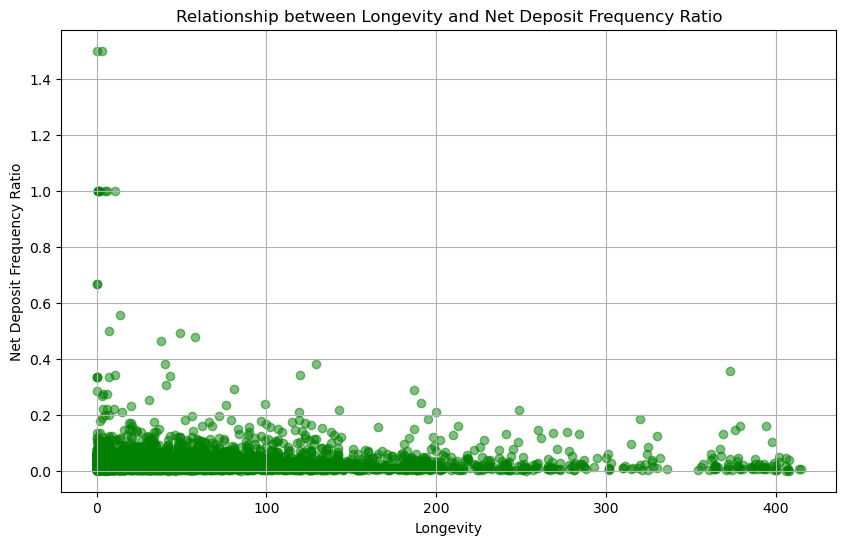

In [46]:
# Extracting data
longevity = dataset['longevity']
net_deposit_frequency_ratio = dataset['net_deposit_frequency_ratio']

# Creating the plot
plt.figure(figsize=(10, 6))
plt.scatter(longevity, net_deposit_frequency_ratio, color='green', alpha=0.5)
plt.title('Relationship between Longevity and Net Deposit Frequency Ratio')
plt.xlabel('Longevity')
plt.ylabel('Net Deposit Frequency Ratio')
plt.grid(True)
plt.show()


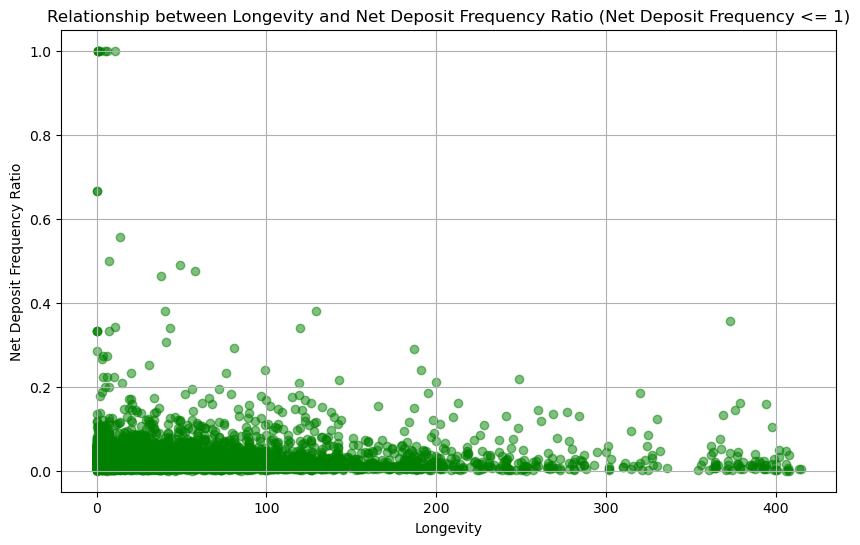

In [47]:
# Filtering data
filtered_data = dataset[dataset['net_deposit_frequency_ratio'] <= 1]

# Extracting filtered data
longevity = filtered_data['longevity']
net_deposit_frequency_ratio = filtered_data['net_deposit_frequency_ratio']

# Creating the plot
plt.figure(figsize=(10, 6))
plt.scatter(longevity, net_deposit_frequency_ratio, color='green', alpha=0.5)
plt.title('Relationship between Longevity and Net Deposit Frequency Ratio (Net Deposit Frequency <= 1)')
plt.xlabel('Longevity')
plt.ylabel('Net Deposit Frequency Ratio')
plt.grid(True)
plt.show()


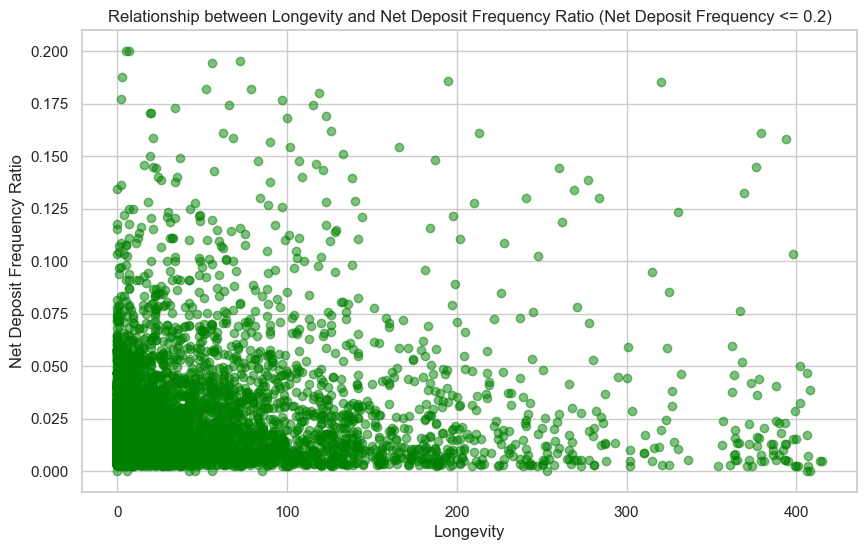

In [176]:
# Filtering data
filtered_data = dataset[dataset['net_deposit_frequency_ratio'] <= 0.2]

# Extracting filtered data
longevity = filtered_data['longevity']
net_deposit_frequency_ratio = filtered_data['net_deposit_frequency_ratio']

# Creating the plot
plt.figure(figsize=(10, 6))
plt.scatter(longevity, net_deposit_frequency_ratio, color='green', alpha=0.5)
plt.title('Relationship between Longevity and Net Deposit Frequency Ratio (Net Deposit Frequency <= 0.2)')
plt.xlabel('Longevity')
plt.ylabel('Net Deposit Frequency Ratio')
plt.grid(True)
plt.show()


/var/folders/s5/yjzt_0752f3_4zc69pnv4j700000gn/T/ipykernel_54210/4055757874.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['Net_Deposit_Frequency_Ratio_Bin'] = pd.cut(dataset['net_deposit_frequency_ratio'], bins=bins, labels=False, right=False)


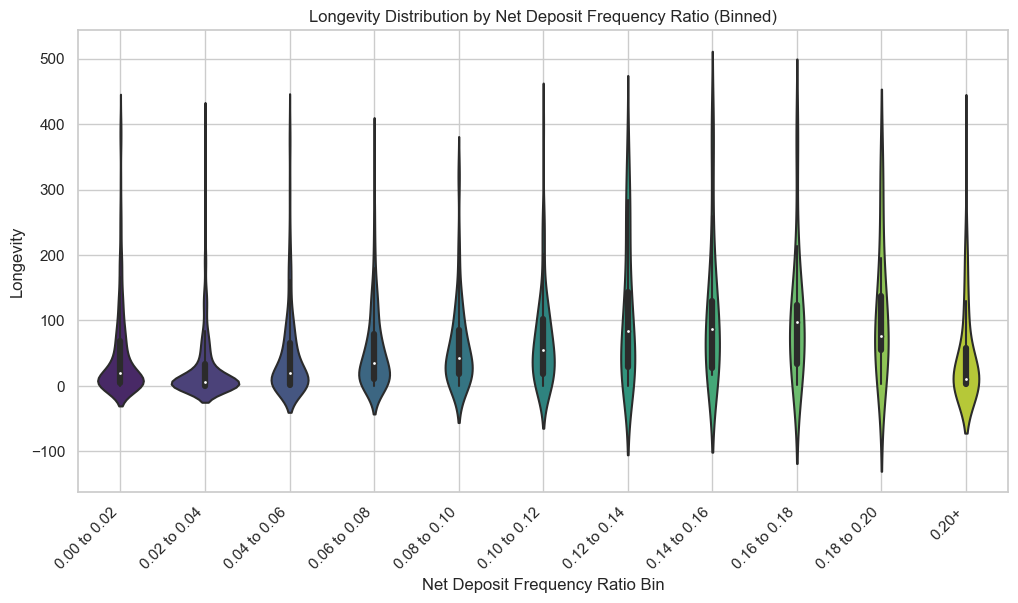

In [175]:
import seaborn as sns

# Define the bins
bins = [0, 0.02, 0.04, 0.06, 0.08, 0.1, 0.12, 0.14, 0.16, 0.18, 0.2, np.inf]

# Define custom bin labels
bin_labels = [f'{bins[i]:.2f} to {bins[i+1]:.2f}' if i < len(bins) - 2 else f'{bins[i]:.2f}+' for i in range(len(bins) - 1)]

# Bin the net_deposit_frequency_ratio
dataset['Net_Deposit_Frequency_Ratio_Bin'] = pd.cut(dataset['net_deposit_frequency_ratio'], bins=bins, labels=False, right=False)

# Create the violin plot
plt.figure(figsize=(12, 6))
sns.violinplot(x='Net_Deposit_Frequency_Ratio_Bin', y='longevity', data=dataset, palette='viridis')
plt.title('Longevity Distribution by Net Deposit Frequency Ratio (Binned)')
plt.xlabel('Net Deposit Frequency Ratio Bin')
plt.ylabel('Longevity')
plt.xticks(ticks=range(len(bin_labels)), labels=bin_labels, rotation=45, ha='right')
plt.grid(True)
plt.show()


## 2.8 Longevity vs TP/SL ratio

In [122]:
tpsl_dataset = dataset[['TP/SL Hit Ratio', 'longevity']]
tpsl_dataset

TP/SL Hit Ratio  longevity
0            3.375000        142
1            0.087081        107
2            0.000000         13
3            0.000000          9
4            0.002283        372
...               ...        ...
5720         0.000000        381
5721         6.823529        100
5722         2.760870         46
5723        53.785714        253
5724         0.043292         85

[5724 rows x 2 columns]

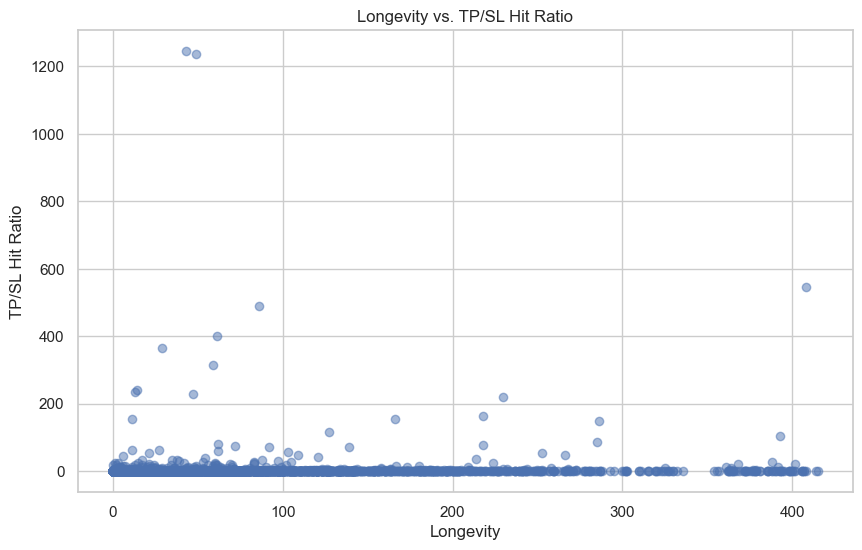

In [124]:
# Scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(tpsl_dataset['longevity'], tpsl_dataset['TP/SL Hit Ratio'], alpha=0.5)
plt.title('Longevity vs. TP/SL Hit Ratio')
plt.xlabel('Longevity')
plt.ylabel('TP/SL Hit Ratio')
plt.grid(True)
plt.show()

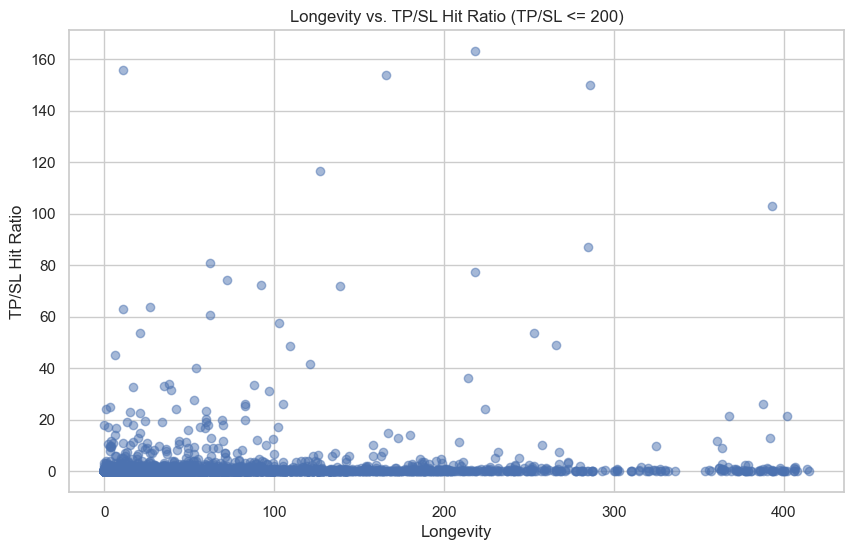

In [125]:
# Filter the dataset to remove TP/SL Hit Ratio values over 200
filtered_tpsl_dataset = tpsl_dataset[tpsl_dataset['TP/SL Hit Ratio'] <= 200]

# Scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(filtered_tpsl_dataset['longevity'], filtered_tpsl_dataset['TP/SL Hit Ratio'], alpha=0.5)
plt.title('Longevity vs. TP/SL Hit Ratio (TP/SL <= 200)')
plt.xlabel('Longevity')
plt.ylabel('TP/SL Hit Ratio')
plt.grid(True)
plt.show()


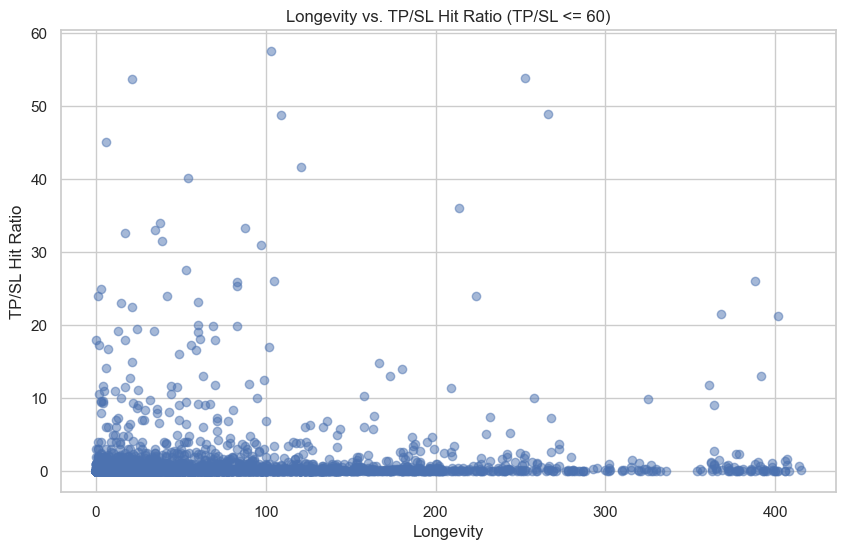

In [135]:
# Filter the dataset to remove TP/SL Hit Ratio values over 200
filtered_tpsl_dataset = tpsl_dataset[tpsl_dataset['TP/SL Hit Ratio'] <= 60]

# Scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(filtered_tpsl_dataset['longevity'], filtered_tpsl_dataset['TP/SL Hit Ratio'], alpha=0.5)
plt.title('Longevity vs. TP/SL Hit Ratio (TP/SL <= 60)')
plt.xlabel('Longevity')
plt.ylabel('TP/SL Hit Ratio')
plt.grid(True)
plt.show()


/var/folders/s5/yjzt_0752f3_4zc69pnv4j700000gn/T/ipykernel_54210/976494168.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tpsl_dataset['TPSL_Bin'] = pd.cut(tpsl_dataset['TP/SL Hit Ratio'], bins=bin_edges, labels=False)


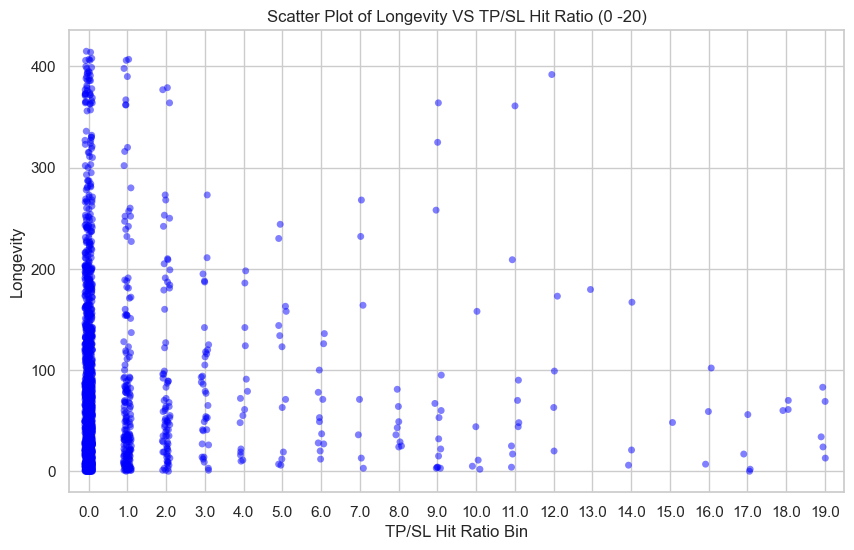

In [210]:
# Define the bin edges for TP/SL Hit Ratio
bin_edges = range(0, 21)  # 20 bins from 0 to 20 inclusive

# Bin the TP/SL Hit Ratio data
tpsl_dataset['TPSL_Bin'] = pd.cut(tpsl_dataset['TP/SL Hit Ratio'], bins=bin_edges, labels=False)

# Create the scatter plot with jitter
plt.figure(figsize=(10, 6))
sns.stripplot(x='TPSL_Bin', y='longevity', data=tpsl_dataset, jitter=True, color='blue', alpha=0.5)
plt.title('Scatter Plot of Longevity VS TP/SL Hit Ratio (0 -20)')
plt.xlabel('TP/SL Hit Ratio Bin')
plt.ylabel('Longevity')
plt.grid(True)
plt.show()

/var/folders/s5/yjzt_0752f3_4zc69pnv4j700000gn/T/ipykernel_54210/606916741.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tpsl_dataset['TPSL_Bin'] = pd.cut(tpsl_dataset['TP/SL Hit Ratio'], bins=bins, labels=labels, right=False)


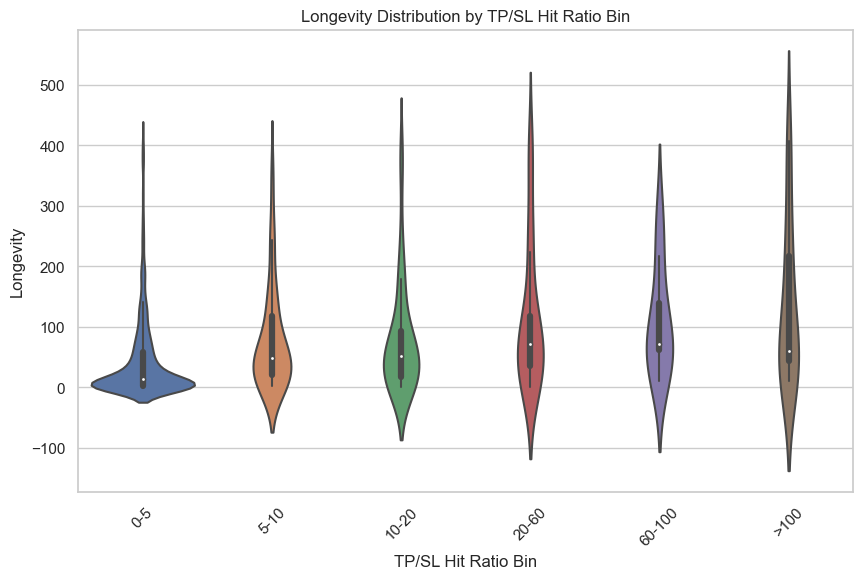

In [136]:
import numpy as np

# Define the bins
bins = [0, 5, 10, 20, 60, 100, np.inf]

# Define the bin labels
labels = ['0-5', '5-10', '10-20', '20-60', '60-100', '>100']

# Bin the TP/SL Hit Ratio
tpsl_dataset['TPSL_Bin'] = pd.cut(tpsl_dataset['TP/SL Hit Ratio'], bins=bins, labels=labels, right=False)

# Create the violin plot
plt.figure(figsize=(10, 6))
sns.violinplot(x='TPSL_Bin', y='longevity', data=tpsl_dataset)
plt.title('Longevity Distribution by TP/SL Hit Ratio Bin')
plt.xlabel('TP/SL Hit Ratio Bin')
plt.ylabel('Longevity')
plt.xticks(rotation=45)
plt.show()


## 2.9 Longevity vs DPM

In [140]:
dpm_dataset = dataset[['longevity','Average_DPM']]
dpm_dataset

longevity  Average_DPM
0           142    -3.415139
1           107  -264.410462
2            13 -3403.656636
3             9    17.604088
4           372   -45.416080
...         ...          ...
5720        381   -24.464597
5721        100  -298.590702
5722         46   -70.501778
5723        253   140.220508
5724         85   -48.437138

[5724 rows x 2 columns]

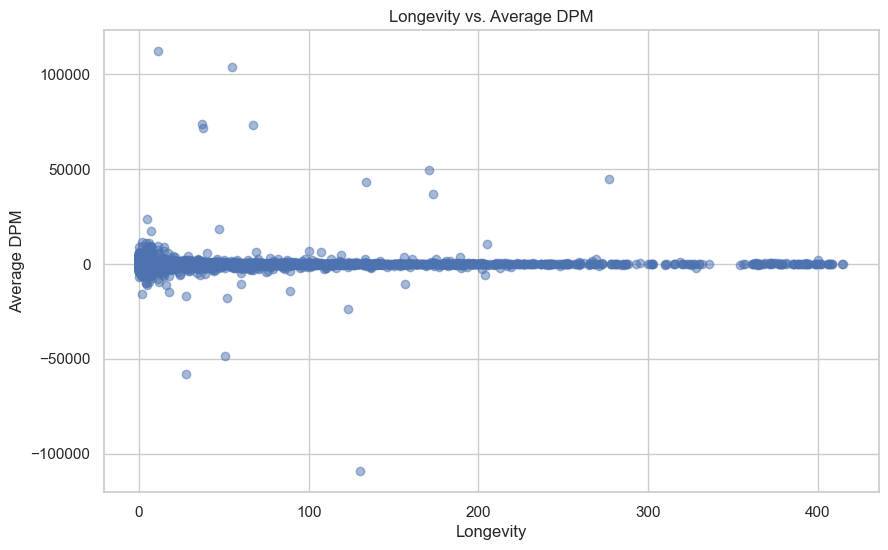

In [141]:
plt.figure(figsize=(10, 6))
plt.scatter(dpm_dataset['longevity'], dpm_dataset['Average_DPM'], alpha=0.5)
plt.title('Longevity vs. Average DPM')
plt.xlabel('Longevity')
plt.ylabel('Average DPM')
plt.grid(True)
plt.show()

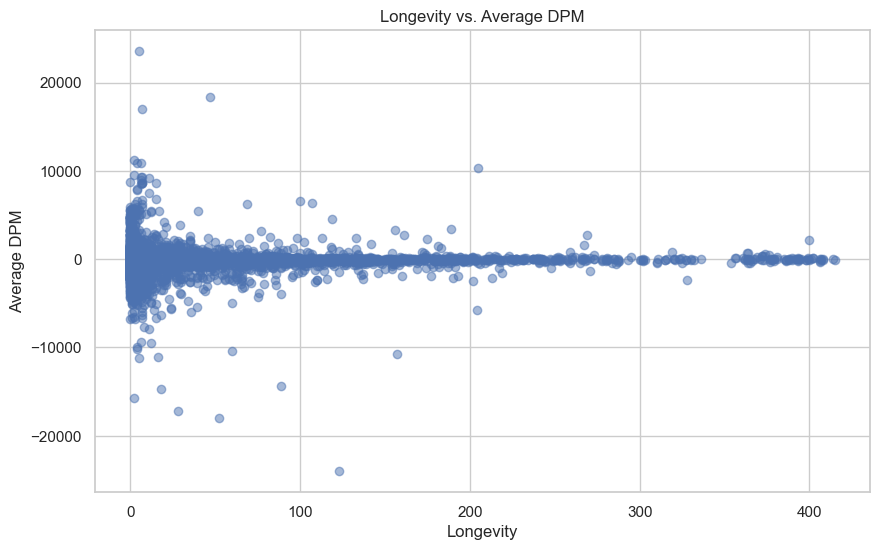

In [142]:
# Filter the dataset to remove Average DPM values below -30,000 and above 30,000
filtered_dpm_dataset = dpm_dataset[(dpm_dataset['Average_DPM'] >= -30000) & (dpm_dataset['Average_DPM'] <= 30000)]

# Scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(filtered_dpm_dataset['longevity'], filtered_dpm_dataset['Average_DPM'], alpha=0.5)
plt.title('Longevity vs. Average DPM')
plt.xlabel('Longevity')
plt.ylabel('Average DPM')
plt.grid(True)
plt.show()


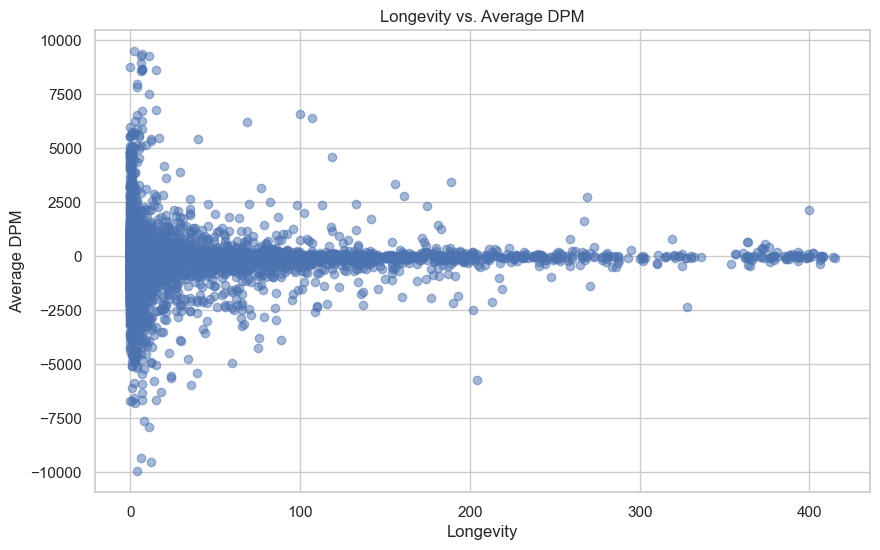

In [144]:
# Filter the dataset to remove Average DPM values below -10,000 and above 10,000
ten_filtered_dpm_dataset = dpm_dataset[(dpm_dataset['Average_DPM'] >= -10000) & (dpm_dataset['Average_DPM'] <= 10000)]

# Scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(ten_filtered_dpm_dataset['longevity'], ten_filtered_dpm_dataset['Average_DPM'], alpha=0.5)
plt.title('Longevity vs. Average DPM')
plt.xlabel('Longevity')
plt.ylabel('Average DPM')
plt.grid(True)
plt.show()


/var/folders/s5/yjzt_0752f3_4zc69pnv4j700000gn/T/ipykernel_54210/1273971660.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dpm_dataset['DPM_Bin'] = pd.cut(dpm_dataset['Average_DPM'], bins=bins, labels=labels)


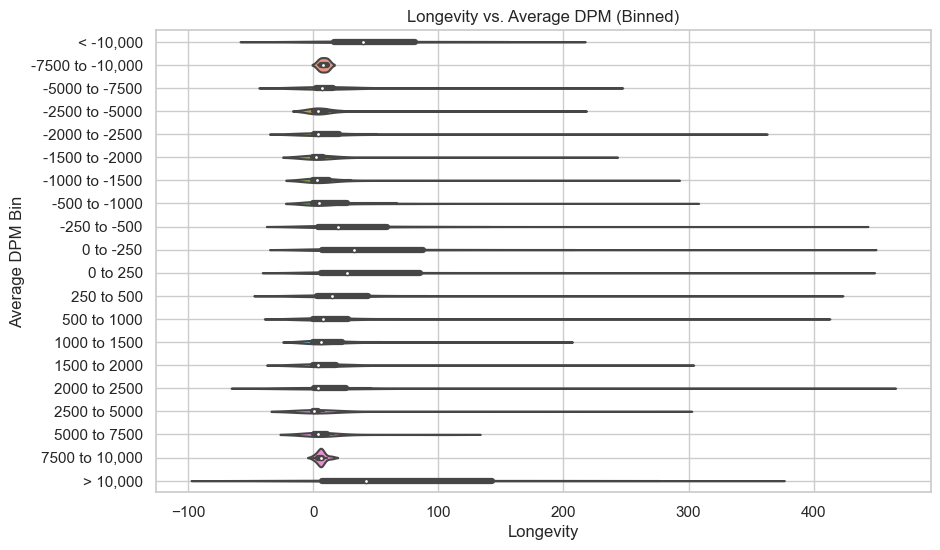

In [160]:
# Define the bins and labels
bins = [-np.inf, -10000, -7500, -5000, -2500, -2000, -1500, -1000, -500, -250, 0, 250, 500, 1000, 1500, 2000, 2500, 5000, 7500, 10000, np.inf]
labels = ['< -10,000', '-7500 to -10,000', '-5000 to -7500', '-2500 to -5000', '-2000 to -2500', '-1500 to -2000', '-1000 to -1500', '-500 to -1000', '-250 to -500', '0 to -250','0 to 250', '250 to 500', '500 to 1000', '1000 to 1500', '1500 to 2000', '2000 to 2500', '2500 to 5000', '5000 to 7500', '7500 to 10,000', '> 10,000']

# Bin the Average DPM values
dpm_dataset['DPM_Bin'] = pd.cut(dpm_dataset['Average_DPM'], bins=bins, labels=labels)

# Create the violin plot
plt.figure(figsize=(10, 6))
sns.violinplot(x='longevity', y='DPM_Bin', data=dpm_dataset)
plt.title('Longevity vs. Average DPM (Binned)')
plt.xlabel('Longevity')
plt.ylabel('Average DPM Bin')
plt.grid(True)
plt.show()


/var/folders/s5/yjzt_0752f3_4zc69pnv4j700000gn/T/ipykernel_54210/1447612199.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dpm_dataset['DPM_Bin'] = pd.cut(dpm_dataset['Average_DPM'], bins=bins, labels=labels)


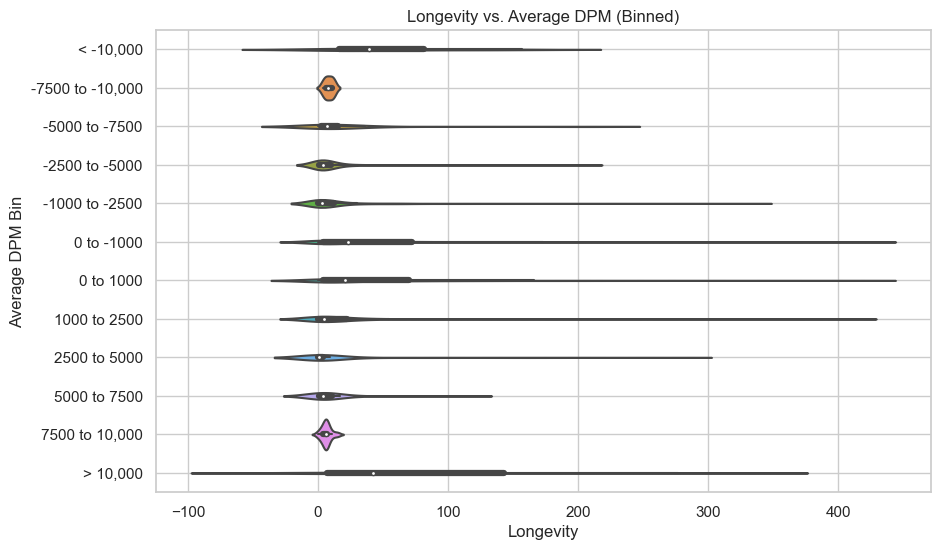

In [161]:
# Define the bins and labels
bins = [-np.inf, -10000, -7500, -5000, -2500, -1000, 0, 1000, 2500, 5000, 7500, 10000, np.inf]
labels = ['< -10,000', '-7500 to -10,000', '-5000 to -7500', '-2500 to -5000', '-1000 to -2500', '0 to -1000', '0 to 1000', '1000 to 2500', '2500 to 5000', '5000 to 7500', '7500 to 10,000', '> 10,000']

# Bin the Average DPM values
dpm_dataset['DPM_Bin'] = pd.cut(dpm_dataset['Average_DPM'], bins=bins, labels=labels)

# Create the violin plot
plt.figure(figsize=(10, 6))
sns.violinplot(x='longevity', y='DPM_Bin', data=dpm_dataset)
plt.title('Longevity vs. Average DPM (Binned)')
plt.xlabel('Longevity')
plt.ylabel('Average DPM Bin')
plt.grid(True)
plt.show()


/var/folders/s5/yjzt_0752f3_4zc69pnv4j700000gn/T/ipykernel_54210/1529106790.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dpm_dataset['DPM_Bin'] = pd.cut(dpm_dataset['Average_DPM'], bins=bins, labels=labels)


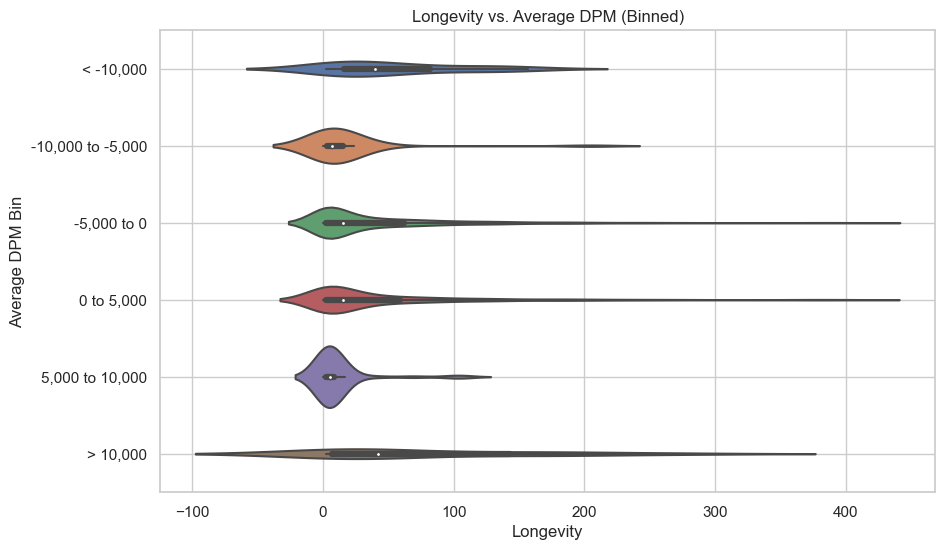

In [162]:
# Define the bins and labels
bins = [-np.inf, -10000, -5000, 0, 5000, 10000, np.inf]
labels = ['< -10,000', '-10,000 to -5,000', '-5,000 to 0', '0 to 5,000', '5,000 to 10,000', '> 10,000']

# Bin the Average DPM values
dpm_dataset['DPM_Bin'] = pd.cut(dpm_dataset['Average_DPM'], bins=bins, labels=labels)

# Create the violin plot
plt.figure(figsize=(10, 6))
sns.violinplot(x='longevity', y='DPM_Bin', data=dpm_dataset)
plt.title('Longevity vs. Average DPM (Binned)')
plt.xlabel('Longevity')
plt.ylabel('Average DPM Bin')
plt.grid(True)
plt.show()


## 2.10 Longevity vs Ratio of profitable trade

In [165]:
profit_ratio_dataset = dataset[['longevity','Ratio_Profitable_Trades']]
profit_ratio_dataset

longevity  Ratio_Profitable_Trades
0           142                 0.762931
1           107                 0.718323
2            13                 0.463768
3             9                 0.517647
4           372                 0.311983
...         ...                      ...
5720        381                 0.796296
5721        100                 0.658371
5722         46                 0.626305
5723        253                 0.882083
5724         85                 0.684606

[5724 rows x 2 columns]

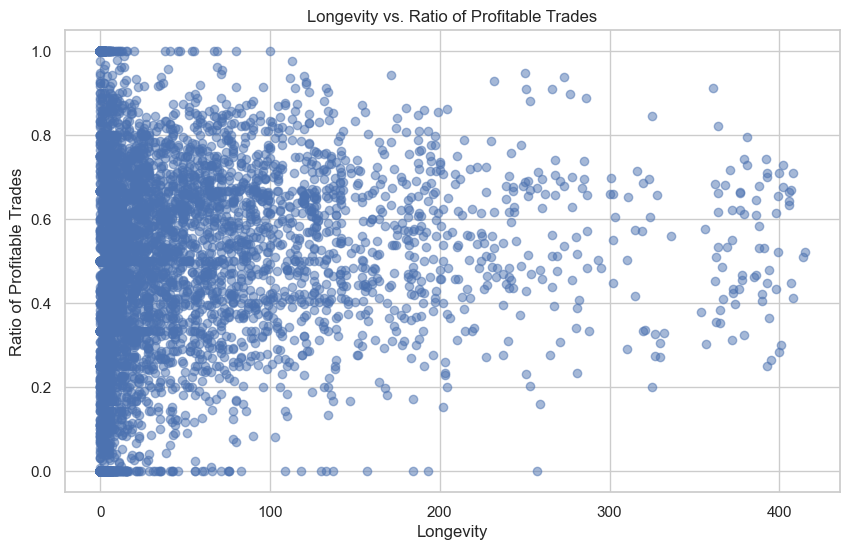

In [166]:
# Scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(profit_ratio_dataset['longevity'], profit_ratio_dataset['Ratio_Profitable_Trades'], alpha=0.5)
plt.title('Longevity vs. Ratio of Profitable Trades')
plt.xlabel('Longevity')
plt.ylabel('Ratio of Profitable Trades')
plt.grid(True)
plt.show()

/var/folders/s5/yjzt_0752f3_4zc69pnv4j700000gn/T/ipykernel_54210/1310311231.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  profit_ratio_dataset['Ratio_Profitable_Trades_Bin'] = pd.cut(profit_ratio_dataset['Ratio_Profitable_Trades'], bins=bin_edges, labels=bin_labels)


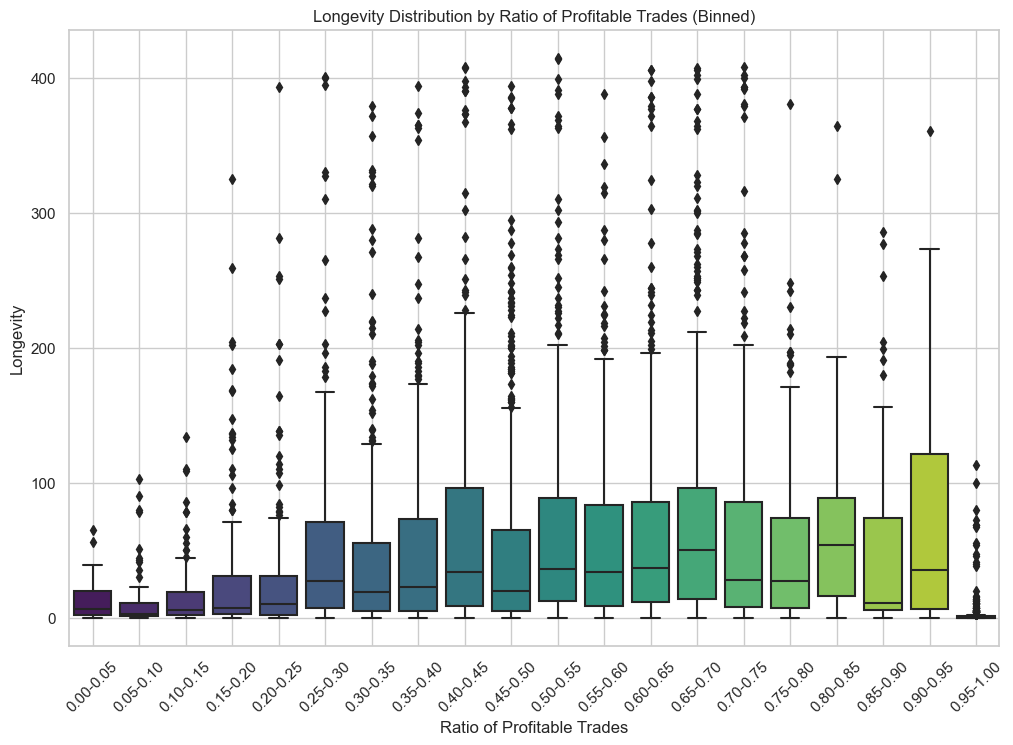

In [212]:
import seaborn as sns

# Define the number of bins
num_bins = 20

# Calculate bin edges
bin_edges = [i / num_bins for i in range(num_bins + 1)]

# Create bin labels
bin_labels = [f'{bin_edges[i]:.2f}-{bin_edges[i+1]:.2f}' for i in range(num_bins)]

# Bin the data
profit_ratio_dataset['Ratio_Profitable_Trades_Bin'] = pd.cut(profit_ratio_dataset['Ratio_Profitable_Trades'], bins=bin_edges, labels=bin_labels)

# Create the box plot
plt.figure(figsize=(12, 8))
sns.boxplot(x='Ratio_Profitable_Trades_Bin', y='longevity', data=profit_ratio_dataset, palette='viridis')
plt.title('Longevity Distribution by Ratio of Profitable Trades (Binned)')
plt.xlabel('Ratio of Profitable Trades')
plt.ylabel('Longevity')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


/var/folders/s5/yjzt_0752f3_4zc69pnv4j700000gn/T/ipykernel_54210/2453960983.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  profit_ratio_dataset['Ratio_Profitable_Trades_Bin'] = pd.cut(profit_ratio_dataset['Ratio_Profitable_Trades'], bins=bin_edges, labels=bin_labels)


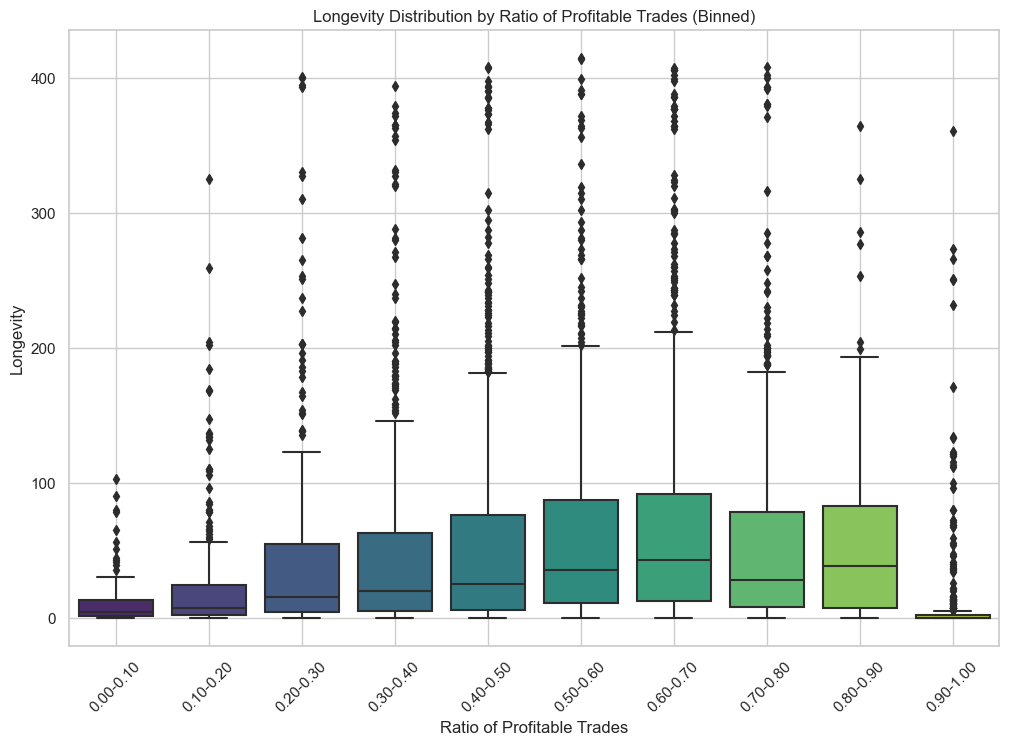

In [213]:
# Define the number of bins
num_bins = 10

# Calculate bin edges
bin_edges = [i / num_bins for i in range(num_bins + 1)]

# Create bin labels
bin_labels = [f'{bin_edges[i]:.2f}-{bin_edges[i+1]:.2f}' for i in range(num_bins)]

# Bin the data
profit_ratio_dataset['Ratio_Profitable_Trades_Bin'] = pd.cut(profit_ratio_dataset['Ratio_Profitable_Trades'], bins=bin_edges, labels=bin_labels)

# Create the box plot
plt.figure(figsize=(12, 8))
sns.boxplot(x='Ratio_Profitable_Trades_Bin', y='longevity', data=profit_ratio_dataset, palette='viridis')
plt.title('Longevity Distribution by Ratio of Profitable Trades (Binned)')
plt.xlabel('Ratio of Profitable Trades')
plt.ylabel('Longevity')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

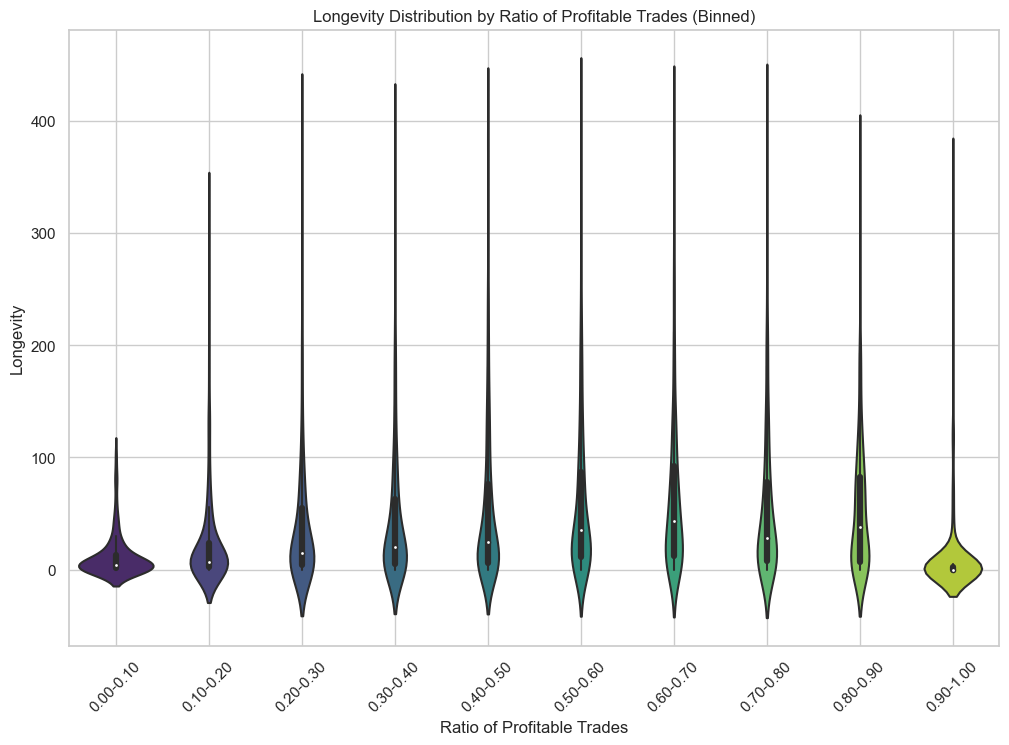

In [215]:
# Create the violin plot
plt.figure(figsize=(12, 8))
sns.violinplot(x='Ratio_Profitable_Trades_Bin', y='longevity', data=profit_ratio_dataset, palette='viridis')
plt.title('Longevity Distribution by Ratio of Profitable Trades (Binned)')
plt.xlabel('Ratio of Profitable Trades')
plt.ylabel('Longevity')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


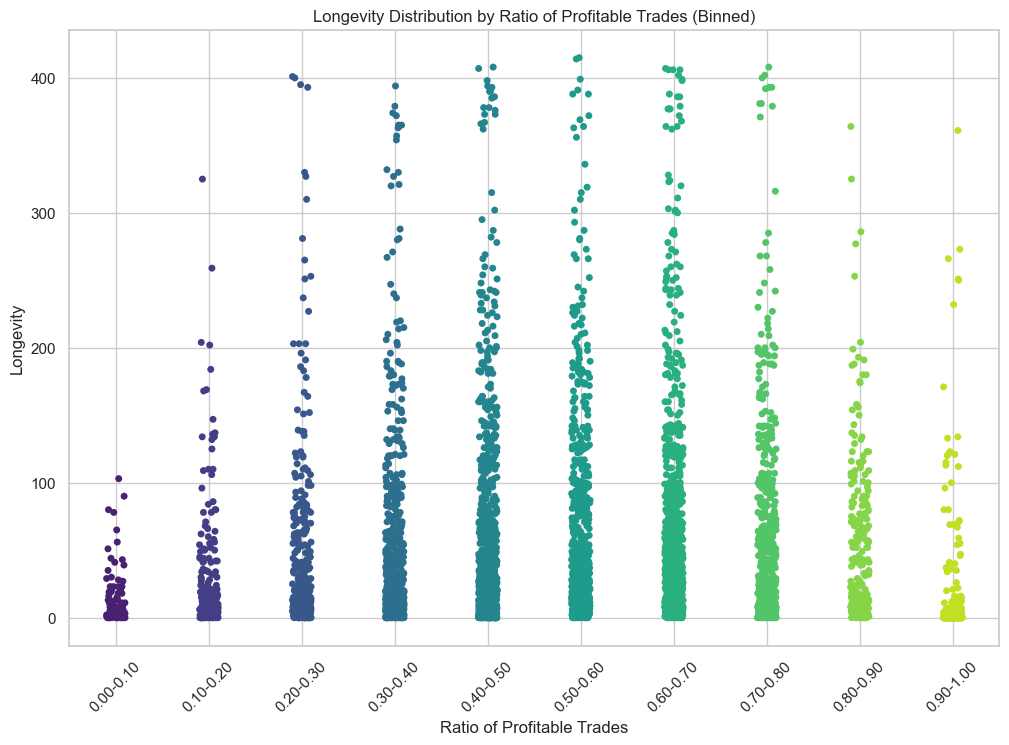

In [216]:
# Create the strip plot with jitter
plt.figure(figsize=(12, 8))
sns.stripplot(x='Ratio_Profitable_Trades_Bin', y='longevity', data=profit_ratio_dataset, jitter=True, palette='viridis')
plt.title('Longevity Distribution by Ratio of Profitable Trades (Binned)')
plt.xlabel('Ratio of Profitable Trades')
plt.ylabel('Longevity')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


## 2.11 Longevity vs Trading Frequency

In [184]:
trading_freq_dataset = dataset[['longevity', 'Trading_Frequency']]

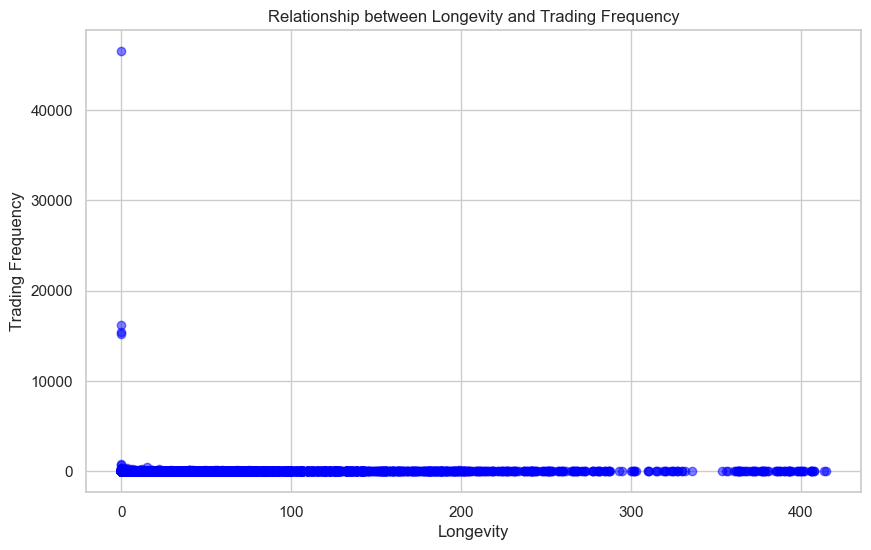

In [186]:
# Creating the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(trading_freq_dataset['longevity'], trading_freq_dataset['Trading_Frequency'], color='blue', alpha=0.5)
plt.title('Relationship between Longevity and Trading Frequency')
plt.xlabel('Longevity')
plt.ylabel('Trading Frequency')
plt.grid(True)
plt.show()


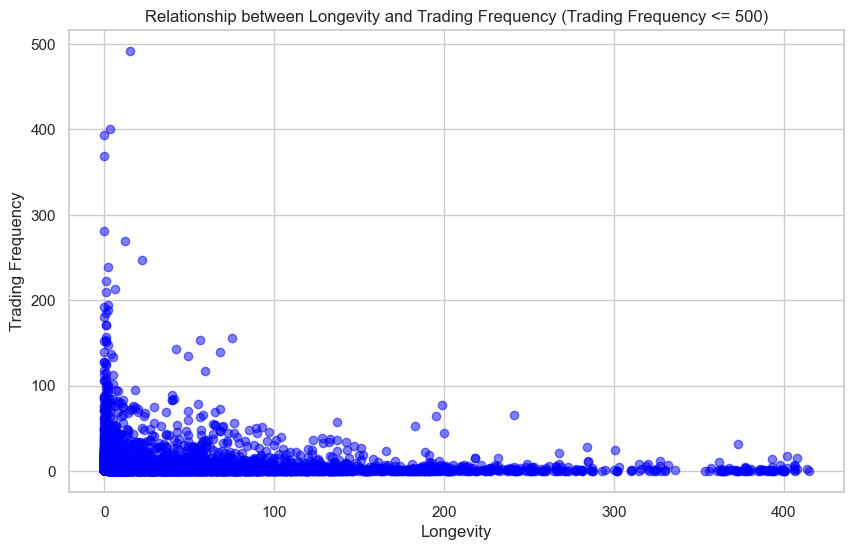

In [188]:
# Filtering out trading frequencies above 1000
filtered_trading_freq_dataset = trading_freq_dataset[trading_freq_dataset['Trading_Frequency'] <= 500]

# Creating the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(filtered_trading_freq_dataset['longevity'], filtered_trading_freq_dataset['Trading_Frequency'], color='blue', alpha=0.5)
plt.title('Relationship between Longevity and Trading Frequency (Trading Frequency <= 500)')
plt.xlabel('Longevity')
plt.ylabel('Trading Frequency')
plt.grid(True)
plt.show()


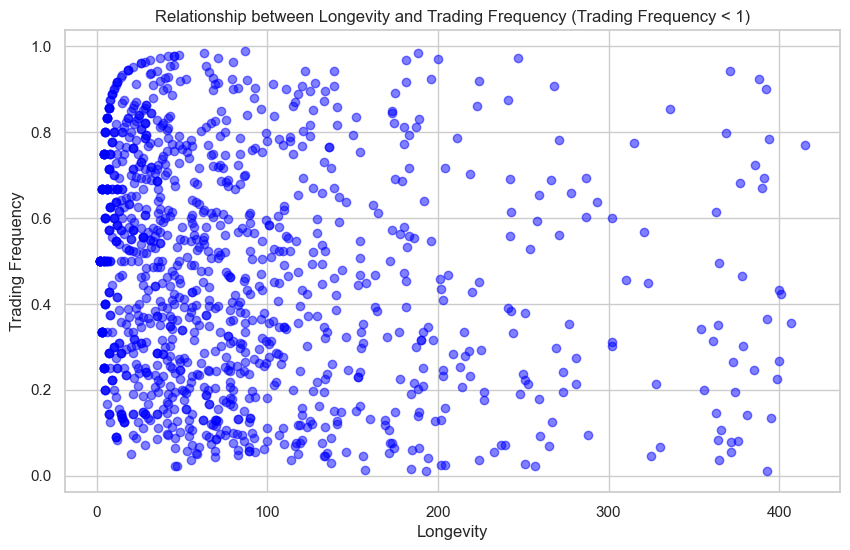

In [203]:
# Filtering out trading frequencies above 1
filtered_trading_freq_dataset = trading_freq_dataset[trading_freq_dataset['Trading_Frequency'] < 1]

# Creating the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(filtered_trading_freq_dataset['longevity'], filtered_trading_freq_dataset['Trading_Frequency'], color='blue', alpha=0.5)
plt.title('Relationship between Longevity and Trading Frequency (Trading Frequency < 1)')
plt.xlabel('Longevity')
plt.ylabel('Trading Frequency')
plt.grid(True)
plt.show()


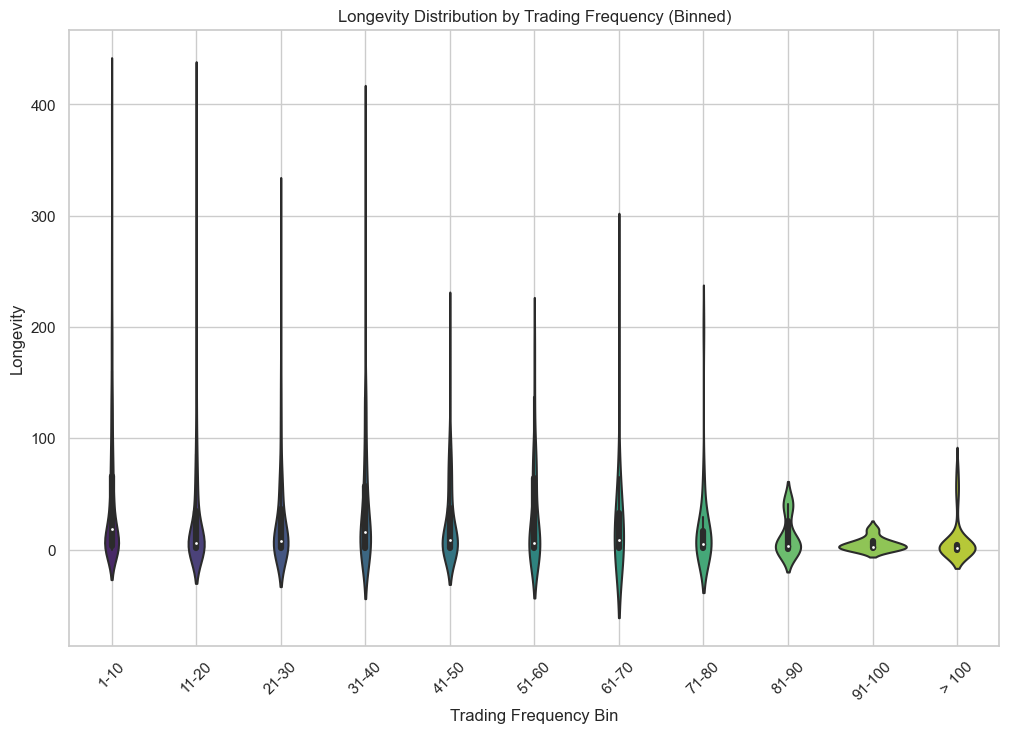

In [190]:
# Define the bin ranges
bin_ranges = ['1-10', '11-20', '21-30', '31-40', '41-50', '51-60', '61-70', '71-80', '81-90', '91-100', '> 100']

# Create the violin plot
plt.figure(figsize=(12, 8))
sns.violinplot(x='Trading_Frequency_Bin', y='longevity', data=trading_freq_dataset, palette='viridis')
plt.title('Longevity Distribution by Trading Frequency (Binned)')
plt.xlabel('Trading Frequency Bin')
plt.ylabel('Longevity')
plt.xticks(ticks=range(11), labels=bin_ranges, rotation=45)
plt.grid(True)
plt.show()


ValueError: The number of FixedLocator locations (11), usually from a call to set_ticks, does not match the number of ticklabels (15).

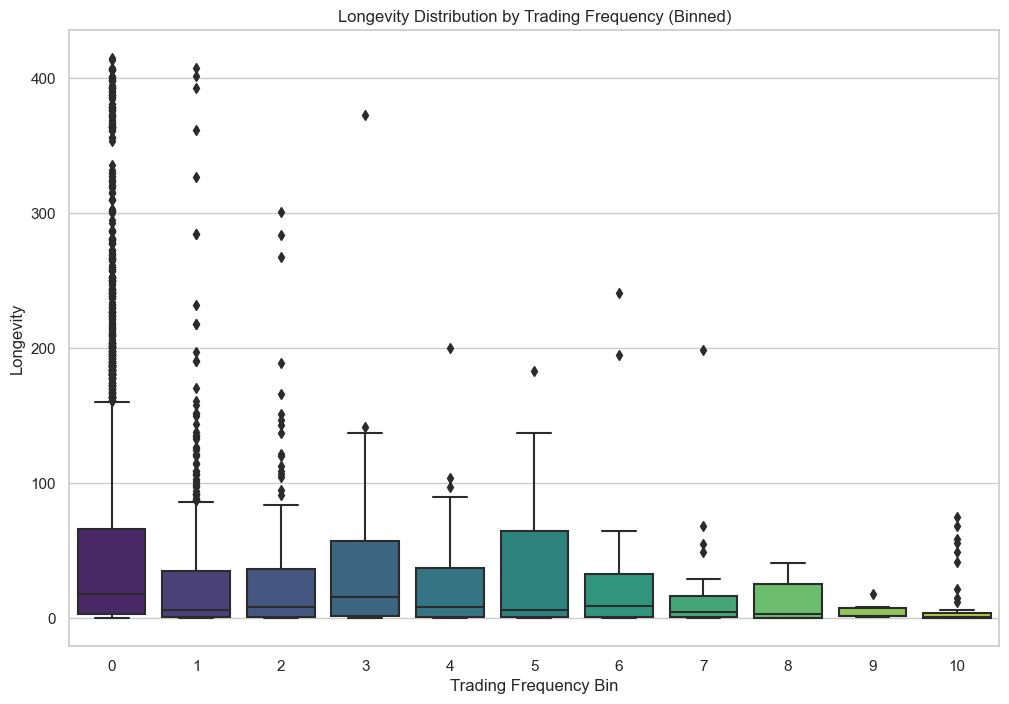

In [204]:
# Create the box plot
plt.figure(figsize=(12, 8))
sns.boxplot(x='Trading_Frequency_Bin', y='longevity', data=trading_freq_dataset, palette='viridis')
plt.title('Longevity Distribution by Trading Frequency (Binned)')
plt.xlabel('Trading Frequency Bin')
plt.ylabel('Longevity')
plt.xticks(ticks=range(11), labels=bin_ranges, rotation=45)
plt.grid(True)
plt.show()


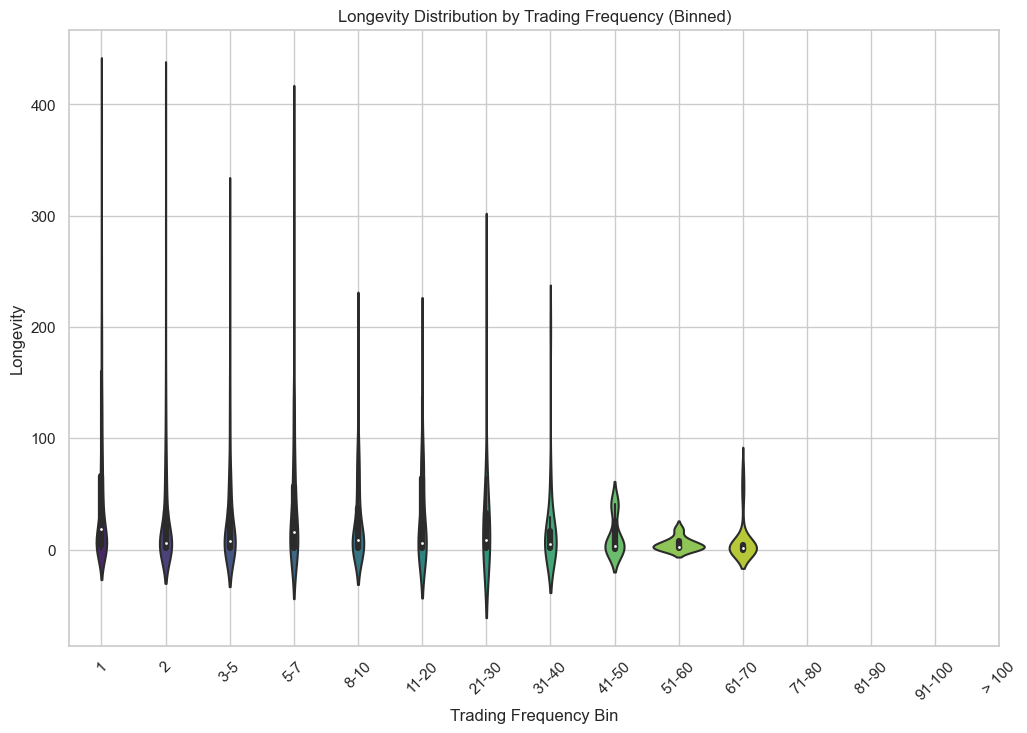

In [200]:
# Define the bin ranges with additional bins
bin_ranges = ['1', '2', '3-5', '5-7', '8-10', '11-20', '21-30', '31-40', '41-50', '51-60', '61-70', '71-80', '81-90', '91-100', '> 100']

# Create the violin plot with additional bins
plt.figure(figsize=(12, 8))
sns.violinplot(x='Trading_Frequency_Bin', y='longevity', data=trading_freq_dataset, palette='viridis')
plt.title('Longevity Distribution by Trading Frequency (Binned)')
plt.xlabel('Trading Frequency Bin')
plt.ylabel('Longevity')
plt.xticks(ticks=range(len(bin_ranges)), labels=bin_ranges, rotation=45)
plt.grid(True)
plt.show()


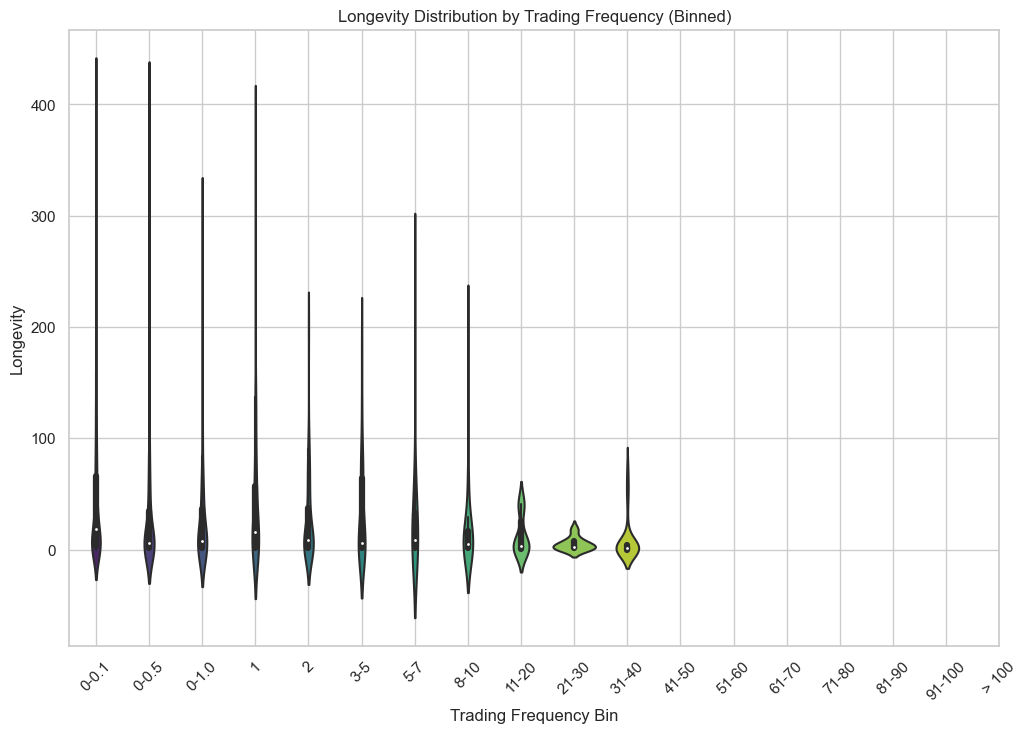

In [198]:
# Define the bin ranges with additional bins
bin_ranges = ['0-0.1', '0.1-0.5', '0.5-1.0', '1', '2', '3-5', '5-7', '8-10', '11-20', '21-30', '31-40', '41-50', '51-60', '61-70', '71-80', '81-90', '91-100', '> 100']

# Create the violin plot with additional bins
plt.figure(figsize=(12, 8))
sns.violinplot(x='Trading_Frequency_Bin', y='longevity', data=trading_freq_dataset, palette='viridis')
plt.title('Longevity Distribution by Trading Frequency (Binned)')
plt.xlabel('Trading Frequency Bin')
plt.ylabel('Longevity')
plt.xticks(ticks=range(len(bin_ranges)), labels=bin_ranges, rotation=45)
plt.grid(True)
plt.show()


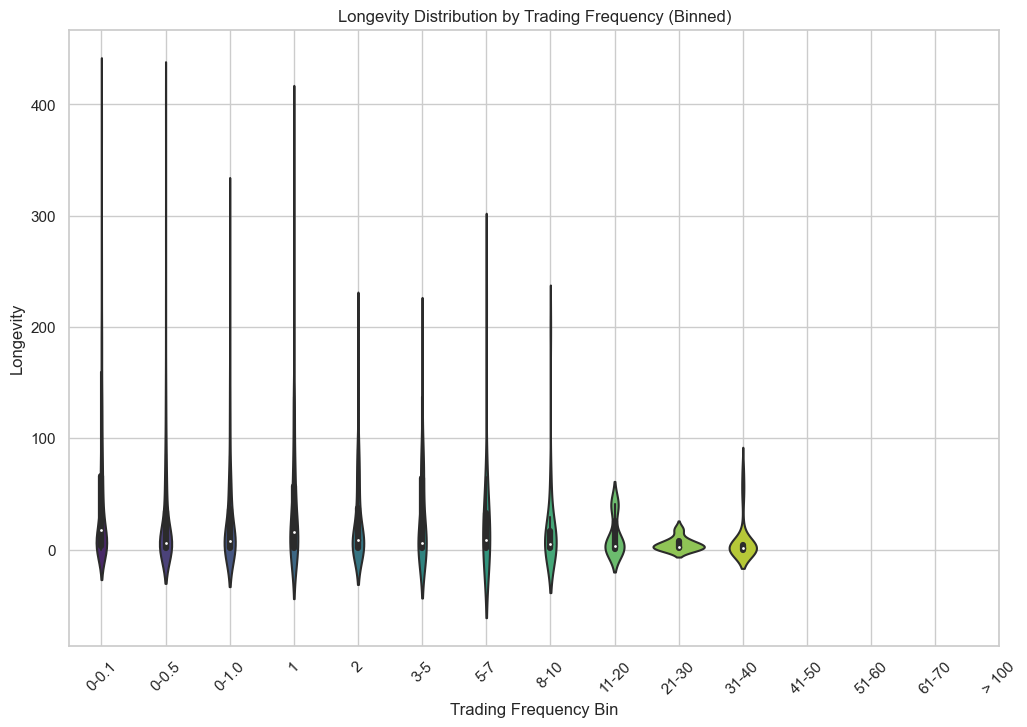

In [202]:
# Define the bin ranges with additional bins
bin_ranges = ['0-0.1', '0-0.5', '0-1.0', '1', '2', '3-5', '5-7', '8-10', '11-20', '21-30', '31-40', '41-50', '51-60', '61-70', '> 100']

# Create the violin plot with additional bins
plt.figure(figsize=(12, 8))
sns.violinplot(x='Trading_Frequency_Bin', y='longevity', data=trading_freq_dataset, palette='viridis')
plt.title('Longevity Distribution by Trading Frequency (Binned)')
plt.xlabel('Trading Frequency Bin')
plt.ylabel('Longevity')
plt.xticks(ticks=range(len(bin_ranges)), labels=bin_ranges, rotation=45)
plt.grid(True)
plt.show()


/var/folders/s5/yjzt_0752f3_4zc69pnv4j700000gn/T/ipykernel_54210/1889061408.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trading_freq_dataset['Trading_Frequency_Bin'] = pd.cut(trading_freq_dataset['Trading_Frequency'], bins=bin_edges, labels=False)


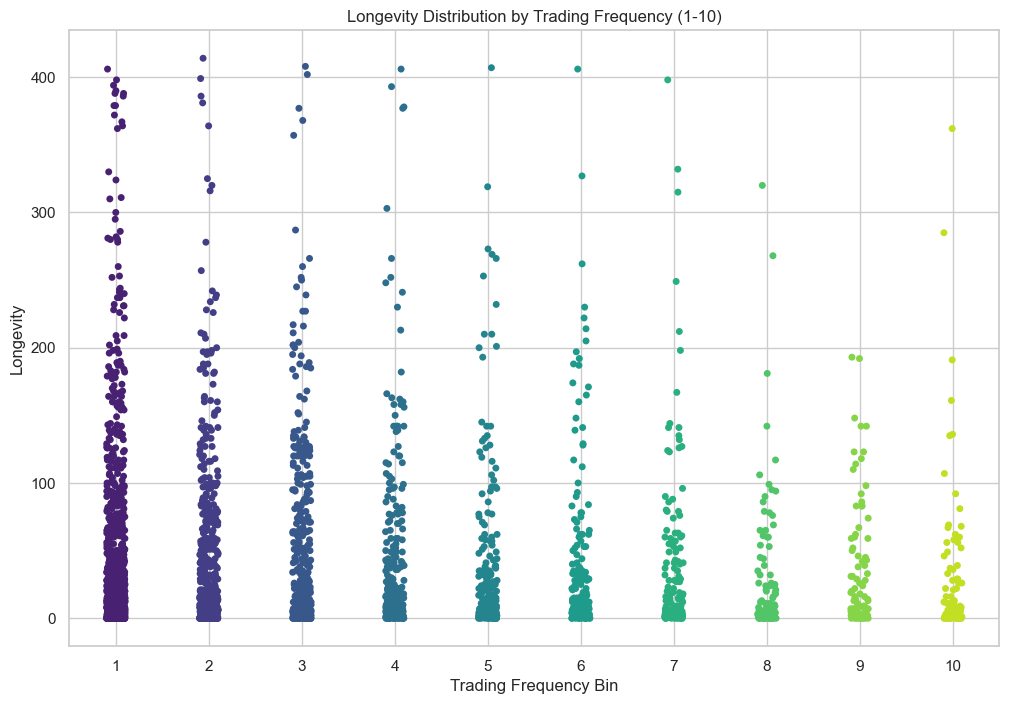

In [207]:
# Define the bin edges
bin_edges = range(1, 12)  # 10 bins from 1 to 10 inclusive

# Bin the trading frequency data
trading_freq_dataset['Trading_Frequency_Bin'] = pd.cut(trading_freq_dataset['Trading_Frequency'], bins=bin_edges, labels=False)

# Create the strip plot
plt.figure(figsize=(12, 8))
sns.stripplot(x='Trading_Frequency_Bin', y='longevity', data=trading_freq_dataset, jitter=True, palette='viridis')
plt.title('Longevity Distribution by Trading Frequency (1-10)')
plt.xlabel('Trading Frequency Bin')
plt.ylabel('Longevity')
plt.xticks(ticks=range(10), labels=range(1, 11))  # Adjust x-axis ticks to represent bins
plt.grid(True)
plt.show()

# 3 Primary analysis on merge dataset

## 3.1 Dataset_trades_USD_active

### 3.1.0 EDA on dataset_trades_USD_active

In [ ]:
dataset_trades_USD_active = dataset_trades_USD_active.reset_index()
dataset_trades_USD_active.head()

index   login  country account_currency  Trading_Frequency  Buy_Percentage  \
0      0  524978  Austria              EUR           9.802817        0.474856   
1      1  524978  Austria              EUR           9.802817        0.474856   
2      2  524978  Austria              EUR           9.802817        0.474856   
3      3  524978  Austria              EUR           9.802817        0.474856   
4      4  524978  Austria              EUR           9.802817        0.474856   

   Average_Volume  Average_Volume_USD  Average_DPM  Unique_Symbols_Traded  \
0        1.230632        4.044965e+08    -3.415139                     30   
1        1.230632        4.044965e+08    -3.415139                     30   
2        1.230632        4.044965e+08    -3.415139                     30   
3        1.230632        4.044965e+08    -3.415139                     30   
4        1.230632        4.044965e+08    -3.415139                     30   

   Peak_Trading_Times  Ratio_Profitable_Trades  Profit_Loss_Variability  \
0                  17                 0.762931               316.119097   
1                  17                 0.762931               316.119097   
2                  17                 0.762931               316.119097   
3                  17                 0.762931               316.119097   
4                  17                 0.762931               316.119097   

   Average_Trade_Duration  TP/SL Hit Ratio  Reward_Risk_Ratio  \
0            36404.811782            3.375           0.086763   
1            36404.811782            3.375           0.086763   
2            36404.811782            3.375           0.086763   
3            36404.811782            3.375           0.086763   
4            36404.811782            3.375           0.086763   

   Average_Commission  Average_Swaps  Average_Profit  average_net_deposit  \
0           -6.935588      -1.481077       25.668214           118.543572   
1           -6.935588      -1.481077       25.668214           118.543572   
2           -6.935588      -1.481077       25.668214           118.543572   
3           -6.935588      -1.481077       25.668214           118.543572   
4           -6.935588      -1.481077       25.668214           118.543572   

   average_credit Trading_Method  active  longevity  longevity_bin  symbol  \
0             0.0         Expert   False        142              2  XAUUSD   
1             0.0         Expert   False        142              2  NAS100   
2             0.0         Expert   False        142              2  XAUUSD   
3             0.0         Expert   False        142              2  XAUUSD   
4             0.0         Expert   False        142              2  XAUUSD   

   cmd  volume  open_price  close_price      tp      sl  commission  swaps  \
0    1    2.90     1979.96      1978.76  1975.0     0.0         0.0    0.0   
1    1    1.37    15804.30     15802.80     0.0     0.0         0.0    0.0   
2    1    2.90     1975.24      1973.83  1970.0     0.0         0.0    0.0   
3    0    2.91     1961.81      1962.70  1967.0     0.0         0.0    0.0   
4    0    4.16     1960.84      1963.18  1968.0  1961.4         0.0    0.0   

       profit       Open_Datetime      Close_Datetime  Trade_Duration  Reason  \
0  346.850388 2023-07-19 10:16:46 2023-07-19 10:50:34 0 days 00:33:48  Expert   
1   20.568414 2023-07-18 20:24:03 2023-07-18 20:24:51 0 days 00:00:48  Expert   
2  408.755973 2023-07-19 08:18:24 2023-07-19 09:44:04 0 days 01:25:40  Expert   
3  258.623820 2023-07-21 11:57:56 2023-07-21 12:05:18 0 days 00:07:22  Expert   
4  973.507240 2023-07-25 13:44:56 2023-07-25 15:02:04 0 days 01:17:08  Expert   

    type  
0  Metal  
1  Index  
2  Metal  
3  Metal  
4  Metal

### 3.1.1 sl_percentage

In [ ]:
sl_dataset_trades_USD_active = dataset_trades_USD_active[['login','sl']]
sl_dataset_trades_USD_active

login       sl
0            524978     0.00
1            524978     0.00
2            524978     0.00
3            524978     0.00
4            524978  1961.40
...             ...      ...
1388823  1000054838     0.00
1388824  1000054838     0.00
1388825  1000054838  2025.95
1388826  1000054838     0.00
1388827  1000054838     0.00

[1388828 rows x 2 columns]

In [ ]:
# Step 1: Count the number of sl per login where sl is not equal to 0
sl_dataset_trades_USD_active['number_of_sl'] = sl_dataset_trades_USD_active.groupby('login')['sl'].transform(lambda x: (x != 0).sum())
sl_dataset_trades_USD_active

# # Step 2: Count the total row per login
sl_dataset_trades_USD_active['total_traded'] = sl_dataset_trades_USD_active.groupby('login').transform('count')['sl']
sl_dataset_trades_USD_active

# # Step 3: Calculate the sl_percentage per login
sl_dataset_trades_USD_active['sl_percentage'] = (sl_dataset_trades_USD_active['number_of_sl'] / sl_dataset_trades_USD_active['total_traded']) * 100
sl_dataset_trades_USD_active

/var/folders/s5/yjzt_0752f3_4zc69pnv4j700000gn/T/ipykernel_58122/1607988452.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sl_dataset_trades_USD_active['number_of_sl'] = sl_dataset_trades_USD_active.groupby('login')['sl'].transform(lambda x: (x != 0).sum())
/var/folders/s5/yjzt_0752f3_4zc69pnv4j700000gn/T/ipykernel_58122/1607988452.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sl_dataset_trades_USD_active['total_traded'] = sl_dataset_trades_USD_active.groupby('login').transform('count')['sl']
/va

login       sl  number_of_sl  total_traded  sl_percentage
0            524978     0.00           248          1392      17.816092
1            524978     0.00           248          1392      17.816092
2            524978     0.00           248          1392      17.816092
3            524978     0.00           248          1392      17.816092
4            524978  1961.40           248          1392      17.816092
...             ...      ...           ...           ...            ...
1388823  1000054838     0.00          2397          4125      58.109091
1388824  1000054838     0.00          2397          4125      58.109091
1388825  1000054838  2025.95          2397          4125      58.109091
1388826  1000054838     0.00          2397          4125      58.109091
1388827  1000054838     0.00          2397          4125      58.109091

[1388828 rows x 5 columns]

In [ ]:
# unique_logins = sl_dataset_trades_USD_active[['login', 'sl_percentage']].drop_duplicates()
unique_logins = sl_dataset_trades_USD_active[['login', 'sl_percentage']].drop_duplicates()
unique_logins

login  sl_percentage
0            524978      17.816092
1392         524979      62.762078
3586         760487       1.449275
3655         804664       0.000000
3740         804687     100.000000
...             ...            ...
1382422    88944953       1.851852
1382476    88944971      49.321267
1382918    88945034      39.665971
1383397    88945038      19.754977
1384703  1000054838      58.109091

[5724 rows x 2 columns]

In [ ]:
# asl_merged_df = pd.merge(unique_logins, dataset_trades_USD_active[['login', 'longevity']], on='login', how='left')
sl_merged_df = pd.merge(unique_logins[['login','sl_percentage']], dataset_trades_USD_active[['login', 'longevity']], on='login', how='left').drop_duplicates()
sl_merged_df

login  sl_percentage  longevity
0            524978      17.816092        142
1392         524979      62.762078        107
3586         760487       1.449275         13
3655         804664       0.000000          9
3740         804687     100.000000        372
...             ...            ...        ...
1382422    88944953       1.851852        381
1382476    88944971      49.321267        100
1382918    88945034      39.665971         46
1383397    88945038      19.754977        253
1384703  1000054838      58.109091         85

[5724 rows x 3 columns]

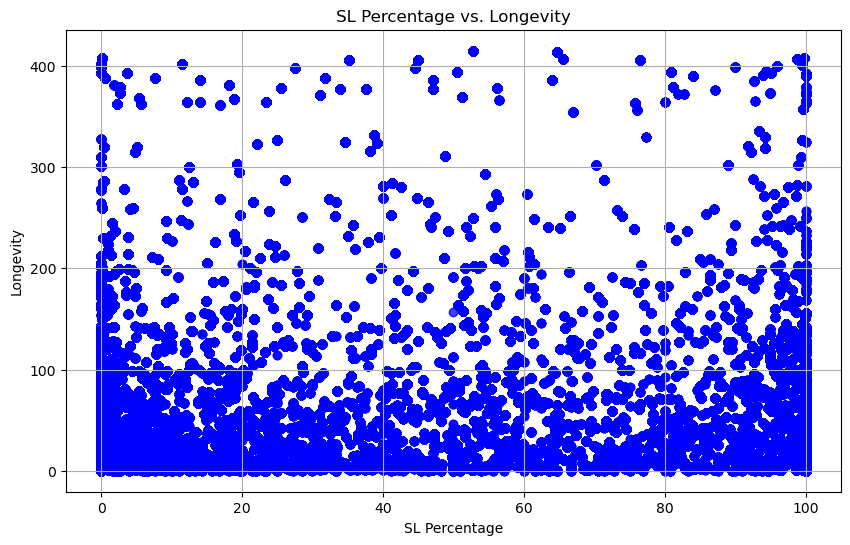

In [ ]:
# Extracting data
sl_percentage = merged_df['sl_percentage']
longevity = merged_df['longevity']

# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(sl_percentage, longevity, color='blue', alpha=0.5)
plt.title('SL Percentage vs Longevity')
plt.xlabel('SL Percentage')
plt.ylabel('Longevity')
plt.grid(True)
plt.show()

In [242]:
# Calculate correlation matrix
correlation_matrix = merged_df[['sl_percentage', 'longevity']].corr()
correlation_matrix

sl_percentage  longevity
sl_percentage       1.000000  -0.190163
longevity          -0.190163   1.000000

### 3.1.2 sl_gap

In [247]:
sl_gap_dataset_trades_USD_active = dataset_trades_USD_active[['login', 'cmd', 'open_price', 'sl','longevity']]
sl_gap_dataset_trades_USD_active

login  cmd  open_price       sl  longevity
0            524978    1     1979.96     0.00        142
1            524978    1    15804.30     0.00        142
2            524978    1     1975.24     0.00        142
3            524978    0     1961.81     0.00        142
4            524978    0     1960.84  1961.40        142
...             ...  ...         ...      ...        ...
1388823  1000054838    1     2032.05     0.00         85
1388824  1000054838    0     1969.12     0.00         85
1388825  1000054838    1     2026.11  2025.95         85
1388826  1000054838    1     2022.39     0.00         85
1388827  1000054838    0     2068.56     0.00         85

[1388828 rows x 5 columns]

In [248]:
sl_gap_dataset_trades_USD_active_filtered = sl_gap_dataset_trades_USD_active[sl_gap_dataset_trades_USD_active['sl'] != 0]
sl_gap_dataset_trades_USD_active_filtered

login  cmd  open_price       sl  longevity
4            524978    0     1960.84  1961.40        142
6            524978    1     1925.66  1926.85        142
7            524978    1     1923.90  1921.48        142
9            524978    0     1935.10  1932.63        142
10           524978    1     1929.20  1932.00        142
...             ...  ...         ...      ...        ...
1388803  1000054838    0     2037.16  2039.57         85
1388806  1000054838    1     2074.10  2072.80         85
1388809  1000054838    0     2079.64  2080.50         85
1388822  1000054838    1     2031.40  2031.20         85
1388825  1000054838    1     2026.11  2025.95         85

[591168 rows x 5 columns]

In [249]:
# Function to calculate sl_range based on cmd
def calculate_sl_range(row):
    if row['cmd'] == 0:
        return row['open_price'] / row['sl'] - 1
    elif row['cmd'] == 1:
        return row['sl'] / row['open_price'] - 1

# Apply the function to create the sl_range column
sl_gap_dataset_trades_USD_active_filtered['sl_range'] = sl_gap_dataset_trades_USD_active_filtered.apply(calculate_sl_range, axis=1)
sl_gap_dataset_trades_USD_active_filtered


/var/folders/s5/yjzt_0752f3_4zc69pnv4j700000gn/T/ipykernel_58122/2903678146.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sl_gap_dataset_trades_USD_active_filtered['sl_range'] = sl_gap_dataset_trades_USD_active_filtered.apply(calculate_sl_range, axis=1)


login  cmd  open_price       sl  longevity  sl_range
4            524978    0     1960.84  1961.40        142 -0.000286
6            524978    1     1925.66  1926.85        142  0.000618
7            524978    1     1923.90  1921.48        142 -0.001258
9            524978    0     1935.10  1932.63        142  0.001278
10           524978    1     1929.20  1932.00        142  0.001451
...             ...  ...         ...      ...        ...       ...
1388803  1000054838    0     2037.16  2039.57         85 -0.001182
1388806  1000054838    1     2074.10  2072.80         85 -0.000627
1388809  1000054838    0     2079.64  2080.50         85 -0.000413
1388822  1000054838    1     2031.40  2031.20         85 -0.000098
1388825  1000054838    1     2026.11  2025.95         85 -0.000079

[591168 rows x 6 columns]

In [250]:
# Group by 'login' and calculate the mean of 'sl_range' and get the first 'longevity' value
sl_range_mean = sl_gap_dataset_trades_USD_active_filtered.groupby('login').agg({'sl_range': 'mean', 'longevity': 'first'})

# Reset index to make 'login' a column again
sl_range_mean.reset_index(inplace=True)

# Display the DataFrame with mean sl_range and longevity for each login
sl_range_mean


login  sl_range  longevity
0         524978  0.010560        142
1         524979  0.012637        107
2         760487  0.001049         13
3         804687  0.000163        372
4         804688  0.000658        196
...          ...       ...        ...
4041    88944953  0.000757        381
4042    88944971  0.089705        100
4043    88945034  0.001237         46
4044    88945038  0.008759        253
4045  1000054838 -0.000216         85

[4046 rows x 3 columns]

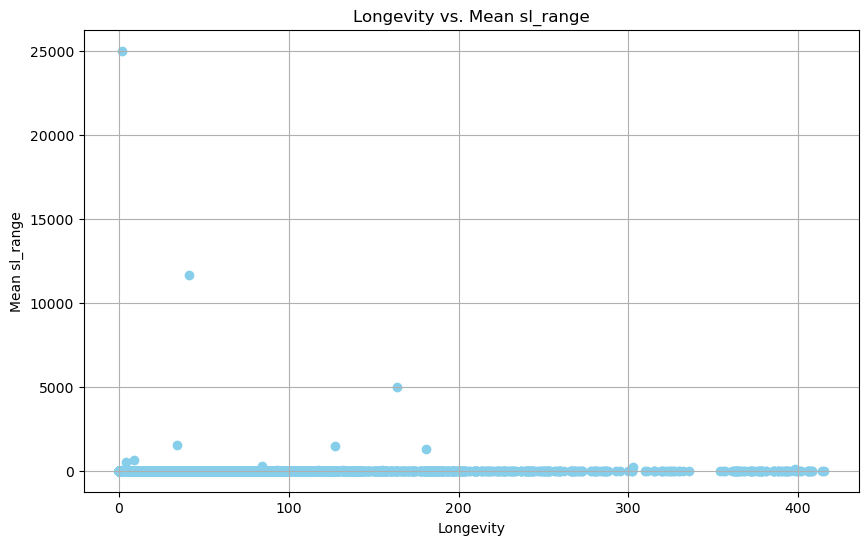

In [252]:
# Plot longevity and sl_range
plt.figure(figsize=(10, 6))
plt.scatter(sl_range_mean['longevity'], sl_range_mean['sl_range'], color='skyblue')
plt.xlabel('Longevity')
plt.ylabel('Mean sl_range')
plt.title('Longevity vs. Mean sl_range')
plt.grid(True)
plt.show()


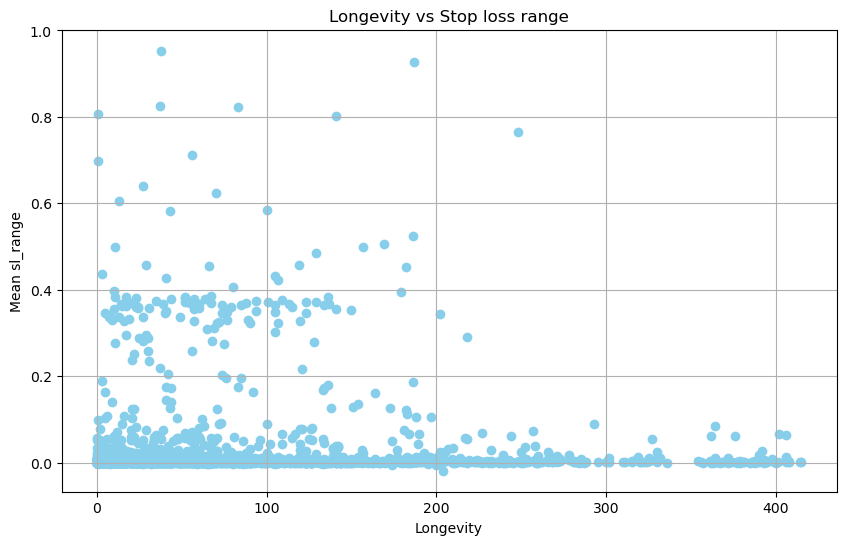

In [256]:
# Filter out rows where sl_range is greater than 1
filtered_data = sl_range_mean[sl_range_mean['sl_range'] <= 1]

# Plot longevity and sl_range for sl_range <= 1
plt.figure(figsize=(10, 6))
plt.scatter(filtered_data['longevity'], filtered_data['sl_range'], color='skyblue')
plt.xlabel('Longevity')
plt.ylabel('Mean sl_range')
plt.title('Longevity vs Stop loss range')
plt.grid(True)
plt.show()


### 3.1.3 Daily trading frequency

In [266]:
open_close_dataset_trades_USD_active = dataset_trades_USD_active[['login', 'open_price', 'tp','longevity']]
# open_close_dataset_trades_USD_active

In [267]:
# Create a new column "day_trade" based on the condition
open_close_dataset_trades_USD_active['day_trade'] = (open_close_dataset_trades_USD_active['tp'] != 0).astype(int)
# open_close_dataset_trades_USD_active

/var/folders/s5/yjzt_0752f3_4zc69pnv4j700000gn/T/ipykernel_58122/4128084960.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  open_close_dataset_trades_USD_active['day_trade'] = (open_close_dataset_trades_USD_active['tp'] != 0).astype(int)


In [268]:
login_counts = open_close_dataset_trades_USD_active.groupby('login').size().reset_index(name='count')
# login_counts

In [269]:
# Group by 'login' and count the number of rows, keeping the 'longevity' column
login_counts = open_close_dataset_trades_USD_active.groupby('login').agg(count=('longevity', 'count'), longevity=('longevity', 'first')).reset_index()
# login_counts

In [270]:
# Create a new column 'daily_trading_frequency'
login_counts['daily_trading_frequency'] = login_counts['count'] / login_counts['longevity']
login_counts


login  count  longevity  daily_trading_frequency
0         524978   1392        142                 9.802817
1         524979   2194        107                20.504673
2         760487     69         13                 5.307692
3         804664     85          9                 9.444444
4         804687    484        372                 1.301075
...          ...    ...        ...                      ...
5719    88944953     54        381                 0.141732
5720    88944971    442        100                 4.420000
5721    88945034    479         46                10.413043
5722    88945038   1306        253                 5.162055
5723  1000054838   4125         85                48.529412

[5724 rows x 4 columns]

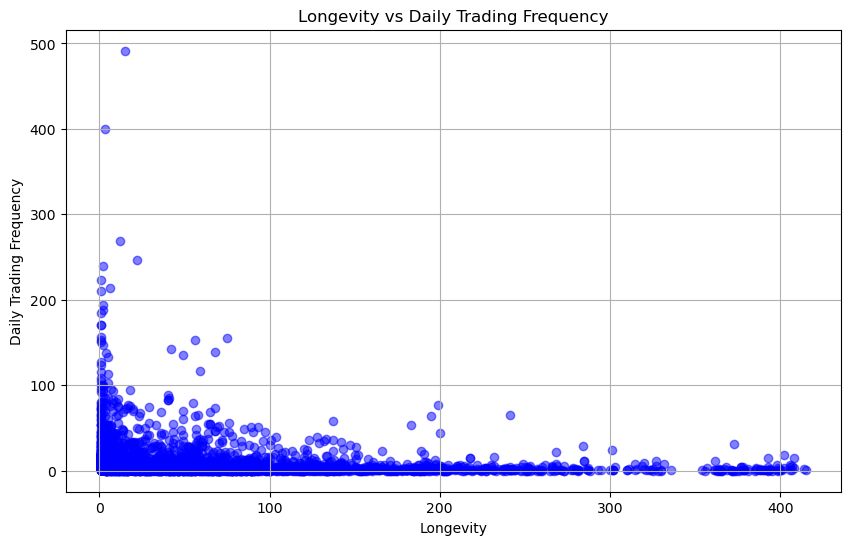

In [271]:
# Plot longevity against daily_trading_frequency
plt.figure(figsize=(10, 6))
plt.scatter(login_counts['longevity'], login_counts['daily_trading_frequency'], color='blue', alpha=0.5)
plt.xlabel('Longevity')
plt.ylabel('Daily Trading Frequency')
plt.title('Longevity vs Daily Trading Frequency')
plt.grid(True)
plt.show()


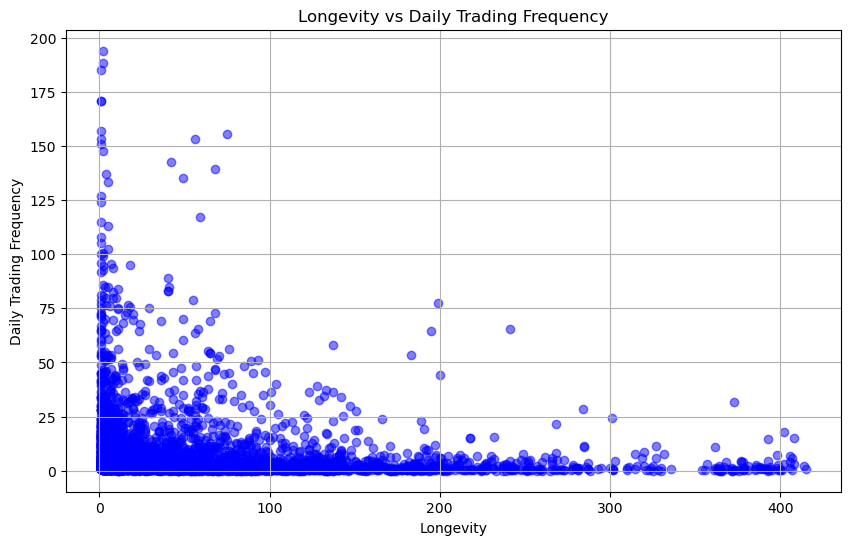

In [274]:
# Filter the DataFrame to include only rows where longevity is less than 200
filtered_data = login_counts[login_counts['daily_trading_frequency'] < 200]

# Plot longevity against daily_trading_frequency
plt.figure(figsize=(10, 6))
plt.scatter(filtered_data['longevity'], filtered_data['daily_trading_frequency'], color='blue', alpha=0.5)
plt.xlabel('Longevity')
plt.ylabel('Daily Trading Frequency')
plt.title('Longevity vs Daily Trading Frequency')
plt.grid(True)
plt.show()


### 3.1.4 Percentage of day_trading

In [275]:
open_close_dataset_trades_USD_active

login  open_price      tp  longevity  day_trade
0            524978     1979.96  1975.0        142          1
1            524978    15804.30     0.0        142          0
2            524978     1975.24  1970.0        142          1
3            524978     1961.81  1967.0        142          1
4            524978     1960.84  1968.0        142          1
...             ...         ...     ...        ...        ...
1388823  1000054838     2032.05     0.0         85          0
1388824  1000054838     1969.12     0.0         85          0
1388825  1000054838     2026.11     0.0         85          0
1388826  1000054838     2022.39     0.0         85          0
1388827  1000054838     2068.56     0.0         85          0

[1388828 rows x 5 columns]

In [277]:
login_day_trade_sum = open_close_dataset_trades_USD_active.groupby('login')['day_trade'].sum().reset_index()
login_day_trade_sum

login  day_trade
0         524978        554
1         524979        311
2         760487         65
3         804664          0
4         804687         60
...          ...        ...
5719    88944953          2
5720    88944971        187
5721    88945034        244
5722    88945038       1272
5723  1000054838        178

[5724 rows x 2 columns]

In [281]:
# Merge to get the count
daytrade_and_tradecount = pd.merge(login_counts, login_day_trade_sum, on='login', how='left')
daytrade_and_tradecount


login  count  longevity  daily_trading_frequency  day_trade
0         524978   1392        142                 9.802817        554
1         524979   2194        107                20.504673        311
2         760487     69         13                 5.307692         65
3         804664     85          9                 9.444444          0
4         804687    484        372                 1.301075         60
...          ...    ...        ...                      ...        ...
5719    88944953     54        381                 0.141732          2
5720    88944971    442        100                 4.420000        187
5721    88945034    479         46                10.413043        244
5722    88945038   1306        253                 5.162055       1272
5723  1000054838   4125         85                48.529412        178

[5724 rows x 5 columns]

In [283]:
daytrade_and_tradecount['percentage_of_daytrading'] = daytrade_and_tradecount['day_trade'] / daytrade_and_tradecount['count'] * 100
daytrade_and_tradecount

login  count  longevity  daily_trading_frequency  day_trade  \
0         524978   1392        142                 9.802817        554   
1         524979   2194        107                20.504673        311   
2         760487     69         13                 5.307692         65   
3         804664     85          9                 9.444444          0   
4         804687    484        372                 1.301075         60   
...          ...    ...        ...                      ...        ...   
5719    88944953     54        381                 0.141732          2   
5720    88944971    442        100                 4.420000        187   
5721    88945034    479         46                10.413043        244   
5722    88945038   1306        253                 5.162055       1272   
5723  1000054838   4125         85                48.529412        178   

      percentage_of_daytrading  
0                    39.798851  
1                    14.175023  
2                    94.202899  
3                     0.000000  
4                    12.396694  
...                        ...  
5719                  3.703704  
5720                 42.307692  
5721                 50.939457  
5722                 97.396631  
5723                  4.315152  

[5724 rows x 6 columns]

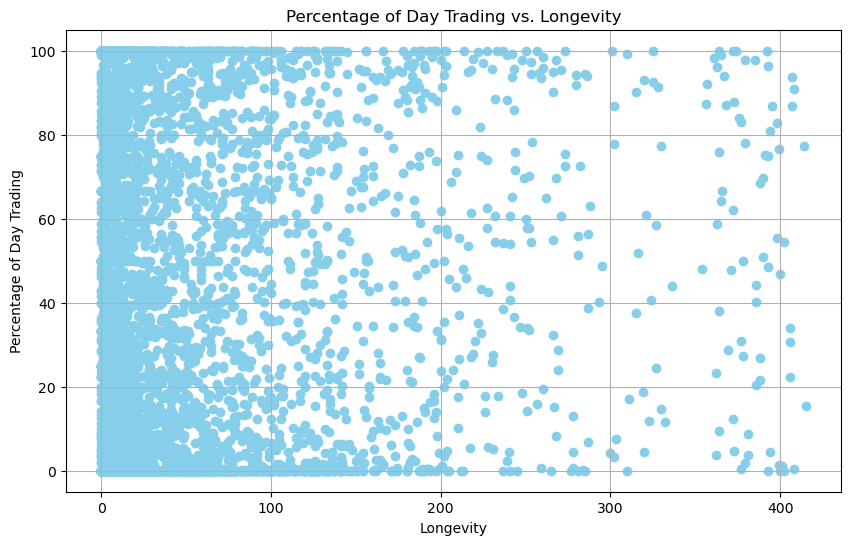

In [287]:
# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(daytrade_and_tradecount['longevity'], daytrade_and_tradecount['percentage_of_daytrading'], color='skyblue')
plt.xlabel('Longevity')
plt.ylabel('Percentage of Day Trading')
plt.title('Percentage of Day Trading vs Longevity')
plt.grid(True)
plt.show()

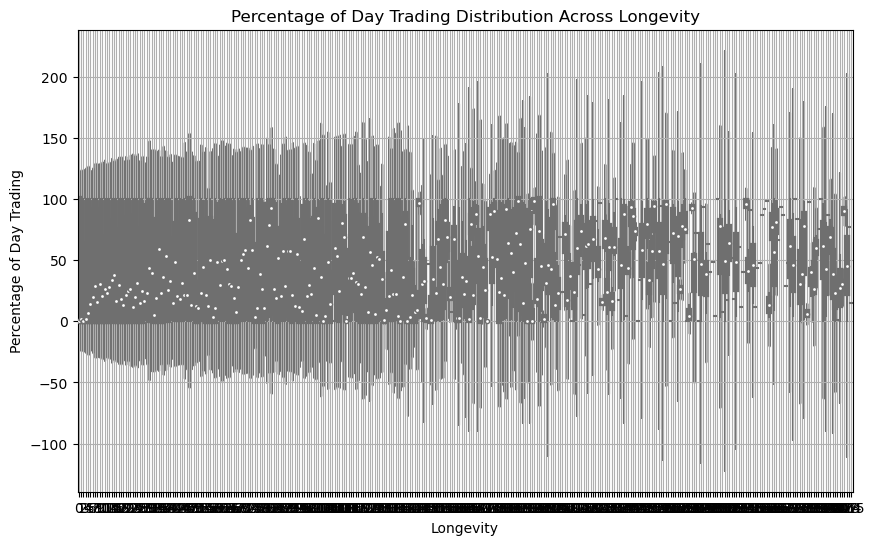

In [289]:
# Create a violin plot
plt.figure(figsize=(10, 6))
sns.violinplot(x=daytrade_and_tradecount['longevity'], y=daytrade_and_tradecount['percentage_of_daytrading'], color='skyblue')
plt.xlabel('Longevity')
plt.ylabel('Percentage of Day Trading')
plt.title('Percentage of Day Trading Distribution Across Longevity')
plt.grid(True)
plt.show()


### 3.1.

KeyError: "Column(s) ['net_deposit_2'] do not exist"

## 3.2 Dataset_report_USD_active

### 3.2.0 EDA on dataset_report_USD_active


In [50]:
dataset_report_USD_active = dataset_report_USD_active.reset_index()

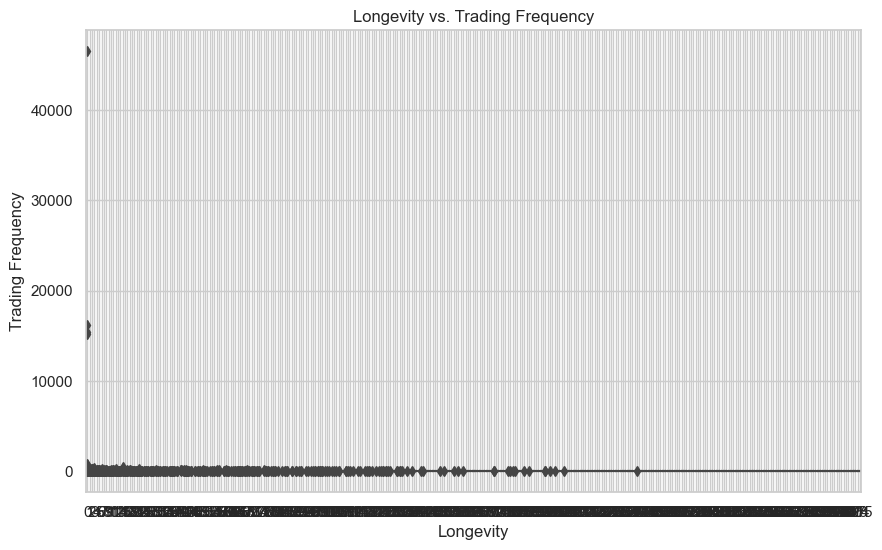

In [181]:
# Importing seaborn for visualization
import seaborn as sns

# Creating the box plot
plt.figure(figsize=(10, 6))
sns.boxplot(x='longevity', y='Trading_Frequency', data=trading_freq_dataset)
plt.title('Longevity vs. Trading Frequency')
plt.xlabel('Longevity')
plt.ylabel('Trading Frequency')
plt.grid(True)
plt.show()


### 3.2.1 Total deposit

In [51]:
# Grouping by 'login' and summing 'average_net_deposit'
net_deposit_sum = dataset_report_USD_active.groupby('login')['average_net_deposit'].sum()

# Adding a new column 'total_net_deposit' to the DataFrame
dataset_report_USD_active['total_net_deposit'] = dataset_report_USD_active['login'].map(net_deposit_sum)


In [52]:
dataset_report_USD_active

login       country account_currency  Trading_Frequency  \
0            524978       Austria              EUR           9.802817   
1            524978       Austria              EUR           9.802817   
2            524978       Austria              EUR           9.802817   
3            524978       Austria              EUR           9.802817   
4            524978       Austria              EUR           9.802817   
...             ...           ...              ...                ...   
1058120  1000054838  Saudi Arabia              USD          48.529412   
1058121  1000054838  Saudi Arabia              USD          48.529412   
1058122  1000054838  Saudi Arabia              USD          48.529412   
1058123  1000054838  Saudi Arabia              USD          48.529412   
1058124  1000054838  Saudi Arabia              USD          48.529412   

         Total_Trades  Buy_Percentage  Average_Volume  Average_Volume_USD  \
0                1392       47.485632        1.230632        4.044965e+08   
1                1392       47.485632        1.230632        4.044965e+08   
2                1392       47.485632        1.230632        4.044965e+08   
3                1392       47.485632        1.230632        4.044965e+08   
4                1392       47.485632        1.230632        4.044965e+08   
...               ...             ...             ...                 ...   
1058120          4125       56.533333        0.105981        4.312099e+04   
1058121          4125       56.533333        0.105981        4.312099e+04   
1058122          4125       56.533333        0.105981        4.312099e+04   
1058123          4125       56.533333        0.105981        4.312099e+04   
1058124          4125       56.533333        0.105981        4.312099e+04   

         Average_DPM  Unique_Symbols_Traded  Peak_Trading_Times  \
0          -3.415139               9.333333                  17   
1          -3.415139               9.333333                  17   
2          -3.415139               9.333333                  17   
3          -3.415139               9.333333                  17   
4          -3.415139               9.333333                  17   
...              ...                    ...                 ...   
1058120   -48.437138               1.666667                  15   
1058121   -48.437138               1.666667                  15   
1058122   -48.437138               1.666667                  15   
1058123   -48.437138               1.666667                  15   
1058124   -48.437138               1.666667                  15   

         Ratio_Profitable_Trades  Profit_Loss_Variability  \
0                       0.762931               316.119097   
1                       0.762931               316.119097   
2                       0.762931               316.119097   
3                       0.762931               316.119097   
4                       0.762931               316.119097   
...                          ...                      ...   
1058120                 0.684606                48.027839   
1058121                 0.684606                48.027839   
1058122                 0.684606                48.027839   
1058123                 0.684606                48.027839   
1058124                 0.684606                48.027839   

         Average_Trade_Duration  TP/SL Hit Ratio  Reward_Risk_Ratio  \
0                  36404.811782         3.375000           0.086763   
1                  36404.811782         3.375000           0.086763   
2                  36404.811782         3.375000           0.086763   
3                  36404.811782         3.375000           0.086763   
4                  36404.811782         3.375000           0.086763   
...                         ...              ...                ...   
1058120             3697.880242         0.043292          -1.329755   
1058121             3697.880242         0.043292          -1.329755   
1058122             3697.880242    

In [57]:
total_deposit_df = dataset_report_USD_active[['login', 'total_net_deposit','longevity']].drop_duplicates()
total_deposit_df

login  total_net_deposit  longevity
0            524978          -39078.53        142
263          524979            1828.00        107
526          760487            1038.39         13
943          804664              46.56          9
1221         804687            1150.00        372
...             ...                ...        ...
1056569    88944953              50.00        381
1056978    88944971             714.68        100
1057360    88945034               0.00         46
1057679    88945038               0.00        253
1057975  1000054838               0.00         85

[5723 rows x 3 columns]

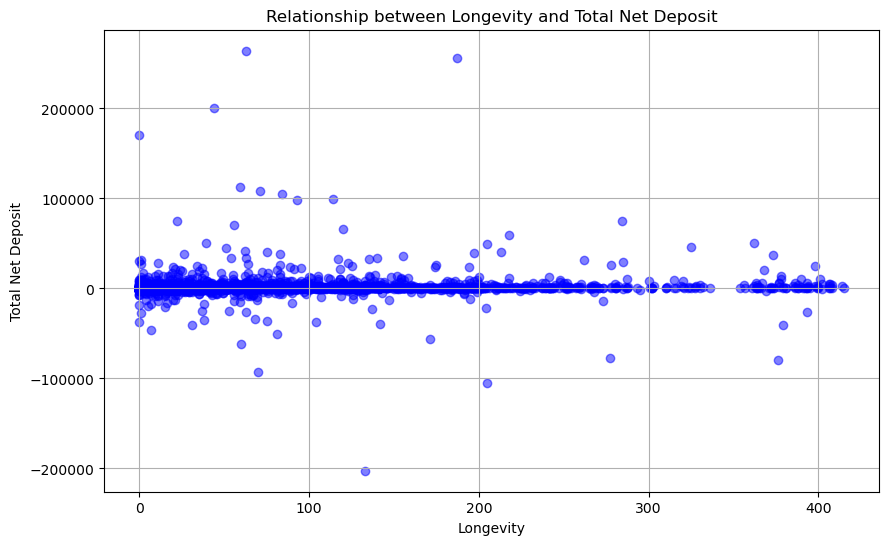

In [58]:
# Extracting data
longevity = total_deposit_df['longevity']
total_net_deposit = total_deposit_df['total_net_deposit']

# Creating the plot
plt.figure(figsize=(10, 6))
plt.scatter(longevity, total_net_deposit, color='blue', alpha=0.5)
plt.title('Relationship between Longevity and Total Net Deposit')
plt.xlabel('Longevity')
plt.ylabel('Total Net Deposit')
plt.grid(True)
plt.show()

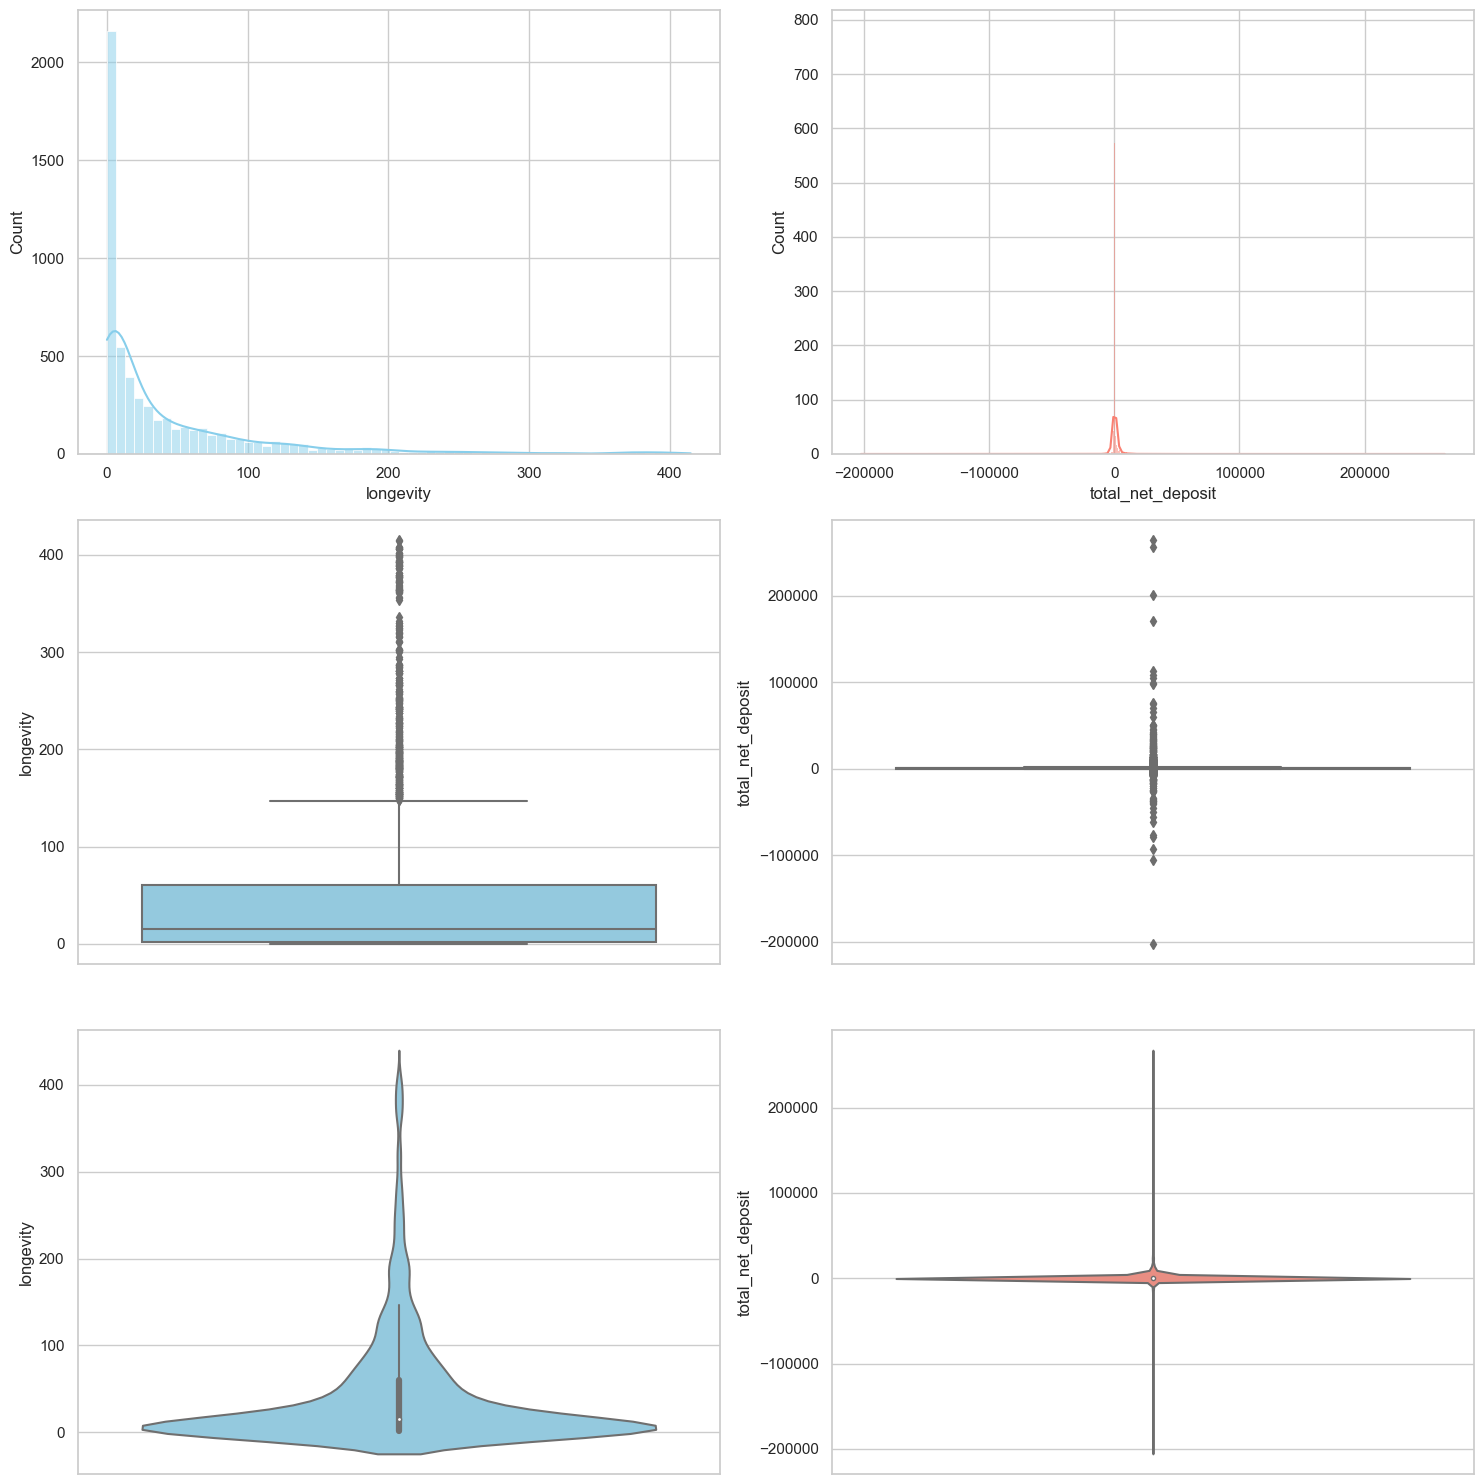

In [65]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the style for the plots
sns.set(style="whitegrid")

# Create a figure with subplots
fig, axes = plt.subplots(3, 2, figsize=(15, 15))

# Histograms or Density Plots
sns.histplot(data=total_deposit_df, x='longevity', ax=axes[0, 0], kde=True, color='skyblue')
sns.histplot(data=total_deposit_df, x='total_net_deposit', ax=axes[0, 1], kde=True, color='salmon')

# Box Plot
sns.boxplot(data=total_deposit_df, y='longevity', ax=axes[1, 0], color='skyblue')
sns.boxplot(data=total_deposit_df, y='total_net_deposit', ax=axes[1, 1], color='salmon')

# Violin Plot
sns.violinplot(data=total_deposit_df, y='longevity', ax=axes[2, 0], color='skyblue')
sns.violinplot(data=total_deposit_df, y='total_net_deposit', ax=axes[2, 1], color='salmon')

# Adjust layout
plt.tight_layout()
plt.show()


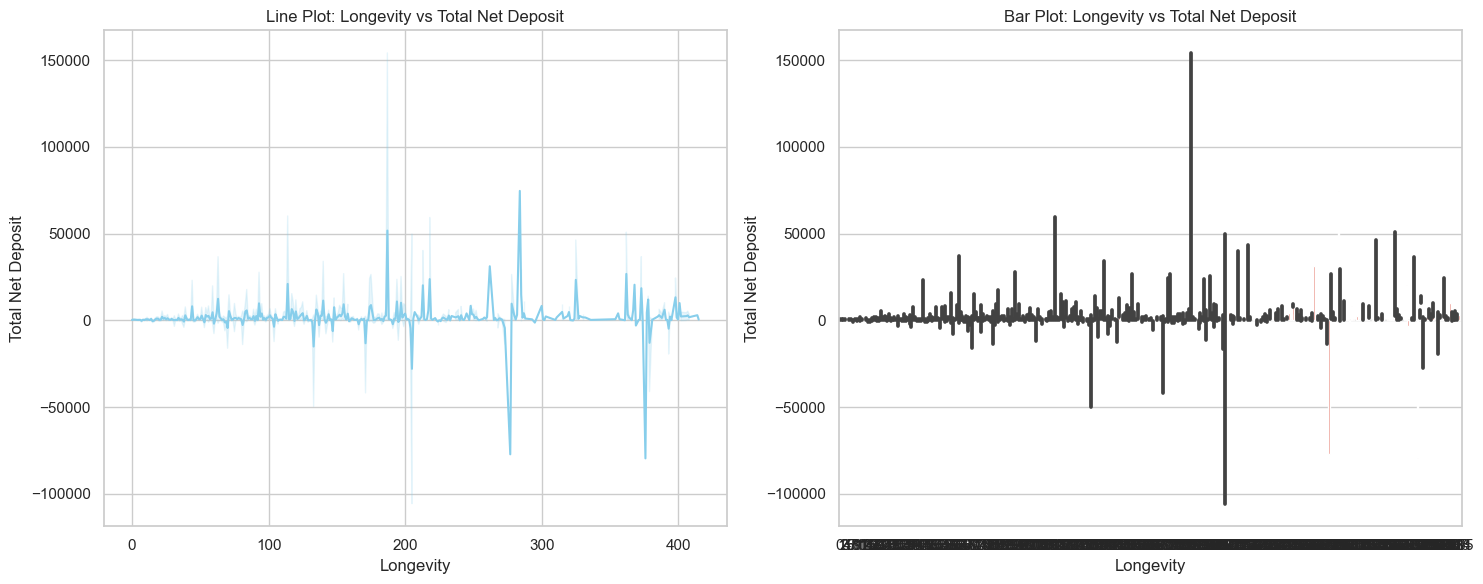

In [66]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the style for the plots
sns.set(style="whitegrid")

# Create a figure with subplots
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Line Plot
sns.lineplot(data=total_deposit_df, x='longevity', y='total_net_deposit', ax=axes[0], color='skyblue')
axes[0].set_title('Line Plot: Longevity vs Total Net Deposit')
axes[0].set_xlabel('Longevity')
axes[0].set_ylabel('Total Net Deposit')

# Bar Plot
sns.barplot(data=total_deposit_df, x='longevity', y='total_net_deposit', ax=axes[1], color='salmon')
axes[1].set_title('Bar Plot: Longevity vs Total Net Deposit')
axes[1].set_xlabel('Longevity')
axes[1].set_ylabel('Total Net Deposit')

# Adjust layout
plt.tight_layout()
plt.show()


### 3.2.

### 3.2.

### 3.2.

# 4 One year survivor

## 4.1 General EDA on 365

In [113]:
# Filter records where longevity is greater than 365 days
long_survivors = dataset[dataset['longevity'] > 365]

# Print the records of people who survived more than 365 days
print("People who survived more than 365 days:")
long_survivors.head()

People who survived more than 365 days:


country account_currency  Trading_Frequency  Buy_Percentage  \
login                                                                        
804687       Australia              AUD           1.301075        0.512397   
804867  United Kingdom              GBP           1.362069        0.443038   
804893          France              USD          14.936275        0.482934   
804936          France              EUR           4.208995        0.438089   
804954        Portugal              EUR           1.205128        0.317021   

        Average_Volume  Average_Volume_USD  Average_DPM  \
login                                                     
804687        0.019773        5.271755e+05   -45.416080   
804867        0.072170        1.954211e+04  -357.222874   
804893        0.077248        1.669919e+04    15.343162   
804936        0.703325        1.413410e+08   -35.485078   
804954        0.185617        2.670649e+08   -54.703874   

        Unique_Symbols_Traded  Peak_Trading_Times  Ratio_Profitable_Trades  \
login                                                                        
804687                     17                   3                 0.311983   
804867                      8                   7                 0.634720   
804893                      1                  17                 0.710535   
804936                     28                  17                 0.467630   
804954                     20                  13                 0.421277   

        Profit_Loss_Variability  Average_Trade_Duration  TP/SL Hit Ratio  \
login                                                                      
804687                 3.559165            22939.518595         0.002283   
804867                85.603497           363006.473779         1.347826   
804893                32.197704             7019.101575       546.428571   
804936               100.809722             2639.808297         0.133721   
804954               240.405883            17607.746809         0.141509   

        Reward_Risk_Ratio  Average_Commission  Average_Swaps  Average_Profit  \
login                                                                          
804687          55.989328           -0.101129      -0.009749       -0.210692   
804867           0.190853            0.000000      -0.242798       -6.876003   
804893           3.643614           -0.540737      -0.007246        0.080876   
804936           2.207832           -1.339072      -0.058651       -7.071991   
804954           0.907284           -0.999965      -0.223473      -21.289392   

        average_net_deposit  average_credit Trading_Method  active  longevity  \
login                                                                           
804687             2.947076             0.0         Mobile   False        372   
804867             8.199495             0.0         Expert    True        406   
804893            12.357820             0.0         Expert    True        408   
804936            34.783438             0.0         Client    True        378   
804954            28.984180             0.0         Client    True        390   

        longevity_bin  
login                  
804687              5  
804867              5  
804893              5  
804936              5  
804954              5

In [93]:
# Analyze commonalities among the long survivors
common_countries = long_survivors['country'].value_counts()
common_trading_methods = long_survivors['Trading_Method'].value_counts()
average_profit_stats = long_survivors['Average_Profit'].describe()
average_volume_stats = long_survivors['Average_Volume'].describe()

In [94]:
# Print commonalities
print("\nCommon Countries:")
print(common_countries)
print("\nCommon Trading Methods:")
print(common_trading_methods)
print("\nAverage Profit Statistics:")
print(average_profit_stats)
print("\nAverage Volume Statistics:")
print(average_volume_stats)


Common Countries:
France            9
Canada            7
New Zealand       6
United Kingdom    4
Australia         3
Philippines       3
Nigeria           3
Singapore         3
Switzerland       2
Portugal          2
Poland            2
South Africa      2
Sweden            2
Spain             1
Slovenia          1
Saudi Arabia      1
Ireland           1
Morocco           1
Cyprus            1
Kenya             1
Barbados          1
Hong Kong         1
Romania           1
Name: country, dtype: int64

Common Trading Methods:
Mobile    23
Expert    19
Client    15
Other      1
Name: Trading_Method, dtype: int64

Average Profit Statistics:
count      58.000000
mean       45.552955
std       354.445138
min       -56.712063
25%        -3.158269
50%        -0.572320
75%         0.239240
max      2694.472000
Name: Average_Profit, dtype: float64

Average Volume Statistics:
count    58.000000
mean      0.467157
std       1.139637
min       0.010685
25%       0.025623
50%       0.083813
75%   

In [95]:
print("\nCommon Trading Methods:")
print(common_trading_methods)


Common Trading Methods:
Mobile    23
Expert    19
Client    15
Other      1
Name: Trading_Method, dtype: int64


In [96]:
print("\nAverage Profit Statistics:")
print(average_profit_stats)


Average Profit Statistics:
count      58.000000
mean       45.552955
std       354.445138
min       -56.712063
25%        -3.158269
50%        -0.572320
75%         0.239240
max      2694.472000
Name: Average_Profit, dtype: float64


In [97]:
print("\nAverage Volume Statistics:")
print(average_volume_stats)


Average Volume Statistics:
count    58.000000
mean      0.467157
std       1.139637
min       0.010685
25%       0.025623
50%       0.083813
75%       0.329677
max       7.479000
Name: Average_Volume, dtype: float64


dataset


## 4.2 Correlation Matrix of 1-year survivor on output.csv

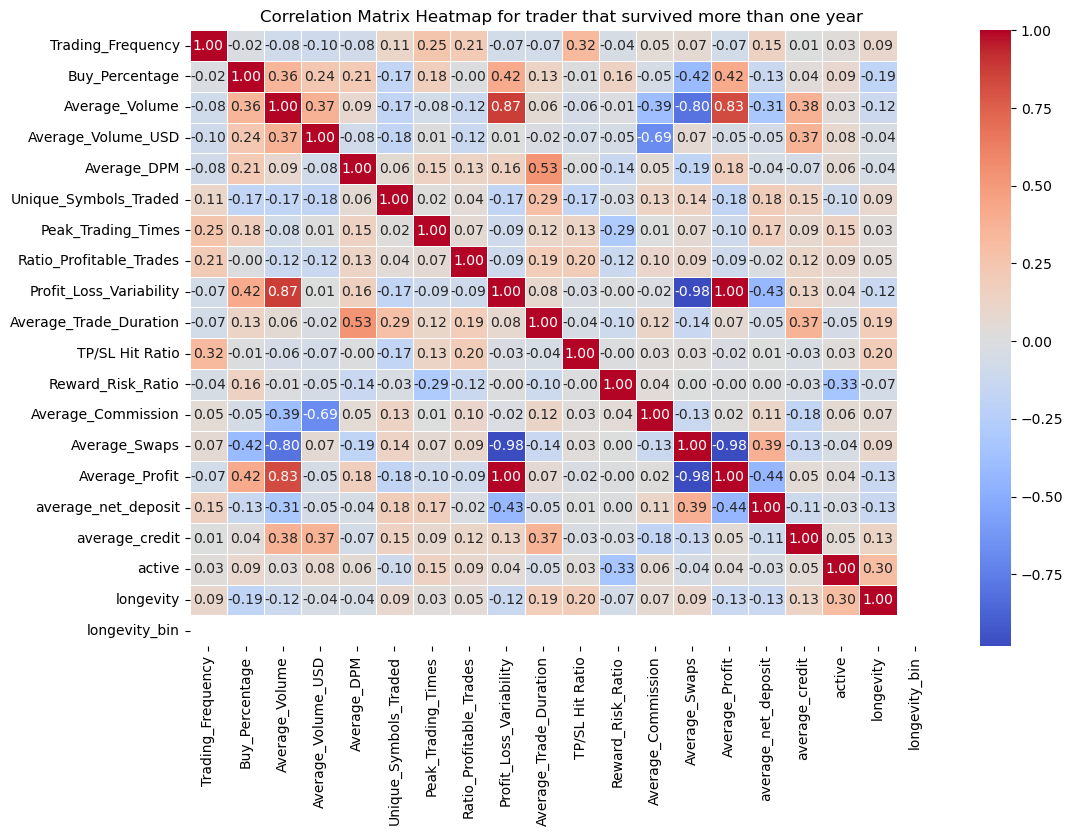

In [107]:
# Create a correlation matrix
long_survivors_correlation_matrix = long_survivors.corr()
# Plotting the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title("Correlation Matrix Heatmap for trader that survived more than one year")
plt.show()


## 4.3 login_report_1survivor
login_trades + 1 year survivor


### 4.3.0 Merge report_USD with the 1 year survivor

In [120]:
long_survivors_id = long_survivors.index.to_frame().drop(columns = ['login'])
# long_survivors_id.head()

In [149]:
login_report_1survivor = pd.merge(long_survivors_id, login_trades, how='inner', on='login').reset_index()
login_report_1survivor

login    country account_currency        Reg_Datetime    ticket  \
0        804687  Australia              AUD 2023-01-10 10:26:00  59570268   
1        804687  Australia              AUD 2023-01-10 10:26:00  61381179   
2        804687  Australia              AUD 2023-01-10 10:26:00  68241663   
3        804687  Australia              AUD 2023-01-10 10:26:00  68003875   
4        804687  Australia              AUD 2023-01-10 10:26:00  64613596   
...         ...        ...              ...                 ...       ...   
66057  88944953     Canada              CAD 2023-01-12 02:52:40  56842674   
66058  88944953     Canada              CAD 2023-01-12 02:52:40  56845459   
66059  88944953     Canada              CAD 2023-01-12 02:52:40  56868833   
66060  88944953     Canada              CAD 2023-01-12 02:52:40  56839798   
66061  88944953     Canada              CAD 2023-01-12 02:52:40  57164657   

       symbol  cmd  volume  open_price  close_price   tp       sl  commission  \
0      AUDUSD    1    0.03     0.66466      0.66521  0.0   0.6652   -0.213072   
1      AUDUSD    0    0.01     0.67684      0.67597  0.0   0.6760   -0.067910   
2      XAGUSD    0    0.01    22.92900     22.84700  0.0  22.8500    0.000000   
3      XAGUSD    0    0.01    22.54500     22.58500  0.0  22.5850    0.000000   
4      AUDUSD    1    0.01     0.63140      0.63250  0.0   0.6325   -0.069239   
...       ...  ...     ...         ...          ...  ...      ...         ...   
66057  EURUSD    0    0.03     1.08376      1.08380  0.0   0.0000    0.000000   
66058  AUDUSD    0    0.09     0.69259      0.69264  0.0   0.0000    0.000000   
66059  EURUSD    1    0.04     1.08646      1.08631  0.0   0.0000    0.000000   
66060  AUDUSD    1    0.03     0.69193      0.69189  0.0   0.0000    0.000000   
66061  XAUUSD    1    0.01  1954.13000   1953.83000  0.0   0.0000    0.000000   

       swaps    profit       Open_Datetime      Close_Datetime  \
0        0.0 -1.651308 2023-05-17 04:44:59 2023-05-17 04:51:11   
1        0.0 -0.876039 2023-07-25 13:07:47 2023-07-25 14:27:13   
2        0.0 -4.096038 2024-01-26 04:34:19 2024-01-26 09:16:15   
3        0.0  1.984019 2024-01-22 02:41:15 2024-01-22 03:54:06   
4        0.0 -1.095243 2023-10-13 09:40:17 2023-10-13 10:27:05   
...      ...       ...                 ...                 ...   
66057    0.0  0.119644 2023-01-20 01:18:19 2023-01-20 02:14:17   
66058    0.0  0.456143 2023-01-20 05:36:38 2023-01-20 05:43:08   
66059    0.0  0.598502 2023-01-23 00:18:38 2023-01-23 01:04:24   
66060    0.0  0.126343 2023-01-19 22:17:55 2023-01-19 22:30:32   
66061    0.0  0.300422 2023-02-02 11:19:31 2023-02-02 11:19:50   

       Trade_Duration  Reason   type  
0     0 days 00:06:12  Mobile  Forex  
1     0 days 01:19:26  Mobile  Forex  
2     0 days 04:41:56  Mobile  Metal  
3     0 days 01:12:51  Mobile  Metal  
4     0 days 00:46:48  Mobile  Forex  
...               ...     ...    ...  
66057 0 days 00:55:58  Mobile  Forex  
66058 0 days 00:06:30  Mobile  Forex  
66059 0 days 00:45:46  Mobile  Forex  
66060 0 days 00:12:37  Mobile  Forex  
66061 0 days 00:00:19  Mobile  Metal  

[66062 rows x 20 columns]

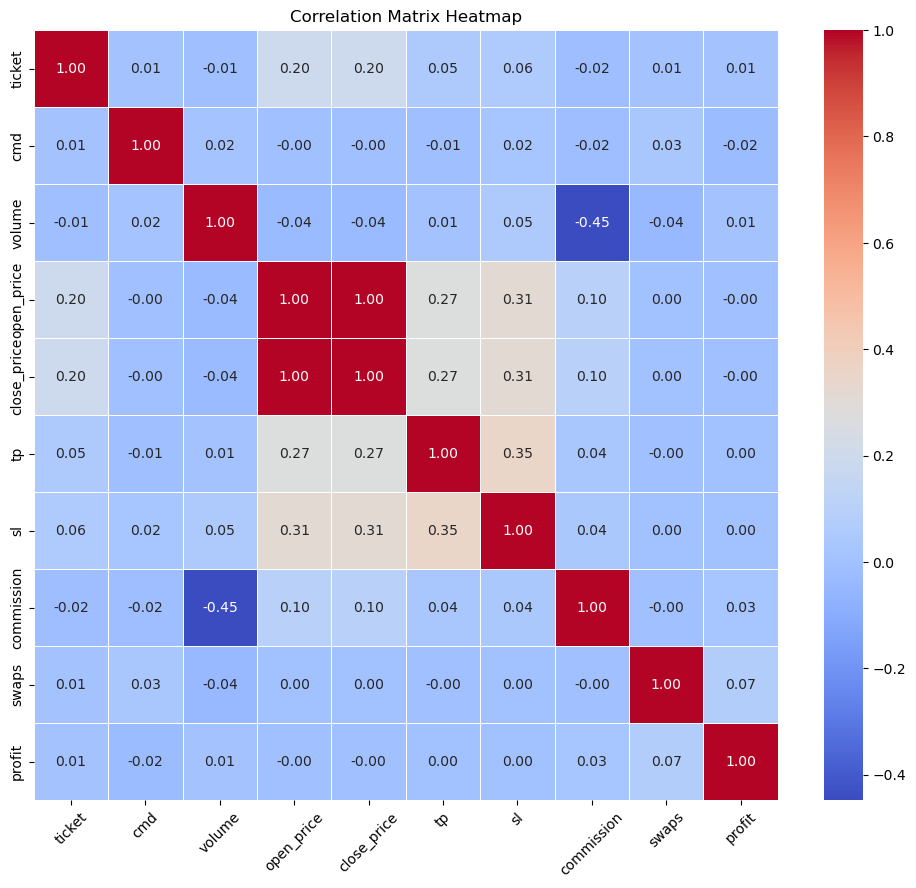

In [122]:
# Create the correlation matrix
login_report_1survivor_correlation_matrix = login_report_1survivor.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=True, fmt=".2f", linewidths=.5)
plt.xticks(rotation=45)
plt.title('Correlation Matrix Heatmap')
plt.show()

### 4.3.1 Stop Loss gap

In [124]:
# Calculate stop_loss_gap based on the conditions
login_report_1survivor['stop_loss_gap'] = np.where(login_report_1survivor['cmd'] == 0,
                                                   (login_report_1survivor['open_price'] - login_report_1survivor['sl']) / login_report_1survivor['open_price'],
                                                   (login_report_1survivor['sl'] - login_report_1survivor['open_price']) / login_report_1survivor['open_price'])

# Display the DataFrame with the new stop_loss_gap variable
login_report_1survivor[['cmd', 'open_price', 'sl', 'stop_loss_gap']]


cmd  open_price       sl  stop_loss_gap
login                                            
804687      1     0.66466   0.6652       0.000812
804687      0     0.67684   0.6760       0.001241
804687      0    22.92900  22.8500       0.003445
804687      0    22.54500  22.5850      -0.001774
804687      1     0.63140   0.6325       0.001742
...       ...         ...      ...            ...
88944953    0     1.08376   0.0000       1.000000
88944953    0     0.69259   0.0000       1.000000
88944953    1     1.08646   0.0000      -1.000000
88944953    1     0.69193   0.0000      -1.000000
88944953    1  1954.13000   0.0000      -1.000000

[66062 rows x 4 columns]

Average Stop Loss Gap of 1-year survivor

In [144]:
# Calculate average stop_loss_gap based on login
average_stop_loss_gap = login_report_1survivor.groupby('login')['stop_loss_gap'].mean().reset_index().sort_values('stop_loss_gap')
average_stop_loss_gap.head()

login  stop_loss_gap
57  88944953      -0.240727
38    806391      -0.187541
24    805613      -0.142652
32    806047      -0.142562
1     804867      -0.138973

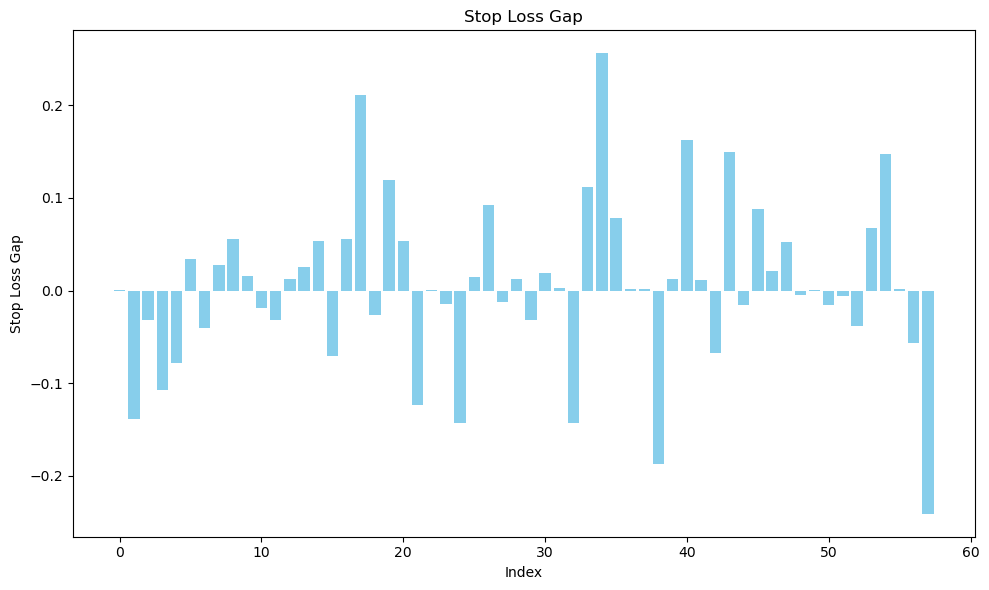

In [147]:
import matplotlib.pyplot as plt

# Plot stop_loss_gap
plt.figure(figsize=(10, 6))
plt.bar(average_stop_loss_gap.index, average_stop_loss_gap['stop_loss_gap'], color='skyblue')
plt.xlabel('Index')
plt.ylabel('Stop Loss Gap')
plt.title('Stop Loss Gap')
plt.tight_layout()
plt.show()



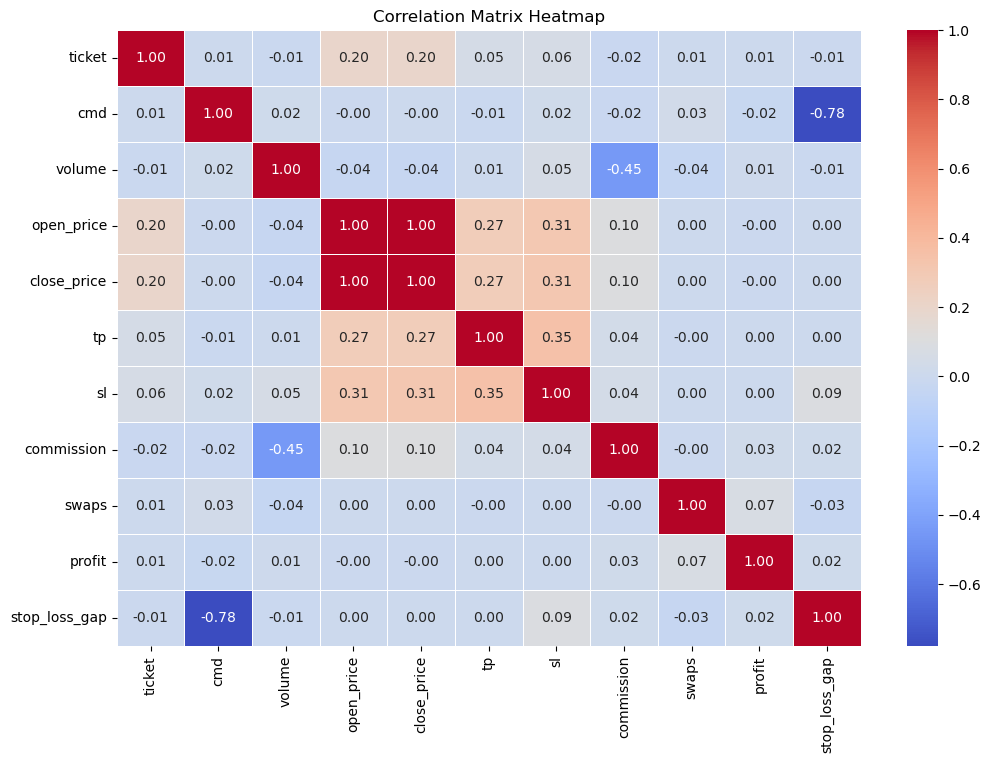

In [127]:
login_report_1survivor_correlation_matrix = login_report_1survivor.corr()

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(login_report_1survivor_correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()


### 4.3.2 Stop loss percentage compare to trade


In [151]:
login_report_1survivor.head()

login    country account_currency        Reg_Datetime    ticket  symbol  \
0  804687  Australia              AUD 2023-01-10 10:26:00  59570268  AUDUSD   
1  804687  Australia              AUD 2023-01-10 10:26:00  61381179  AUDUSD   
2  804687  Australia              AUD 2023-01-10 10:26:00  68241663  XAGUSD   
3  804687  Australia              AUD 2023-01-10 10:26:00  68003875  XAGUSD   
4  804687  Australia              AUD 2023-01-10 10:26:00  64613596  AUDUSD   

   cmd  volume  open_price  close_price   tp       sl  commission  swaps  \
0    1    0.03     0.66466      0.66521  0.0   0.6652   -0.213072    0.0   
1    0    0.01     0.67684      0.67597  0.0   0.6760   -0.067910    0.0   
2    0    0.01    22.92900     22.84700  0.0  22.8500    0.000000    0.0   
3    0    0.01    22.54500     22.58500  0.0  22.5850    0.000000    0.0   
4    1    0.01     0.63140      0.63250  0.0   0.6325   -0.069239    0.0   

     profit       Open_Datetime      Close_Datetime  Trade_Duration  Reason  \
0 -1.651308 2023-05-17 04:44:59 2023-05-17 04:51:11 0 days 00:06:12  Mobile   
1 -0.876039 2023-07-25 13:07:47 2023-07-25 14:27:13 0 days 01:19:26  Mobile   
2 -4.096038 2024-01-26 04:34:19 2024-01-26 09:16:15 0 days 04:41:56  Mobile   
3  1.984019 2024-01-22 02:41:15 2024-01-22 03:54:06 0 days 01:12:51  Mobile   
4 -1.095243 2023-10-13 09:40:17 2023-10-13 10:27:05 0 days 00:46:48  Mobile   

    type  
0  Forex  
1  Forex  
2  Metal  
3  Metal  
4  Forex

In [193]:
import matplotlib.pyplot as plt

# Calculate the percentage of time where sl != 0 for each login
sl_percentage = (login_report_1survivor.groupby('login')['sl'].apply(lambda x: (x != 0).sum()) / login_report_1survivor.groupby('login')['sl'].count()) * 100
sl_percentage = sl_percentage.to_frame()

sl_percentage_df = sl_percentage.rename(columns={'sl': 'sl_percentage'})
sl_percentage_df = sl_percentage_df.sort_values(by = 'sl_percentage', ascending= False)
# sl_percentage_df
sl_percentage_df.mean()



sl_percentage    53.16857
dtype: float64

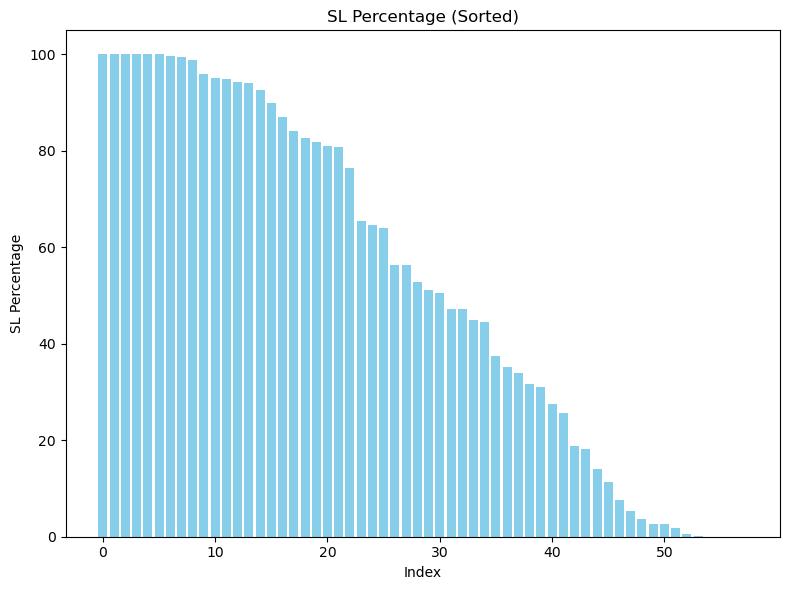

In [190]:
# Plot the sorted data
plt.figure(figsize=(8, 6))
plt.bar(range(len(sl_percentage_df)), sl_percentage_df['sl_percentage'], color='skyblue')
plt.xlabel('Index')
plt.ylabel('SL Percentage')
plt.title('SL Percentage (Sorted)')
plt.xticks(range(0, len(sl_percentage_df), 10), range(0, len(sl_percentage_df), 10))
plt.tight_layout()
plt.show()

# Random Stuff

In [108]:
dataset

country account_currency  Trading_Frequency  Buy_Percentage  \
login                                                                          
524978           Austria              EUR           9.802817        0.474856   
524979            France              USD          20.504673        0.496354   
760487         Singapore              SGD           5.307692        0.159420   
804664          Malaysia              USD           9.444444        0.635294   
804687         Australia              AUD           1.301075        0.512397   
...                  ...              ...                ...             ...   
88944953          Canada              CAD           0.141732        0.370370   
88944971        Malaysia              USD           4.420000        0.461538   
88945034       Singapore              USD          10.413043        0.400835   
88945038       Singapore              SGD           5.162055        0.588055   
1000054838  Saudi Arabia              USD          48.529412        0.565333   

            Average_Volume  Average_Volume_USD  Average_DPM  \
login                                                         
524978            1.230632        4.044965e+08    -3.415139   
524979            0.013943        6.724644e+03  -264.410462   
760487            0.012609        2.783882e+03 -3403.656636   
804664            0.018706        5.490400e+03    17.604088   
804687            0.019773        5.271755e+05   -45.416080   
...                    ...                 ...          ...   
88944953          0.041667        1.621176e+07   -24.464597   
88944971          1.389367        1.249156e+09  -298.590702   
88945034          0.043278        1.522641e+07   -70.501778   
88945038          0.078913        1.824879e+04   140.220508   
1000054838        0.105981        4.312099e+04   -48.437138   

            Unique_Symbols_Traded  Peak_Trading_Times  \
login                                                   
524978                         30                  17   
524979                          4                  17   
760487                          1                  17   
804664                          6                   3   
804687                         17                   3   
...                           ...                 ...   
88944953                        8                   8   
88944971                       14                  23   
88945034                       25                  15   
88945038                        8                  17   
1000054838                      2                  15   

            Ratio_Profitable_Trades  Profit_Loss_Variability  \
login                                                          
524978                     0.762931               316.119097   
524979                     0.718323                11.676818   
760487                     0.463768                12.396847   
804664                     0.517647                 6.861240   
804687                     0.311983                 3.559165   
...                             ...                      ...   
88944953                   0.796296                 8.643649   
88944971                   0.658371               428.451471   
88945034                   0.626305                15.980216   
88945038                   0.882083                63.497096   
1000054838                 0.684606                48.027839   

            Average_Trade_Duration  TP/SL Hit Ratio  Reward_Risk_Ratio  \
login                                                                    
524978                36404.811782         3.375000           0.086763   
524979                57056.876937         0.087081          -0.549598   
760487                46984.231884         0.000000           0.000000   
804664                 8397.694118         0.000000           0.000000   
804687                22939.518595         0.002283          55.989328   
...                            ...              ...            